In [2]:
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import matplotlib.font_manager
from scipy import stats


%matplotlib inline
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'PT Sans'})

#matplotlib.rcParams['svg.fonttype'] = 'svgfont'
matplotlib.rcParams['pdf.fonttype'] = '42'

#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')


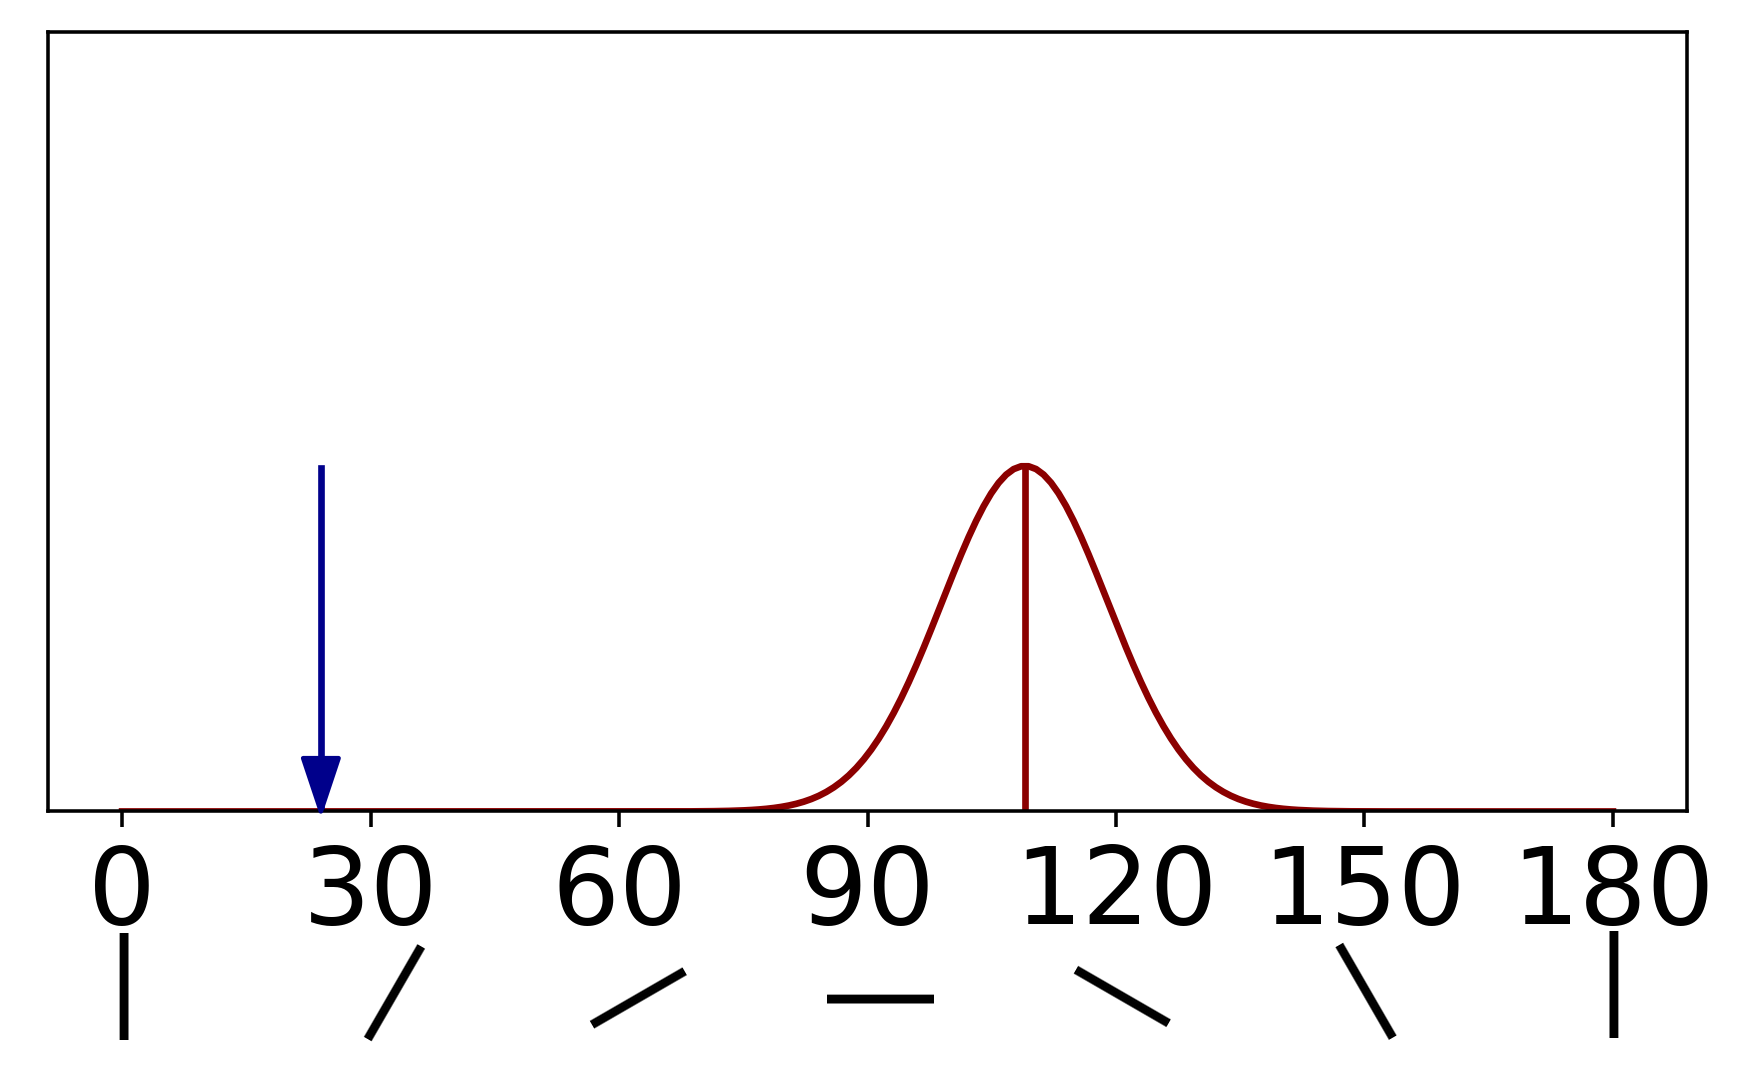

In [23]:
matplotlib.rcParams.update({'font.size': 24, 'font.family': 'PT_Sans-Web-Regular'})

mean = 109
sigma = 10
x = np.linspace(0,180,200)
fig = plt.figure(figsize=(6, 4), dpi=320)
ax = fig.add_subplot(111)

ax.plot(x,stats.norm.pdf(x,mean,sigma),color='darkred')
#ax.plot(x,stats.norm.pdf(x,mean,sigma),color='darkblue')
ax.axvline(x=24, color='darkblue', ymax=.44)
ax.axvline(x=mean, color='darkred', ymax=.44)


frame = plt.gca()

frame.axes.get_yaxis().set_ticklabels([])
#ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.annotate('', xy=(24, 0), xytext=(24, 0.006),va='bottom', rotation=90,ha='center', color='darkblue',
            arrowprops=dict(color='darkblue',width=1,headwidth=8 ))
plt.xticks(np.arange(min(x), max(x)+1, 30.0))
ax.set_ylim([0.0,0.09])

for i in range(0,200,30):
    x=i
    if i==0:
        x=i-3
    plt.annotate(s='|', xy=(x,-0.02),rotation=180-i,ha='center',va='center', annotation_clip=False,size='medium')
plt.tight_layout()

plt.savefig('primetrial.png', transparent=True)

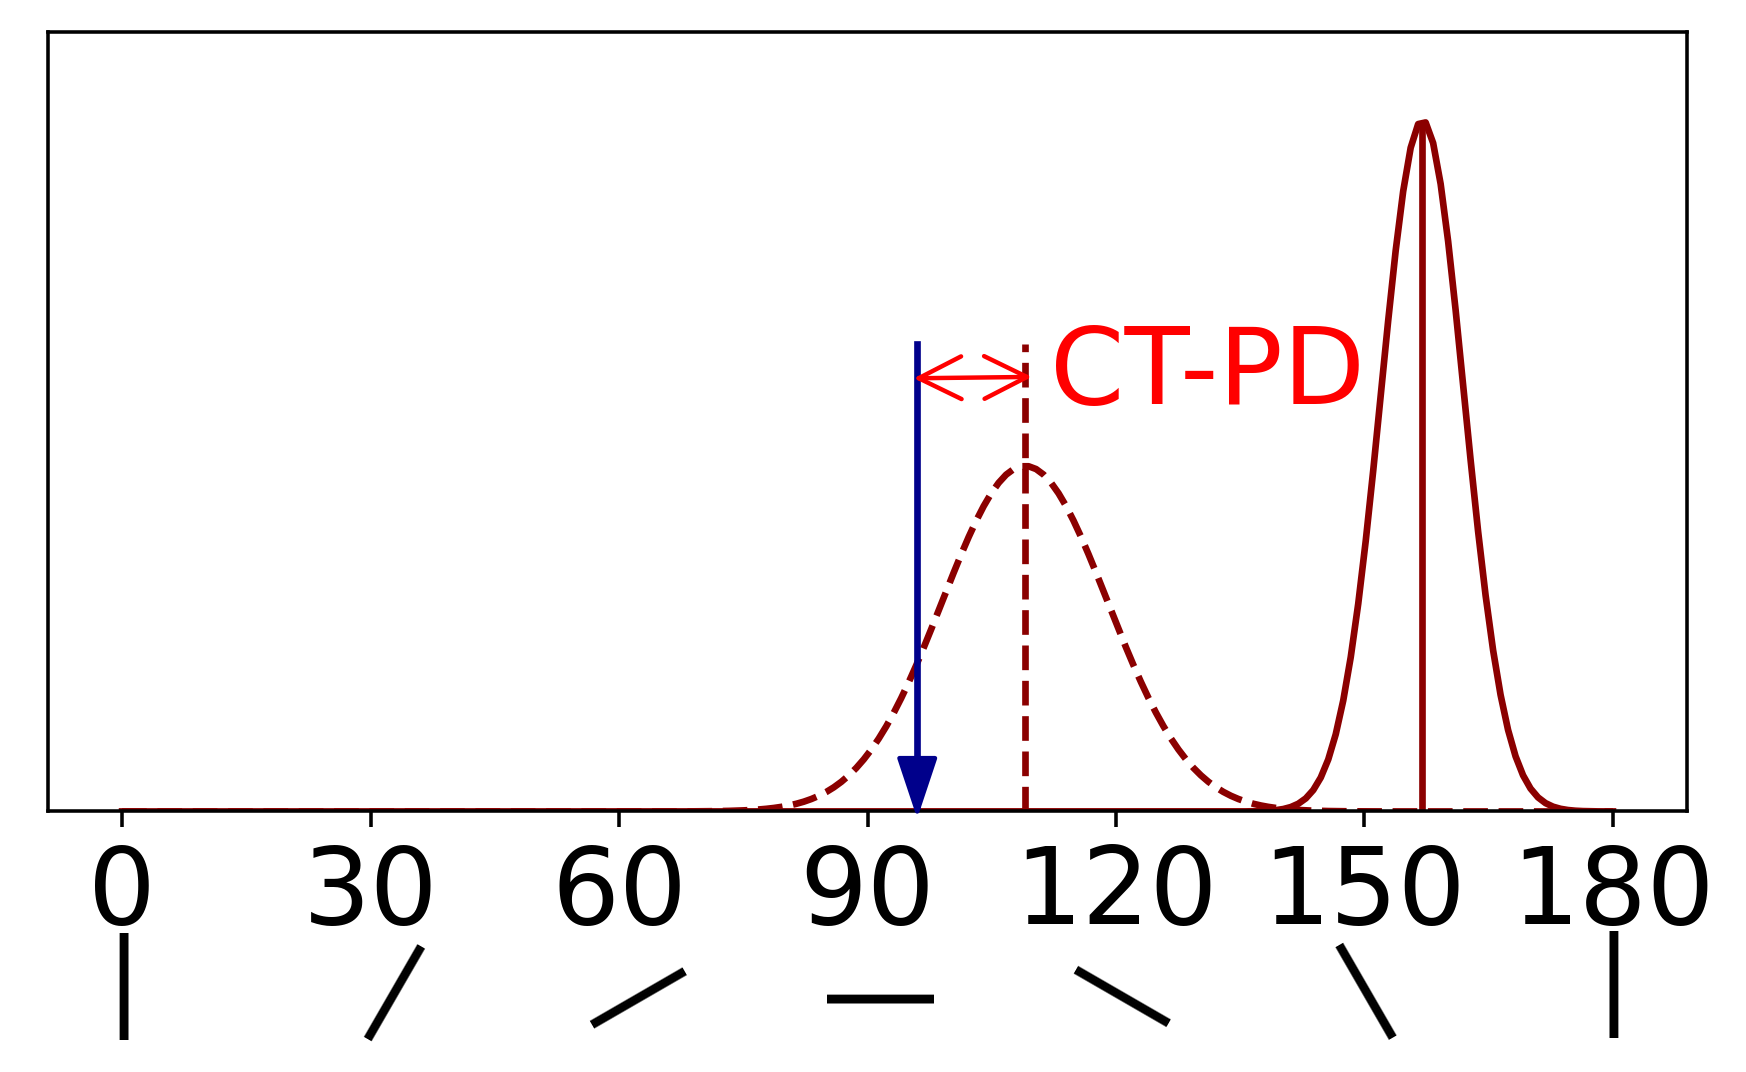

In [26]:
prevdsmean = 109
prevdssigma = 10
dsmean = 157
dssigma = 5

x = np.linspace(0,180,200)
fig = plt.figure(figsize=(6, 4), dpi=320)
ax = fig.add_subplot(111)

ax.plot(x,stats.norm.pdf(x,dsmean,dssigma),color='darkred')
ax.plot(x,stats.norm.pdf(x,prevdsmean,prevdssigma),color='darkred', linestyle='--')
ax.axvline(x=96, color='darkblue', ymax=.6)
ax.axvline(x=dsmean, color='darkred', ymax=.88)
ax.axvline(x=prevdsmean, color='darkred', ymax=.6, linestyle='--')


frame = plt.gca()

frame.axes.get_yaxis().set_ticklabels([])
ax.axes.yaxis.set_visible(False)


plt.annotate('', xy=(96, 0), xytext=(96, 0.006),va='bottom', rotation=90,ha='center', color='darkblue',
            arrowprops=dict(color='darkblue', width=1,headwidth=8 ))

plt.annotate(s='CT-PD', xy=(94.5,.05), xytext=(112,.047),color='red', arrowprops=dict(arrowstyle='<->', color='red'))


plt.xticks(np.arange(min(x), max(x)+1, 30.0))
ax.set_ylim([0.0,0.09])

for i in range(0,200,30):
    x=i
    if i==0:
        x=i-3
    plt.annotate(s='|', xy=(x,-0.02),rotation=180-i,ha='center',va='center', annotation_clip=False,size='medium')
plt.tight_layout()

plt.savefig('testtrial.png', transparent=True)

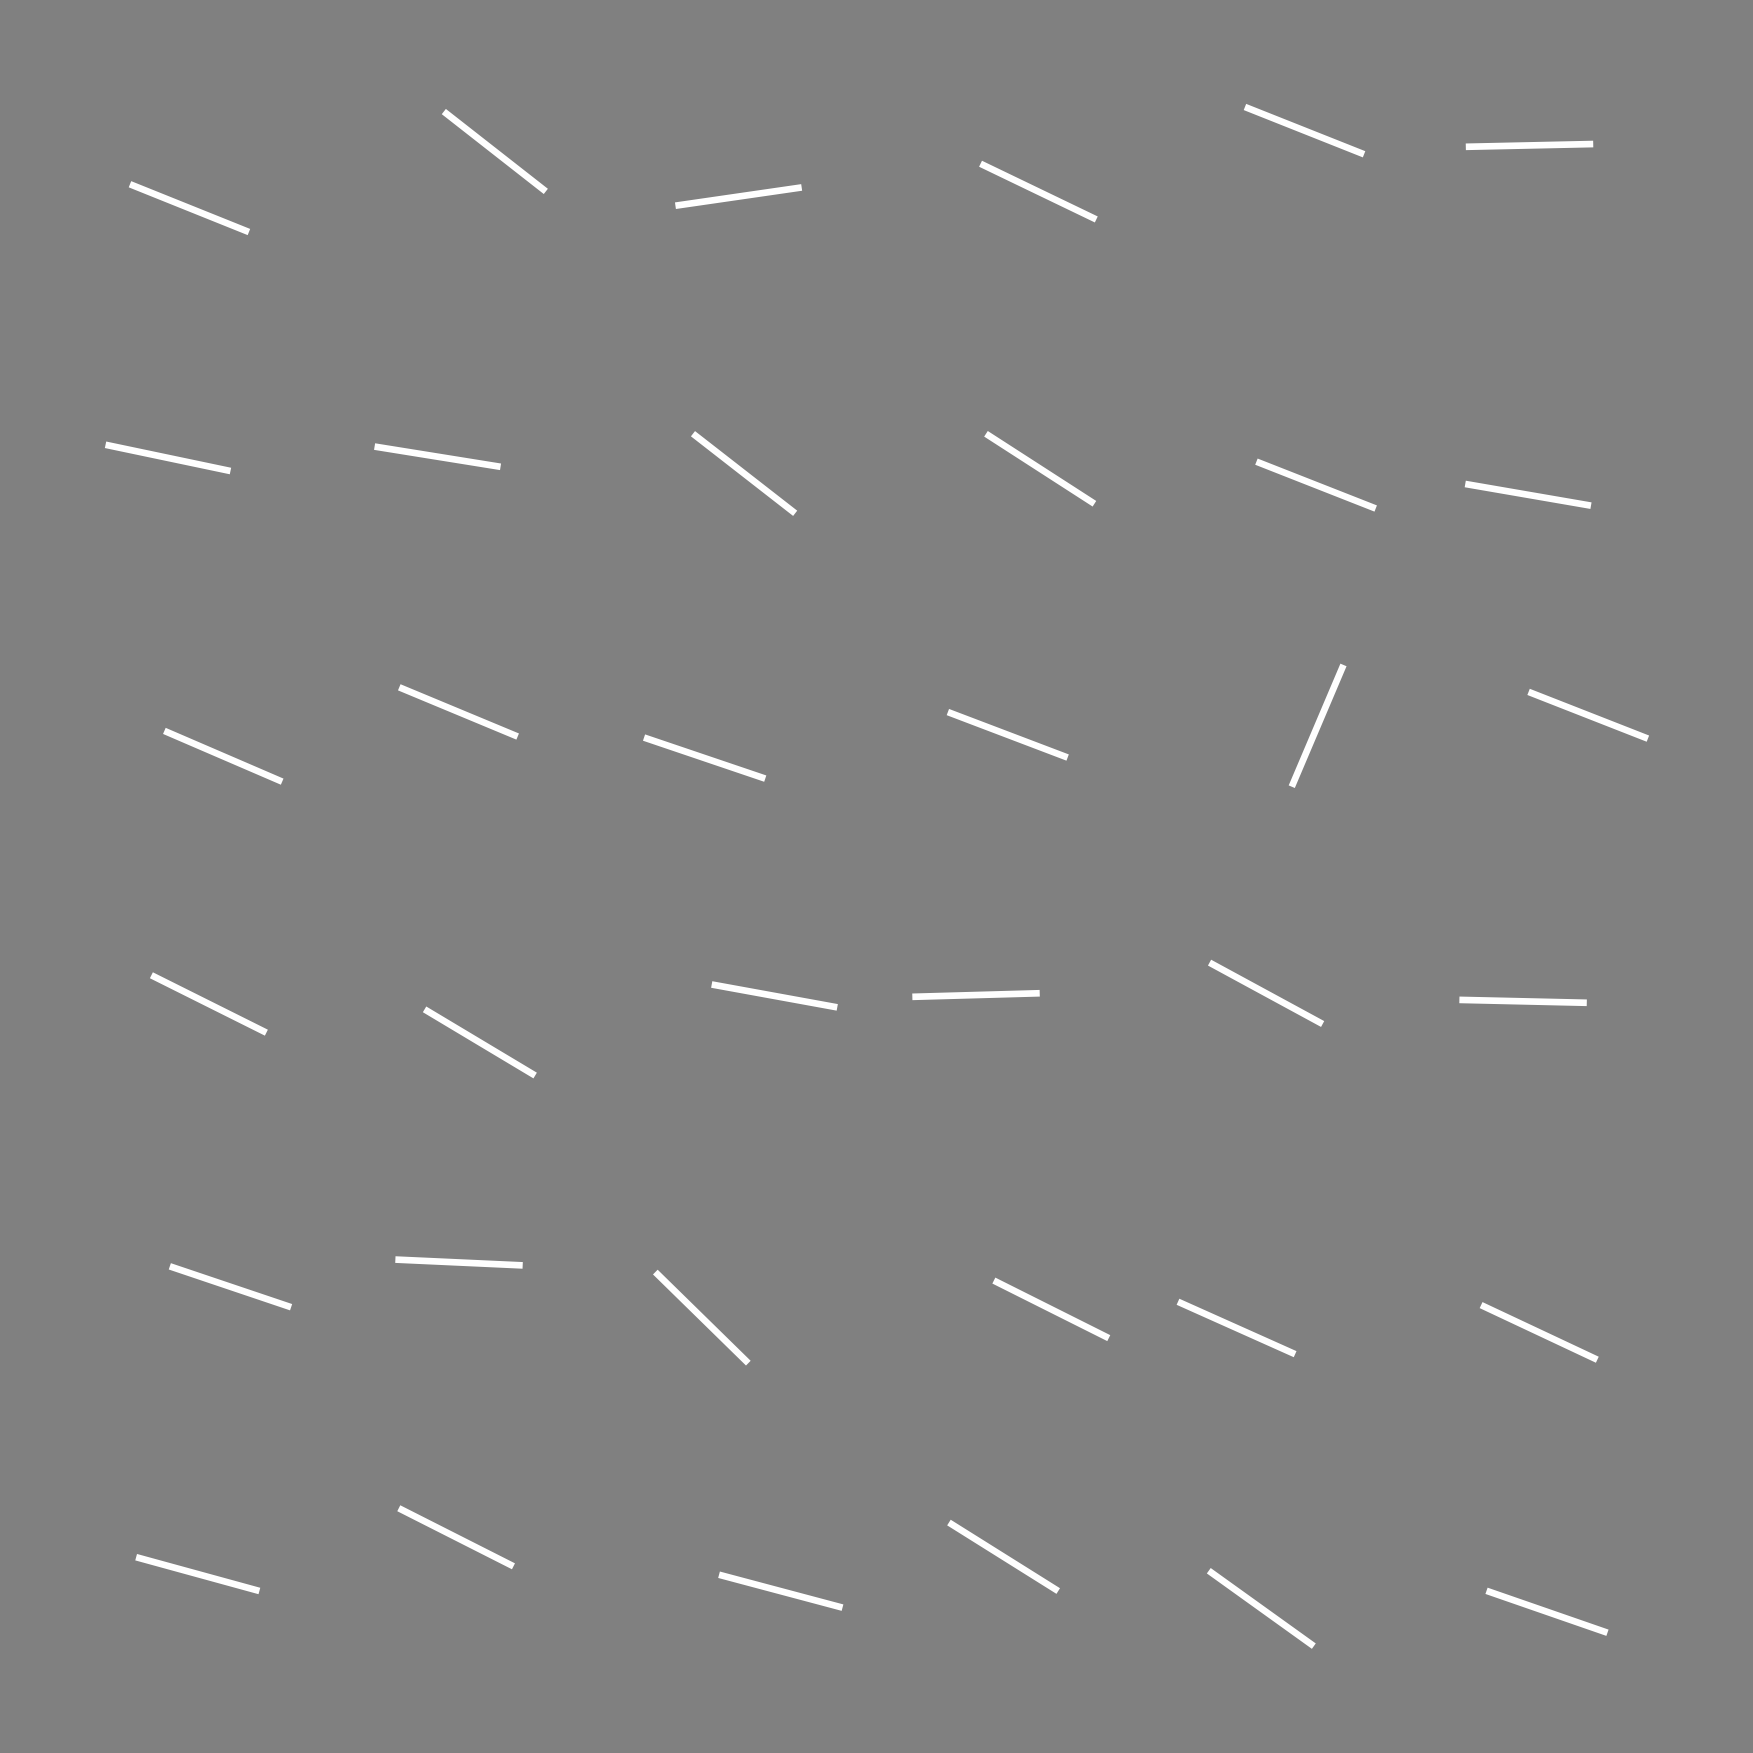

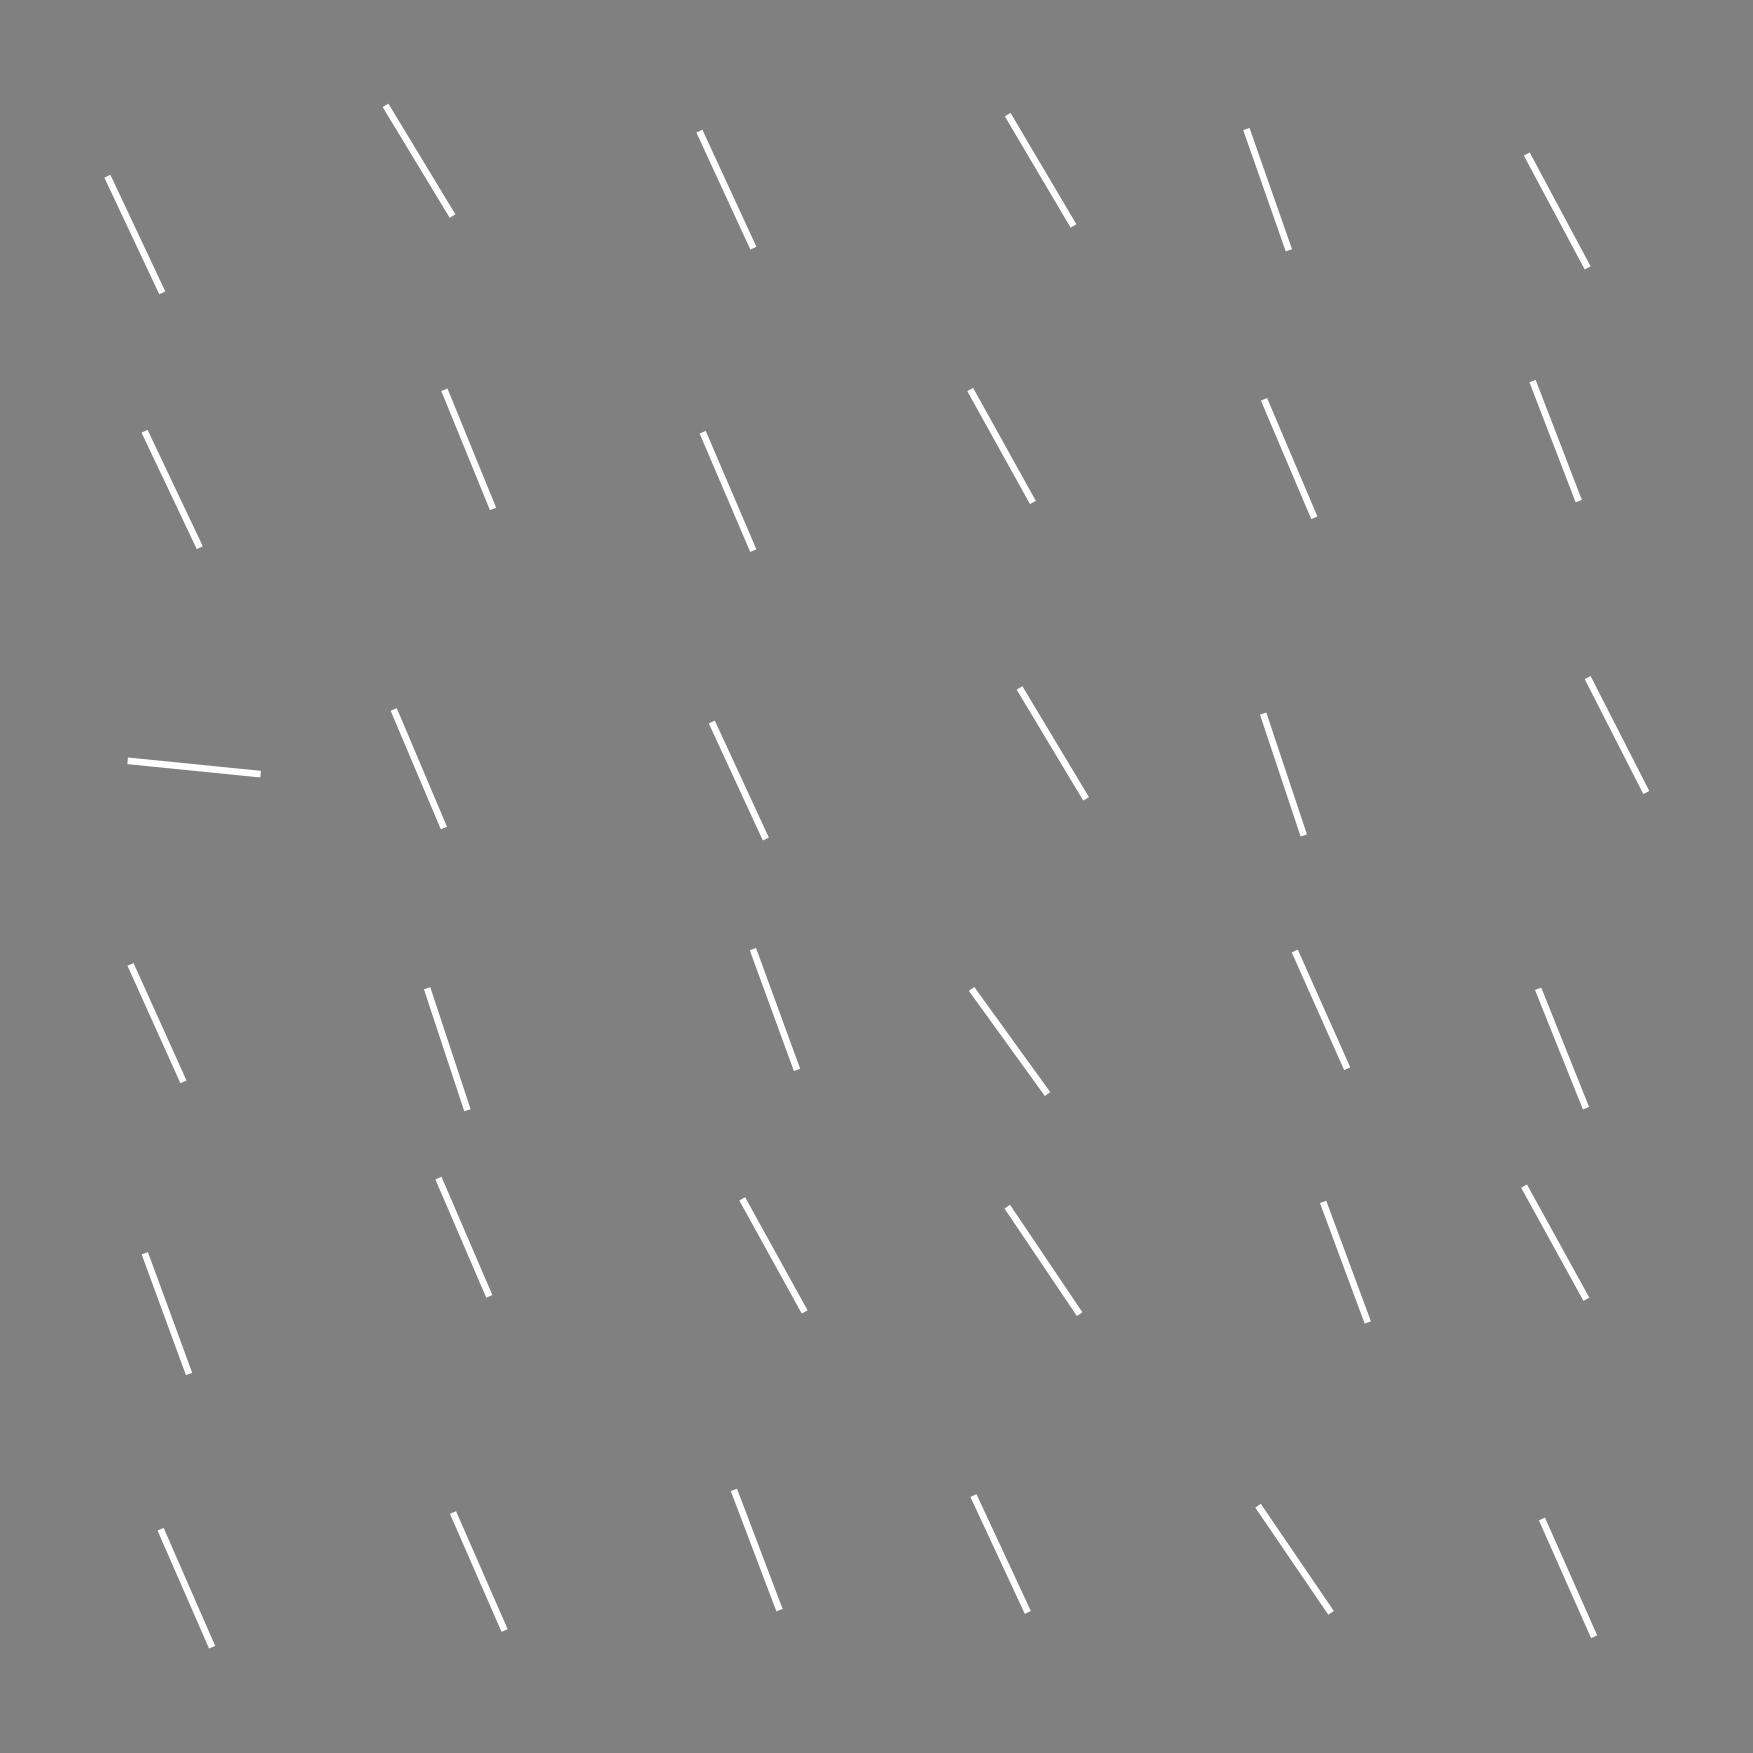

In [67]:

from __future__ import division
import numpy as np #for maths on arrays
from numpy import random #we only need these two commands from this lib
matplotlib.rcParams.update({'font.size': 24, 'font.family': 'PT Sans'})

def drawOris(nNew, dmean, dtype, dsd, targetPos, targetOri, dmult = 2):
    if dsd == 0:
        newOris = np.asarray([dmean]*nNew)
    else:
        if dtype=='truncnorm':
            newOris = random.normal(dmean, dsd, nNew)#np.asarray([-formAngle]*nNew) #create a random array 0:180
            outliers = [x for x in newOris if x < dmean-dmult*dsd or x > dmean+dmult*dsd]
            while (len(outliers)>0):
                for key, x in enumerate(newOris):
                    if x < dmean-dmult*dsd or x > dmean+dmult*dsd:
                        newOris[key] = random.normal(dmean, dsd)
                outliers = [x for x in newOris if x < dmean-dmult*dsd or x > dmean+dmult*dsd]
        elif dtype=='norm':
            newOris = random.normal(dmean, dsd, nNew)#np.asarray([-formAngle]*nNew) #create a random array 0:180
        elif dtype=='uni':
            newOris = random.uniform(dmean-dmult*dsd, dmean+dmult*dsd, nNew)#np.asarray([-formAngle]*nNew) #create a random array 0:180
        elif dtype=='bimod':
#            print (dmean-dmult*dsd)
#            print (dmean-dmult)
            newOris =np.concatenate( [random.uniform(dmean-dmult*dsd, dmean-dsd, nNew/2),random.uniform(dmean+dsd, dmean+dmult*dsd, nNew/2)])
        elif dtype=='bimod2':
            newOris =np.concatenate( [random.uniform(dmean-dmult*dsd-0.5*dsd, dmean-dsd-0.5*dsd, nNew/2),random.uniform(dmean+0.5*dsd+dsd, dmean+0.5*dsd+dmult*dsd, nNew/2)])
        elif dtype=='tri_right':
            newOris = random.triangular(dmean-30.0, dmean-25, dmean+30.0, nNew)
        elif dtype=='tri_left':
            newOris = random.triangular(dmean-30.0, dmean+25, dmean+30.0, nNew)
        random.shuffle(newOris)
        #newOris = random.uniform(dmean-dmult*dsd, dmean+dmult*dsd, nNew)#np.asarray([-formAngle]*nNew) #create a random array 0:180
        #print dmean
        #print ','.join(map(str,newOris))
        #newOris[0:2]=[dmean-dmult*dsd, dmean+dmult*dsd]
        random.shuffle(newOris)

    if targetPos!=-1:
        newOris[targetPos] = targetOri
    #select some elements to be coherent

    return newOris

from itertools import product
from numpy import linspace
import math
N=36
fieldSize = 16 
lineSize = 1.44

seq=linspace(0, fieldSize, int(math.sqrt(N)))
coordinates = np.asarray(list(product(seq, seq)))-fieldSize/2.0

def plot_ex_distr(dMean, dtype, dsd, targetPos, targetOri, fname, ax=None, highlightT = None, savePlot = False):
    if ax is None:
        fig = plt.figure(figsize=(6, 6), dpi=320, facecolor='0.5', linewidth=2)
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.set_facecolor('0.5')
        savePlot = True
        
    oris = drawOris(36, dMean , dtype, dsd, targetPos, targetOri) 
    oris = (90 - oris)/180*math.pi


    for i in range(len(oris)):
        x_jitt = -0.5+random.random_sample()
        y_jitt = -0.5+random.random_sample()
        if highlightT is not None and i==targetPos:
            ax.plot([coordinates[i][0]+x_jitt-lineSize/2*math.cos(oris[i]), coordinates[i][0]+x_jitt+lineSize/2*math.cos(oris[i])], [coordinates[i][1]+y_jitt-lineSize/2*math.sin(oris[i]), coordinates[i][1]+y_jitt+lineSize/2*math.sin(oris[i])], 'k-', color=highlightT)    
        else:
            ax.plot([coordinates[i][0]+x_jitt-lineSize/2*math.cos(oris[i]), coordinates[i][0]+x_jitt+lineSize/2*math.cos(oris[i])], [coordinates[i][1]+y_jitt-lineSize/2*math.sin(oris[i]), coordinates[i][1]+y_jitt+lineSize/2*math.sin(oris[i])], 'k-', color='1')

    plt.tight_layout()
    #ax.axis('off') 

    ax.set_xticks([]) # this is needed for bbox_inches
    ax.set_yticks([])
    if savePlot:
        plt.savefig(fname, bbox_inches='tight', pad_inches = 0, 
                    facecolor=fig.get_facecolor(), transparent=False, edgecolor='white')
    


plot_ex_distr(109, 'norm', 10, random.randint(0,35), 24, 'prime.png')
plot_ex_distr(157, 'norm', 5, random.randint(0,35), 96, 'test.png')
#plot_ex_distr(160, 'norm', 10, random.randint(0,35), 70, 'ex1.pdf')
#plot_ex_distr(140, 'norm', 10, random.randint(0,35), 30, 'ex2.pdf')
#plot_ex_distr(0, 'norm', 10, random.randint(0,35), 80, 'ex3.pdf')


In [ ]:
ctpd_label_pos = .039
sigma = 10
matplotlib.rcParams.update({'font.size': 24, 'font.family': 'PT Sans'})

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(6.6,8), dpi=320)

mean = 160
ax1.plot(x,stats.norm.pdf(x,mean,sigma),color='darkblue')
tp=70
ax1.annotate('Target', xy=(tp, 0), xytext=(tp, 0.01),va='bottom', rotation=90,ha='center',
            arrowprops=dict(facecolor='black',width=1,headwidth=8 ))
ax1.plot([60, 70],[ctpd_label_pos-0.002,ctpd_label_pos-0.002], 'k-')
ax1.text(60+(tp-60)/2, ctpd_label_pos, 'CTPD = %+d' % (tp-60),ha='center')
mean = 140
ax2.plot(x,stats.norm.pdf(x,mean,sigma),color='darkblue')

tp=30

ax2.plot([60, tp], [ctpd_label_pos-0.002,ctpd_label_pos-0.002], 'k-')
ax2.text(60+(tp-60)/2, ctpd_label_pos, 'CTPD = %+d' % (tp-60), ha='center')
ax2.annotate('Target', xy=(tp, 0), xytext=(tp, 0.01),va='bottom', rotation=90,ha='center',
            arrowprops=dict(facecolor='black',width=1,headwidth=8 ))
mean = 0
ax3.plot(x,stats.norm.pdf(x,mean,sigma),color='darkblue')
tp=80
ax3.plot([60, tp], [ctpd_label_pos-0.002,ctpd_label_pos-0.002], 'k-')
ax3.text(60+(tp-60)/2, ctpd_label_pos, 'CTPD = %+d' % (tp-60), ha='center')
ax3.annotate('Target', xy=(tp, 0), xytext=(tp, 0.01),va='bottom', rotation=90,ha='center',
            arrowprops=dict(facecolor='black',width=1,headwidth=8 ))

for i in [ax1, ax2, ax3]:
    i.plot(x,stats.norm.pdf(x,60,15),color='darkred',linestyle='--')
    #i.margins(y=.1)
ax3.set_ylim([0.0001,0.05])
plt.xticks(np.arange(min(x), max(x)+1, 30.0))

frame = plt.gca()
frame.axes.get_yaxis().set_ticklabels([])
f.get_size_inches()
plt.tight_layout()

plt.savefig('figure2.pdf', bbox_inches='tight', pad_inches = 0, transparent=True)
plt.savefig('figure2.svg')

In [18]:
dMean = 45
targetOri = 135
from scipy.stats import uniform, triang, truncnorm 

from numpy import vectorize
matplotlib.rcParams.update({'font.size': 24, 'font.family': 'PT Sans'})

def mybimod_dens(x, dMean, dsd):
    return 1.0/(2*dsd) if ((x >= dMean - 2*dsd) and (x <= dMean - dsd)) or ((x >= dMean + dsd) and (x <= dMean + 2*dsd)) else 0.0
vmybimod_dens = vectorize(mybimod_dens)
def mybimod2_dens(x, dMean, dsd):
    return 1.0/(2*dsd) if ((x >= dMean - 2.5*dsd) and (x <= dMean - 1.5*dsd)) or ((x >= dMean + 1.5*dsd) and (x <= dMean + 2.5*dsd)) else 0.0
vmybimod2_dens = vectorize(mybimod2_dens)

def plot_distr(dMean, dtype, dsd,targetOri, fname, mod=1.0, ax=None):
    if ax is None:
        fig = plt.figure(figsize=(6, 2.5), dpi=320)
        ax = fig.add_subplot(111)
        
    x = np.linspace(0,180,200)
    #fig = plt.figure(figsize=(6, 2.5), dpi=320)
    #ax = fig.add_subplot(111)

    if dtype=='norm':
        ax.plot(x,stats.norm.pdf(x,dMean,dsd)/mod,color='darkblue')
    elif dtype=='truncnorm':
        ax.plot(x,truncnorm.pdf(x,loc=dMean,scale=dsd, a=-2, b=2)/mod,color='darkblue')
    elif dtype=='uni':
        ax.plot(x,uniform.pdf(x,loc=dMean-2*dsd,scale=4*dsd)/mod,color='darkblue')
    elif dtype=='bimod':
        #print(vmybimod_dens(x, dMean, dsd))
        ax.plot(x,vmybimod_dens(x,dMean, dsd)/mod,color='darkblue')
    elif dtype=='bimod2':
        #print(vmybimod_dens(x, dMean, dsd))
        ax.plot(x,vmybimod2_dens(x,dMean, dsd)/mod,color='darkblue')
        #ax.plot(x,uniform.pdf(x,loc=dMean+dsd,scale=dsd)/2,color='darkblue')
    elif dtype=='tri_left':
        ax.plot(x,triang.pdf(x,loc=dMean-30.0, scale=60, c=55/60)/mod,color='darkblue')
    elif dtype=='tri_right':
        ax.plot(x,triang.pdf(x,loc=dMean-30.0, scale=60, c=5/60)/mod,color='darkblue')

    #ax.axis('off') 
    #ax.set_xticks([]) # this is needed for bbox_inches
    #ax.set_yticks([])

    frame = plt.gca()
    ax.set_ylim([0.0001,0.05])

    frame.axes.get_yaxis().set_ticklabels([])
    plt.xticks(np.arange(min(x), max(x)+1, 30.0))
    if targetOri is not None:
        plt.annotate('Target', xy=(targetOri, 0), xytext=(targetOri, 0.01),va='bottom', rotation=90,ha='center',   arrowprops=dict(facecolor='black',width=1,headwidth=8 ))
    plt.tight_layout()
    if ax is None:
        plt.savefig(fname, bbox_inches='tight', pad_inches = 0, dpi=320,facecolor=fig.get_facecolor(), transparent=False, edgecolor='white')

    

#for i in ['truncnorm','uni','bimod','tri_left','tri_right']:
#    targetPos = random.randint(0,35)
#    plot_ex_distr(dMean, i, 15, targetPos, targetOri, 'ex_%s.pdf' %i)
#    plot_distr(dMean, i, 15,targetOri, 'ex_pdf_%s.pdf' %i)


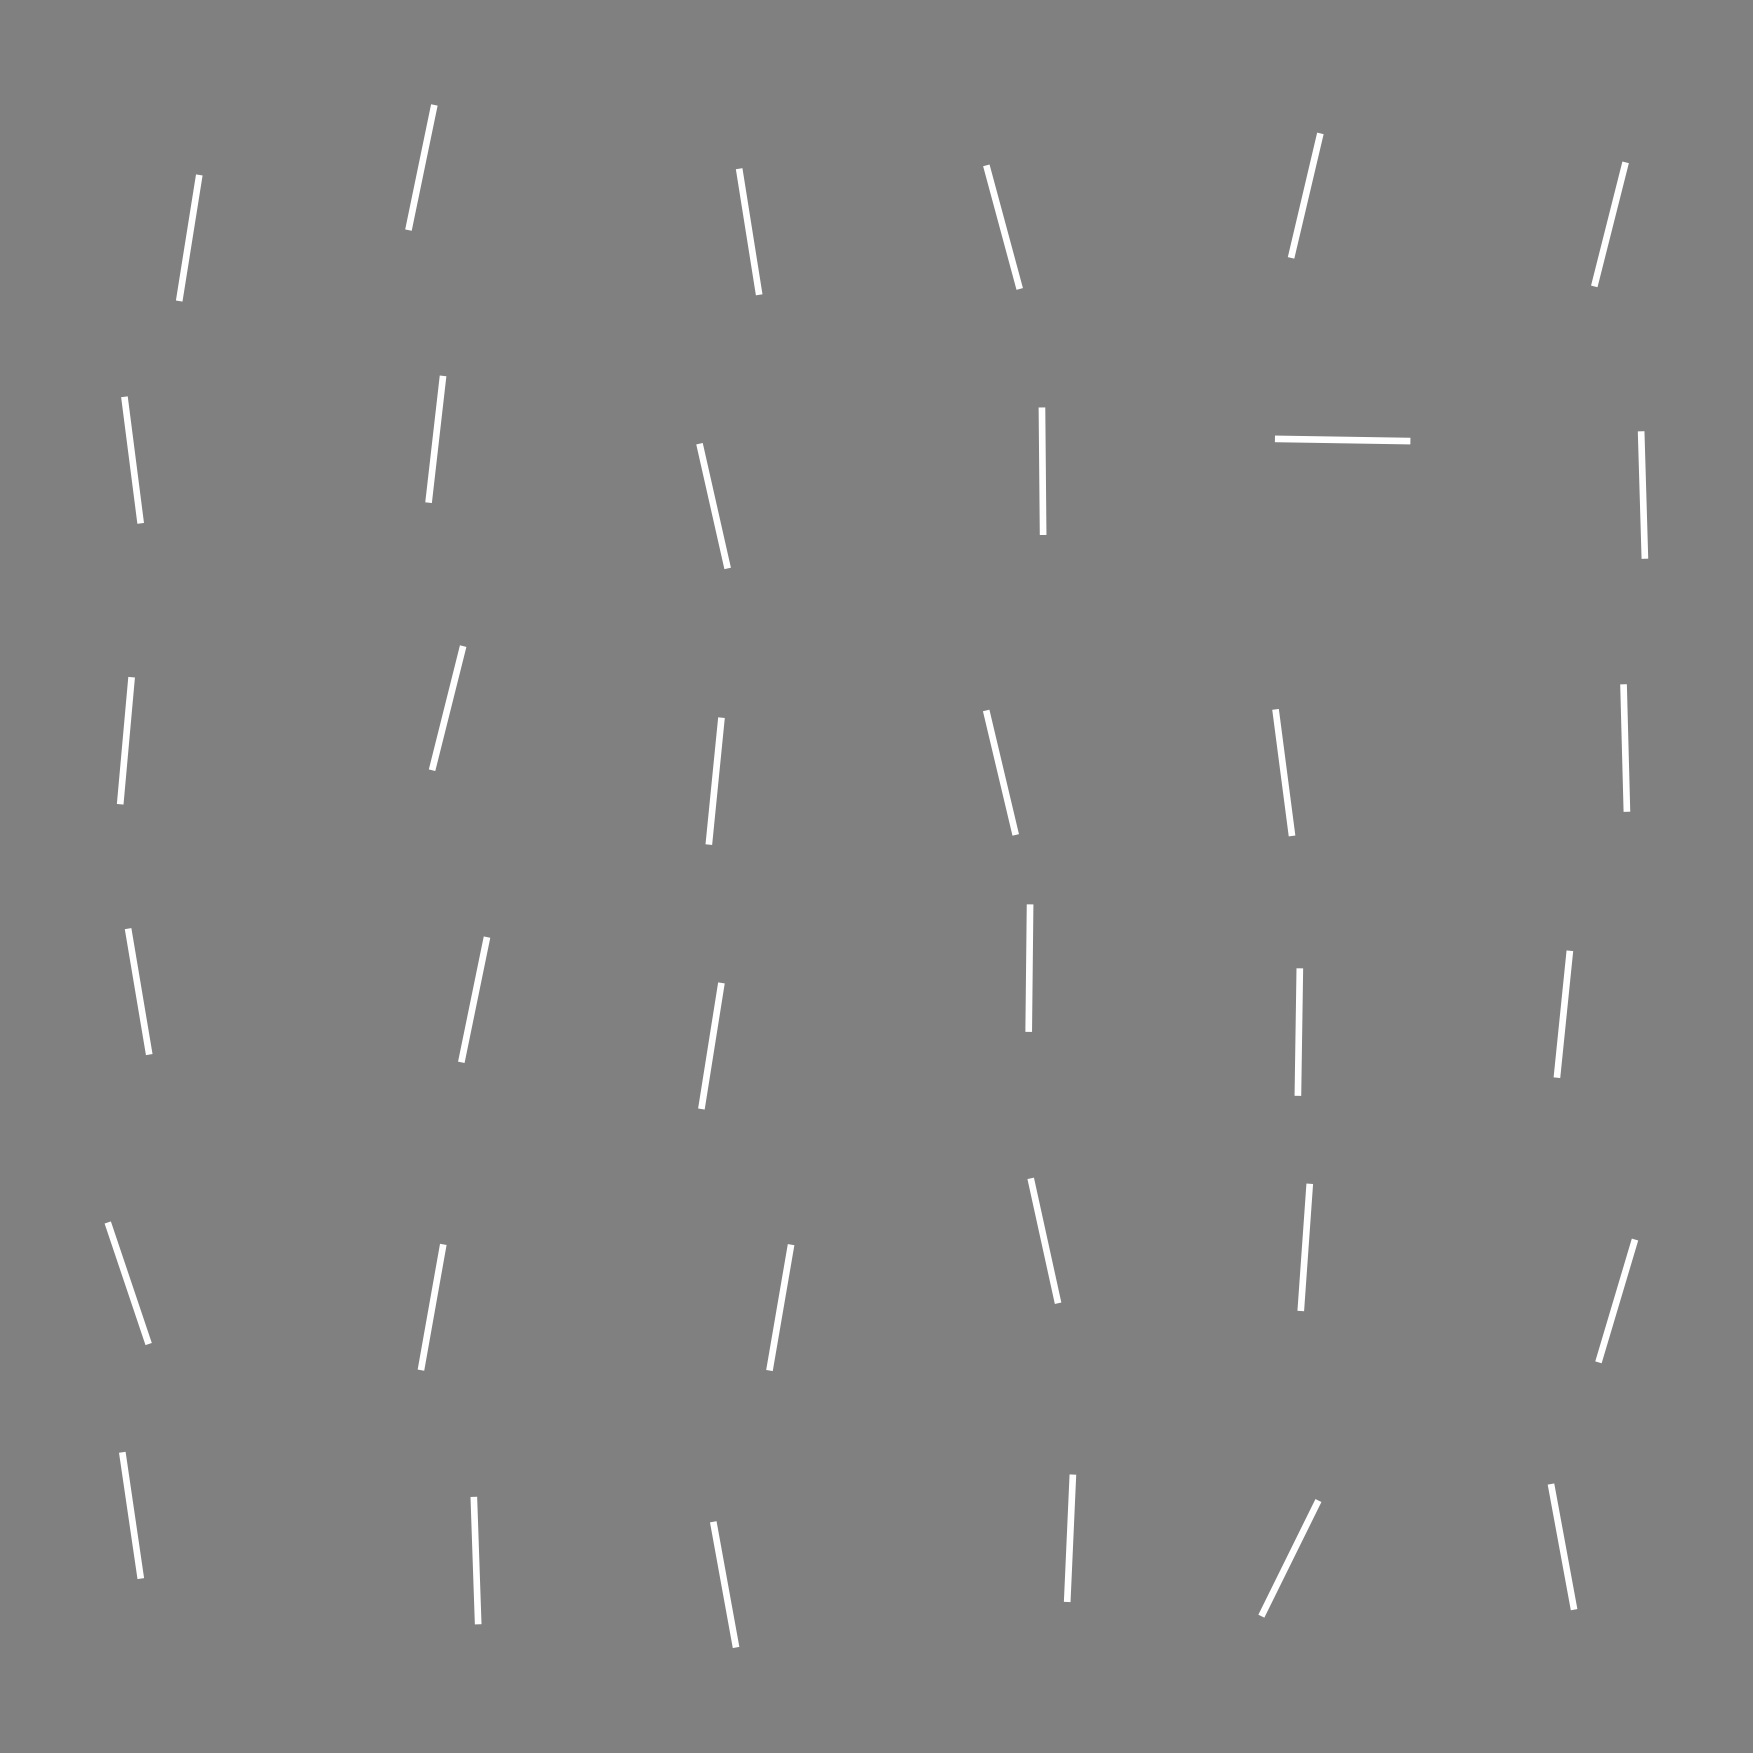

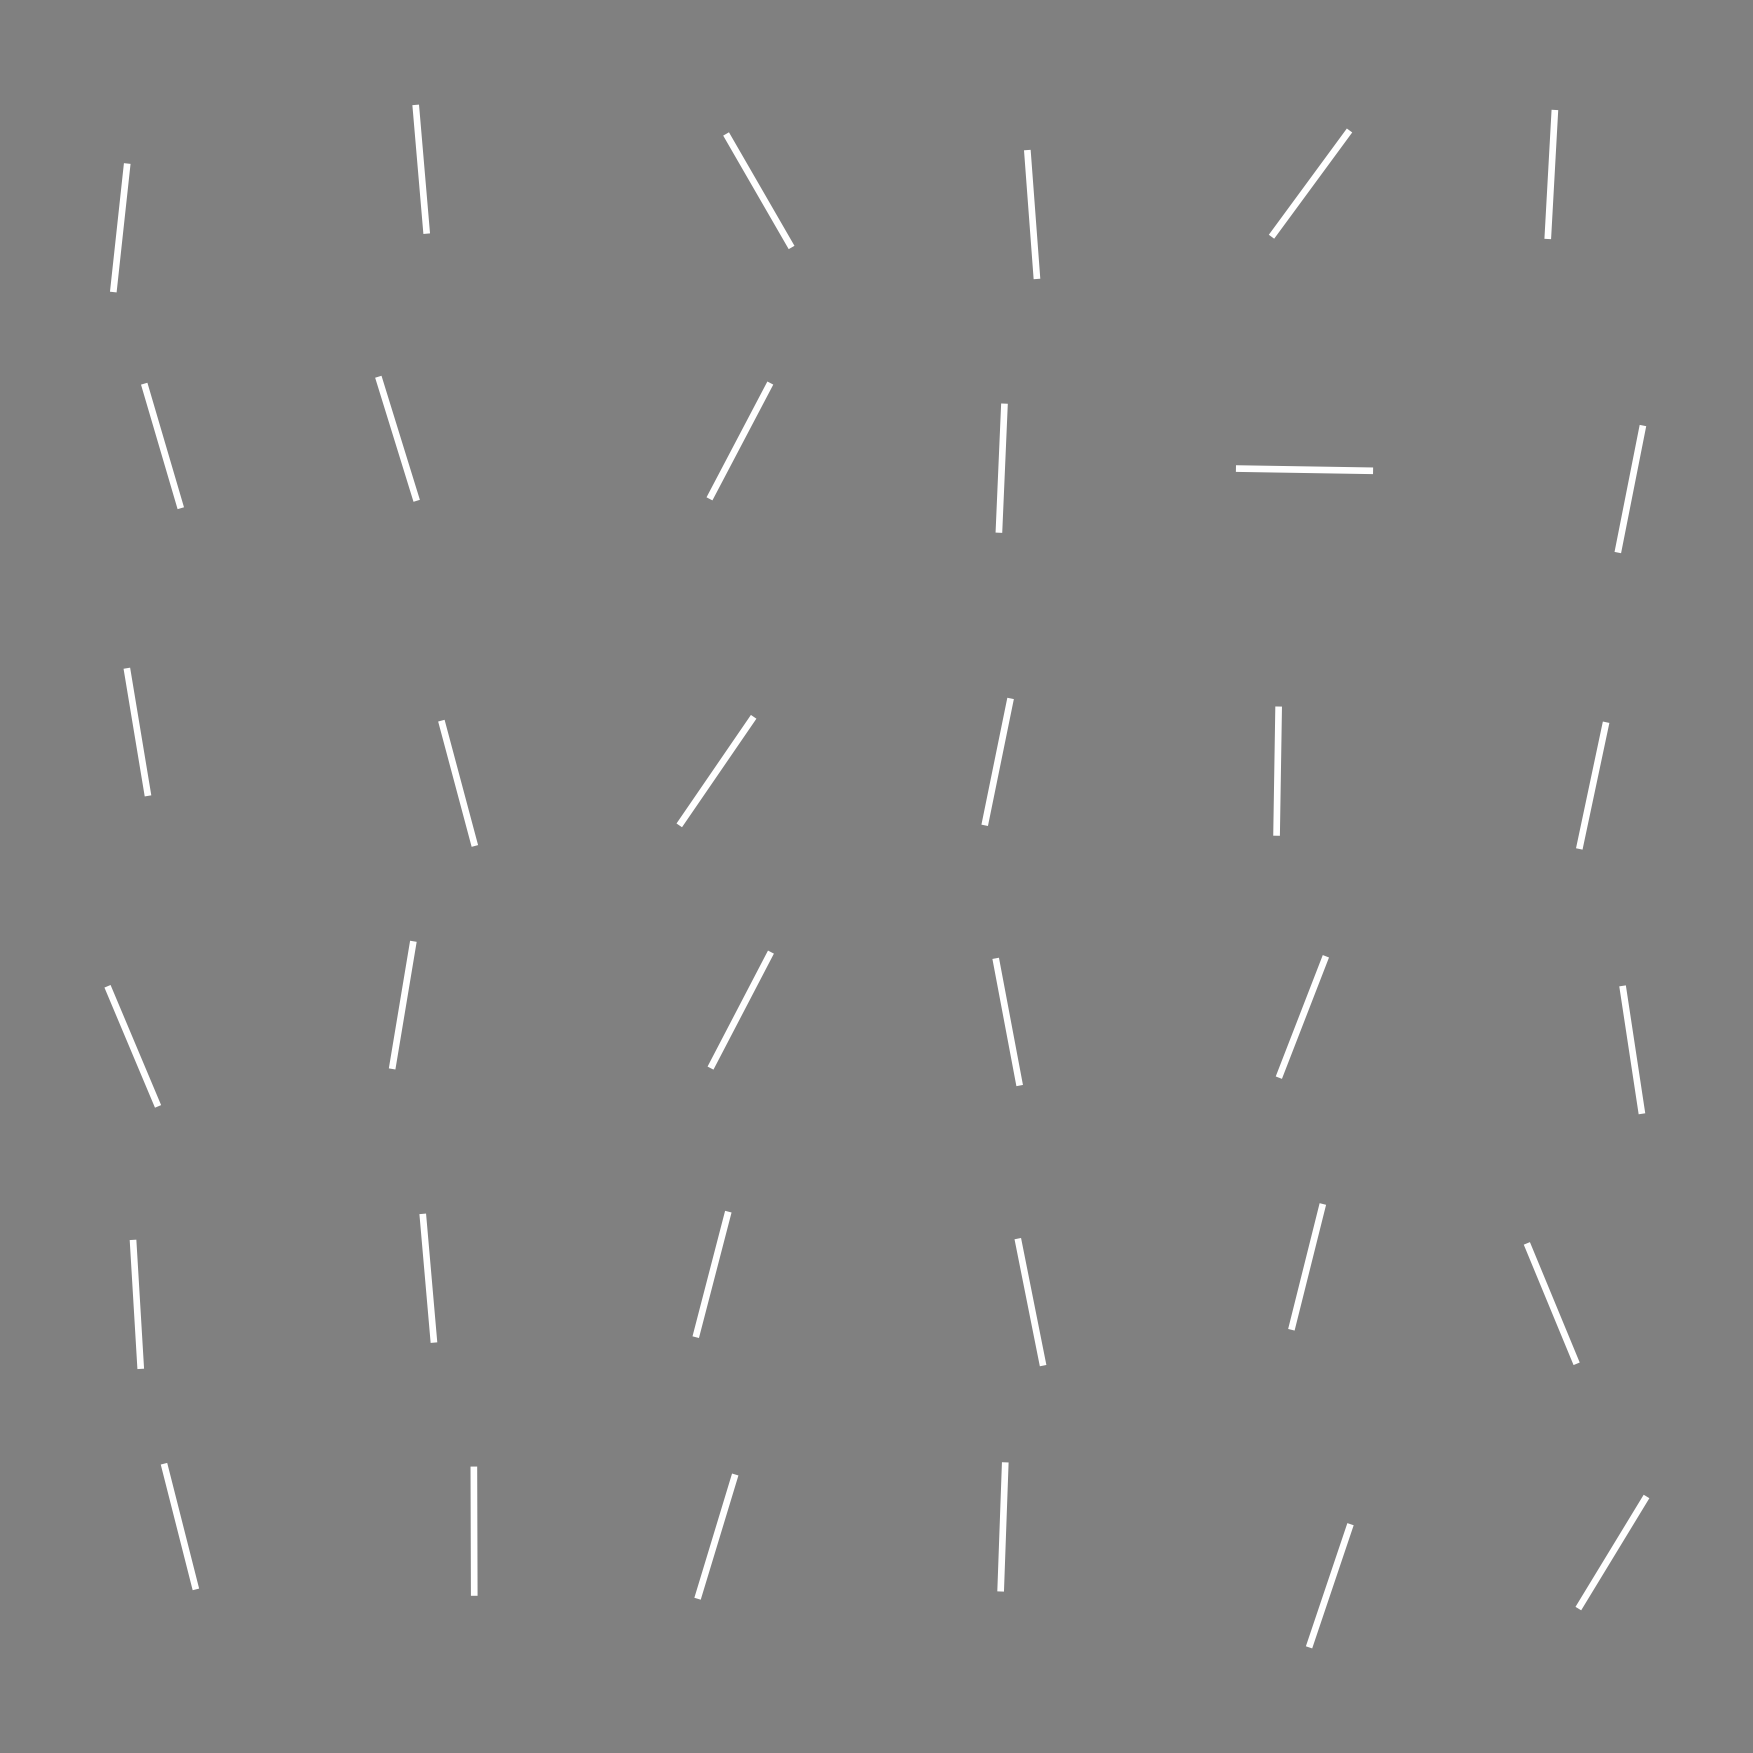

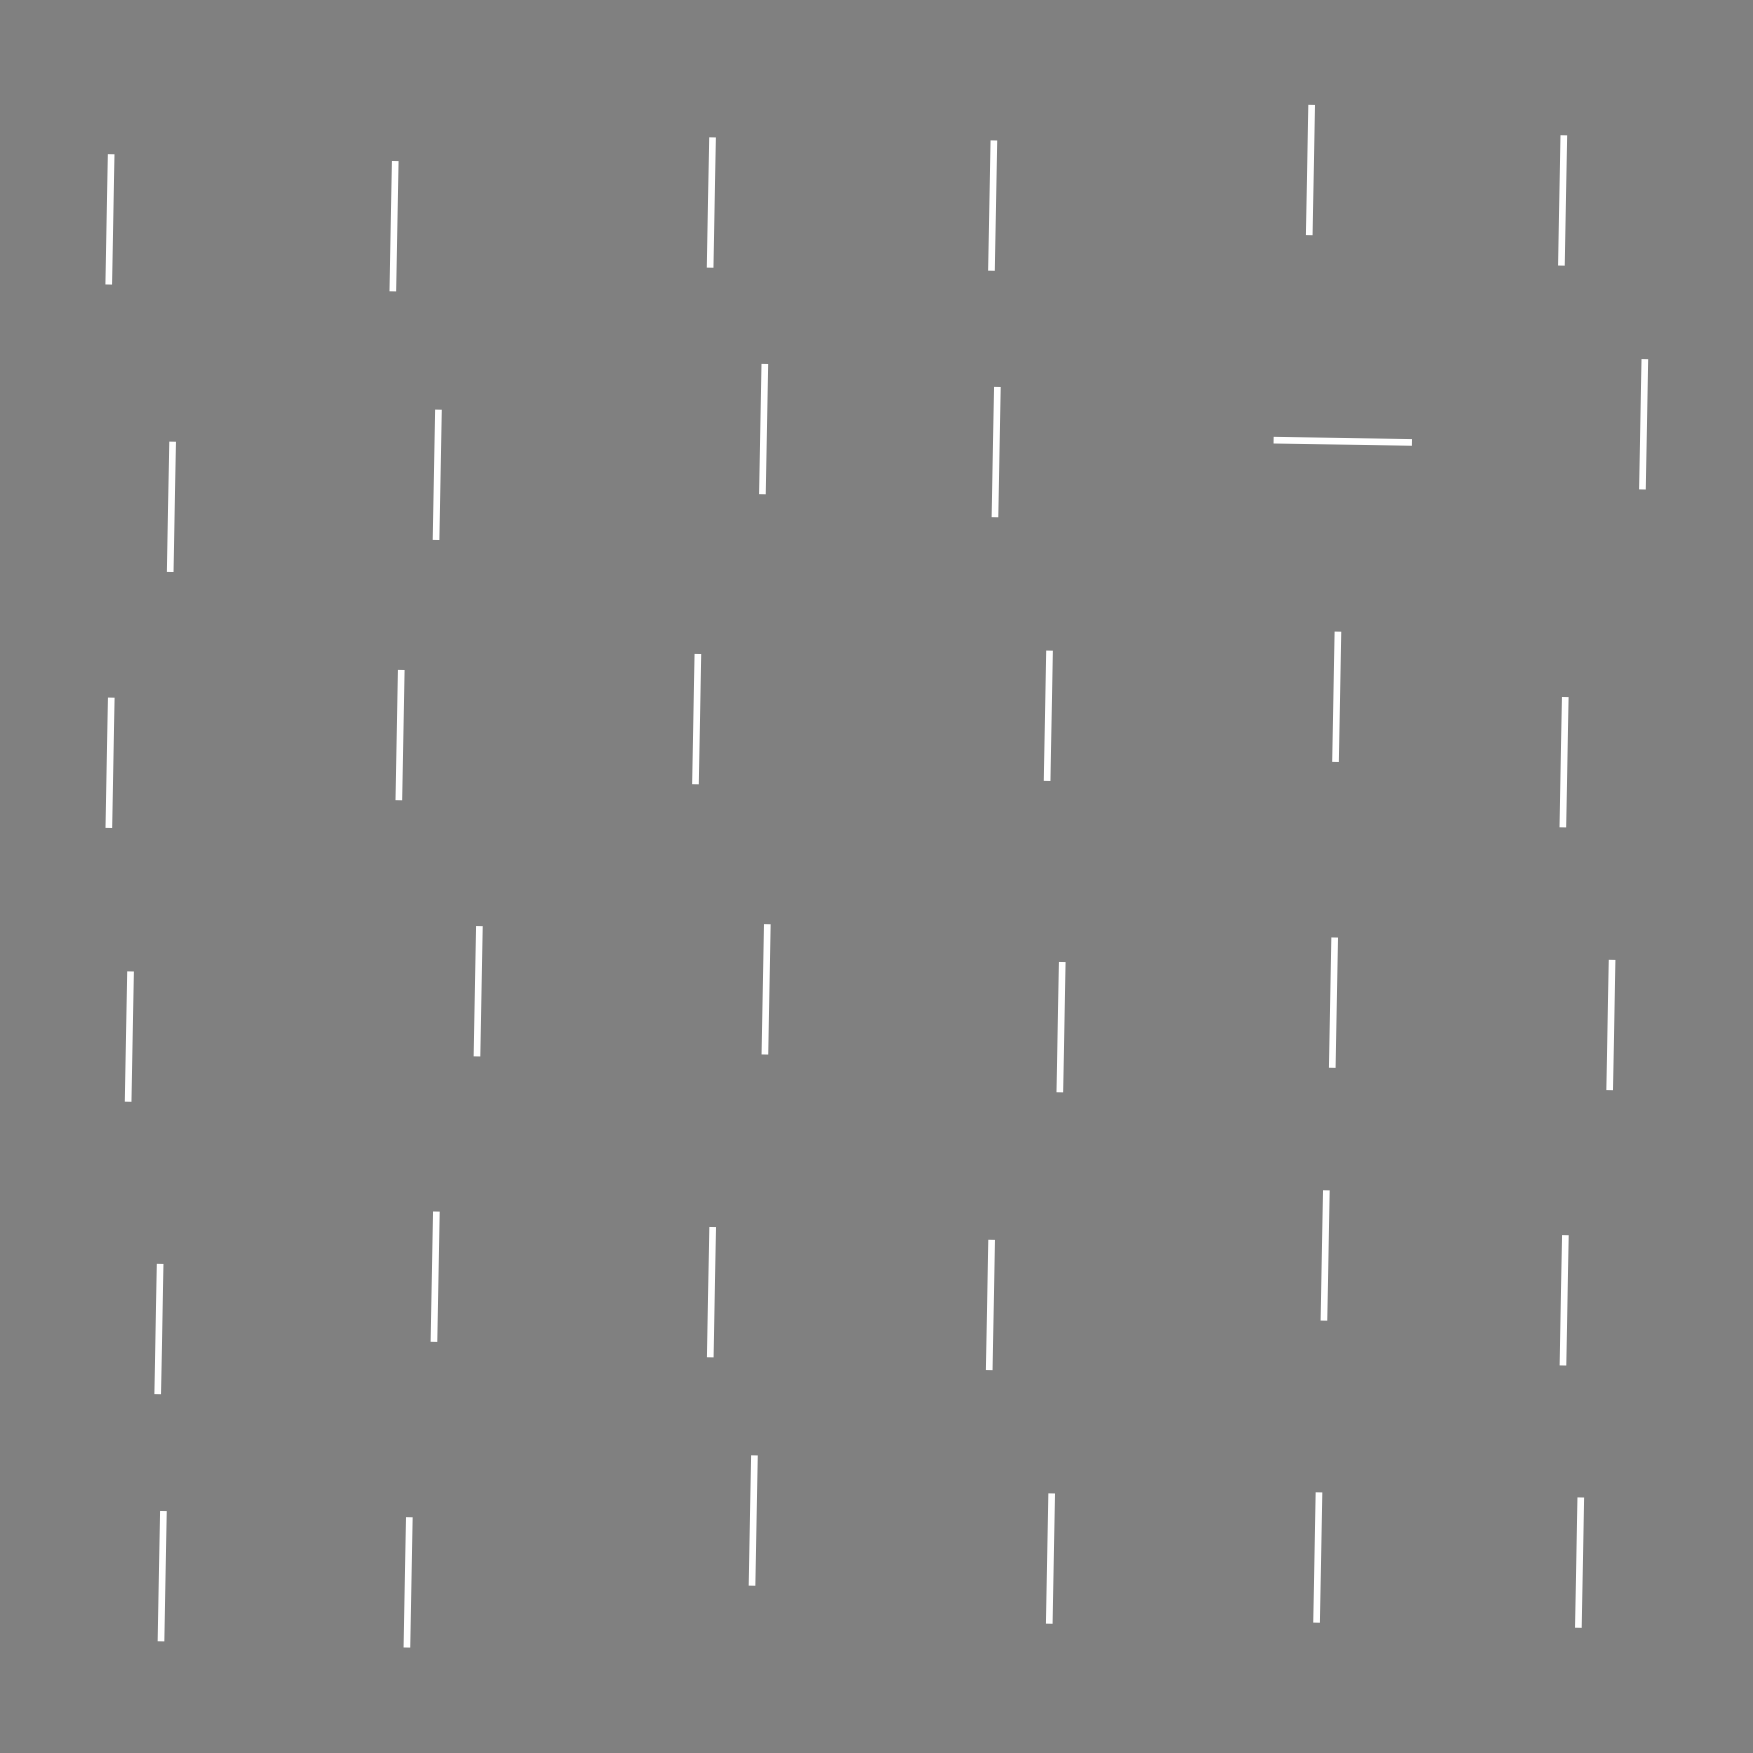

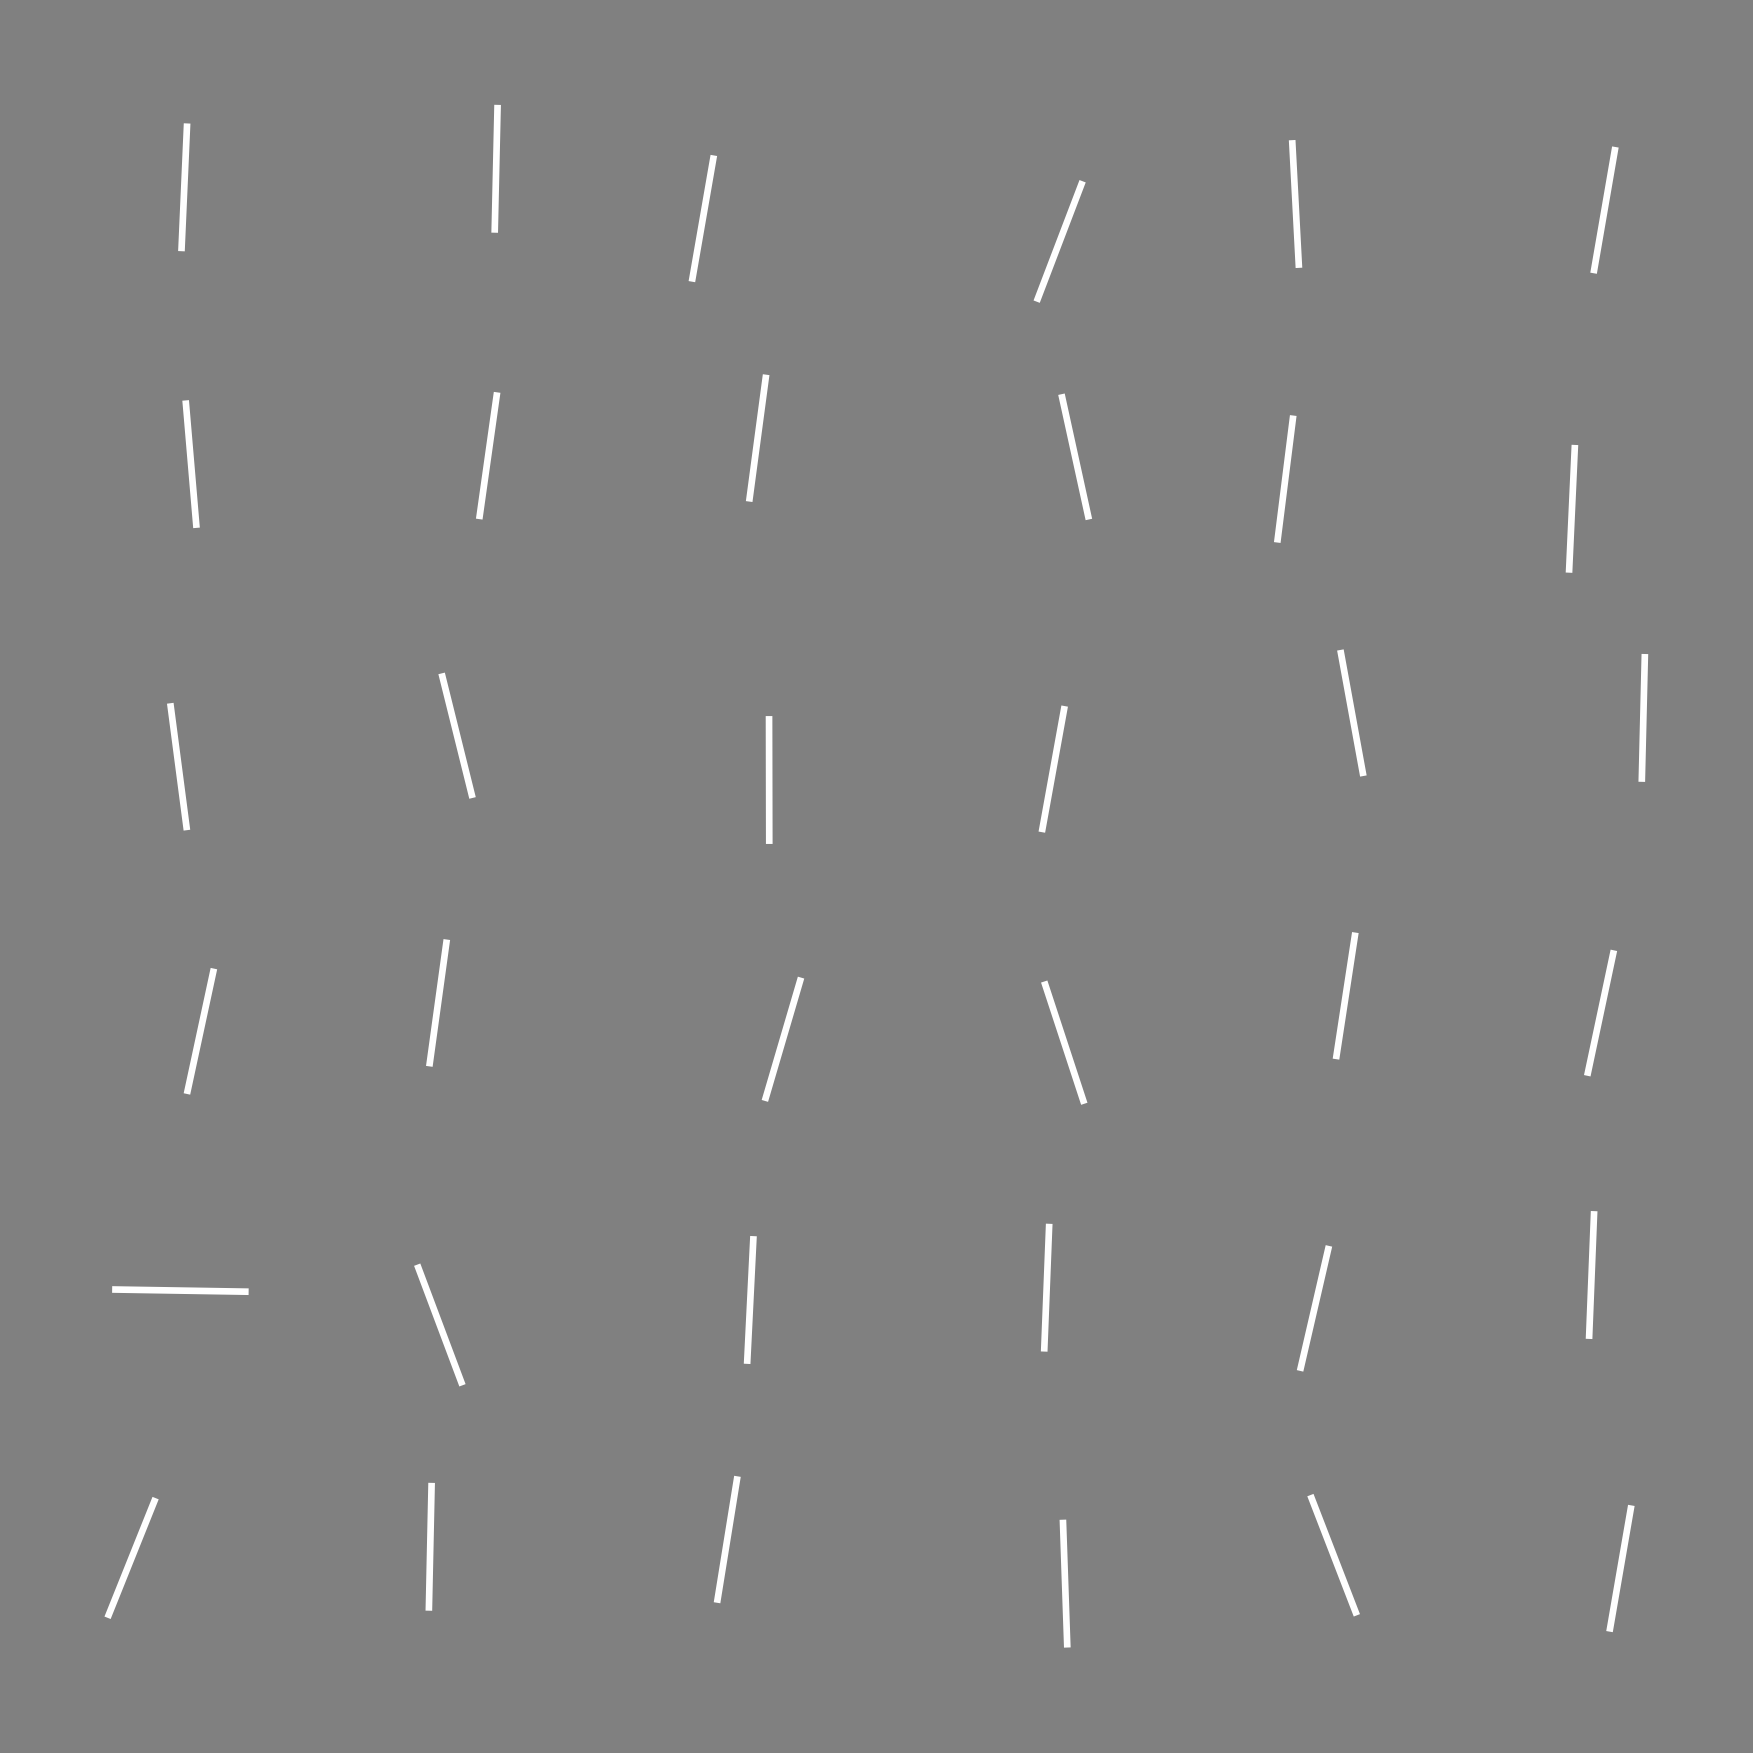

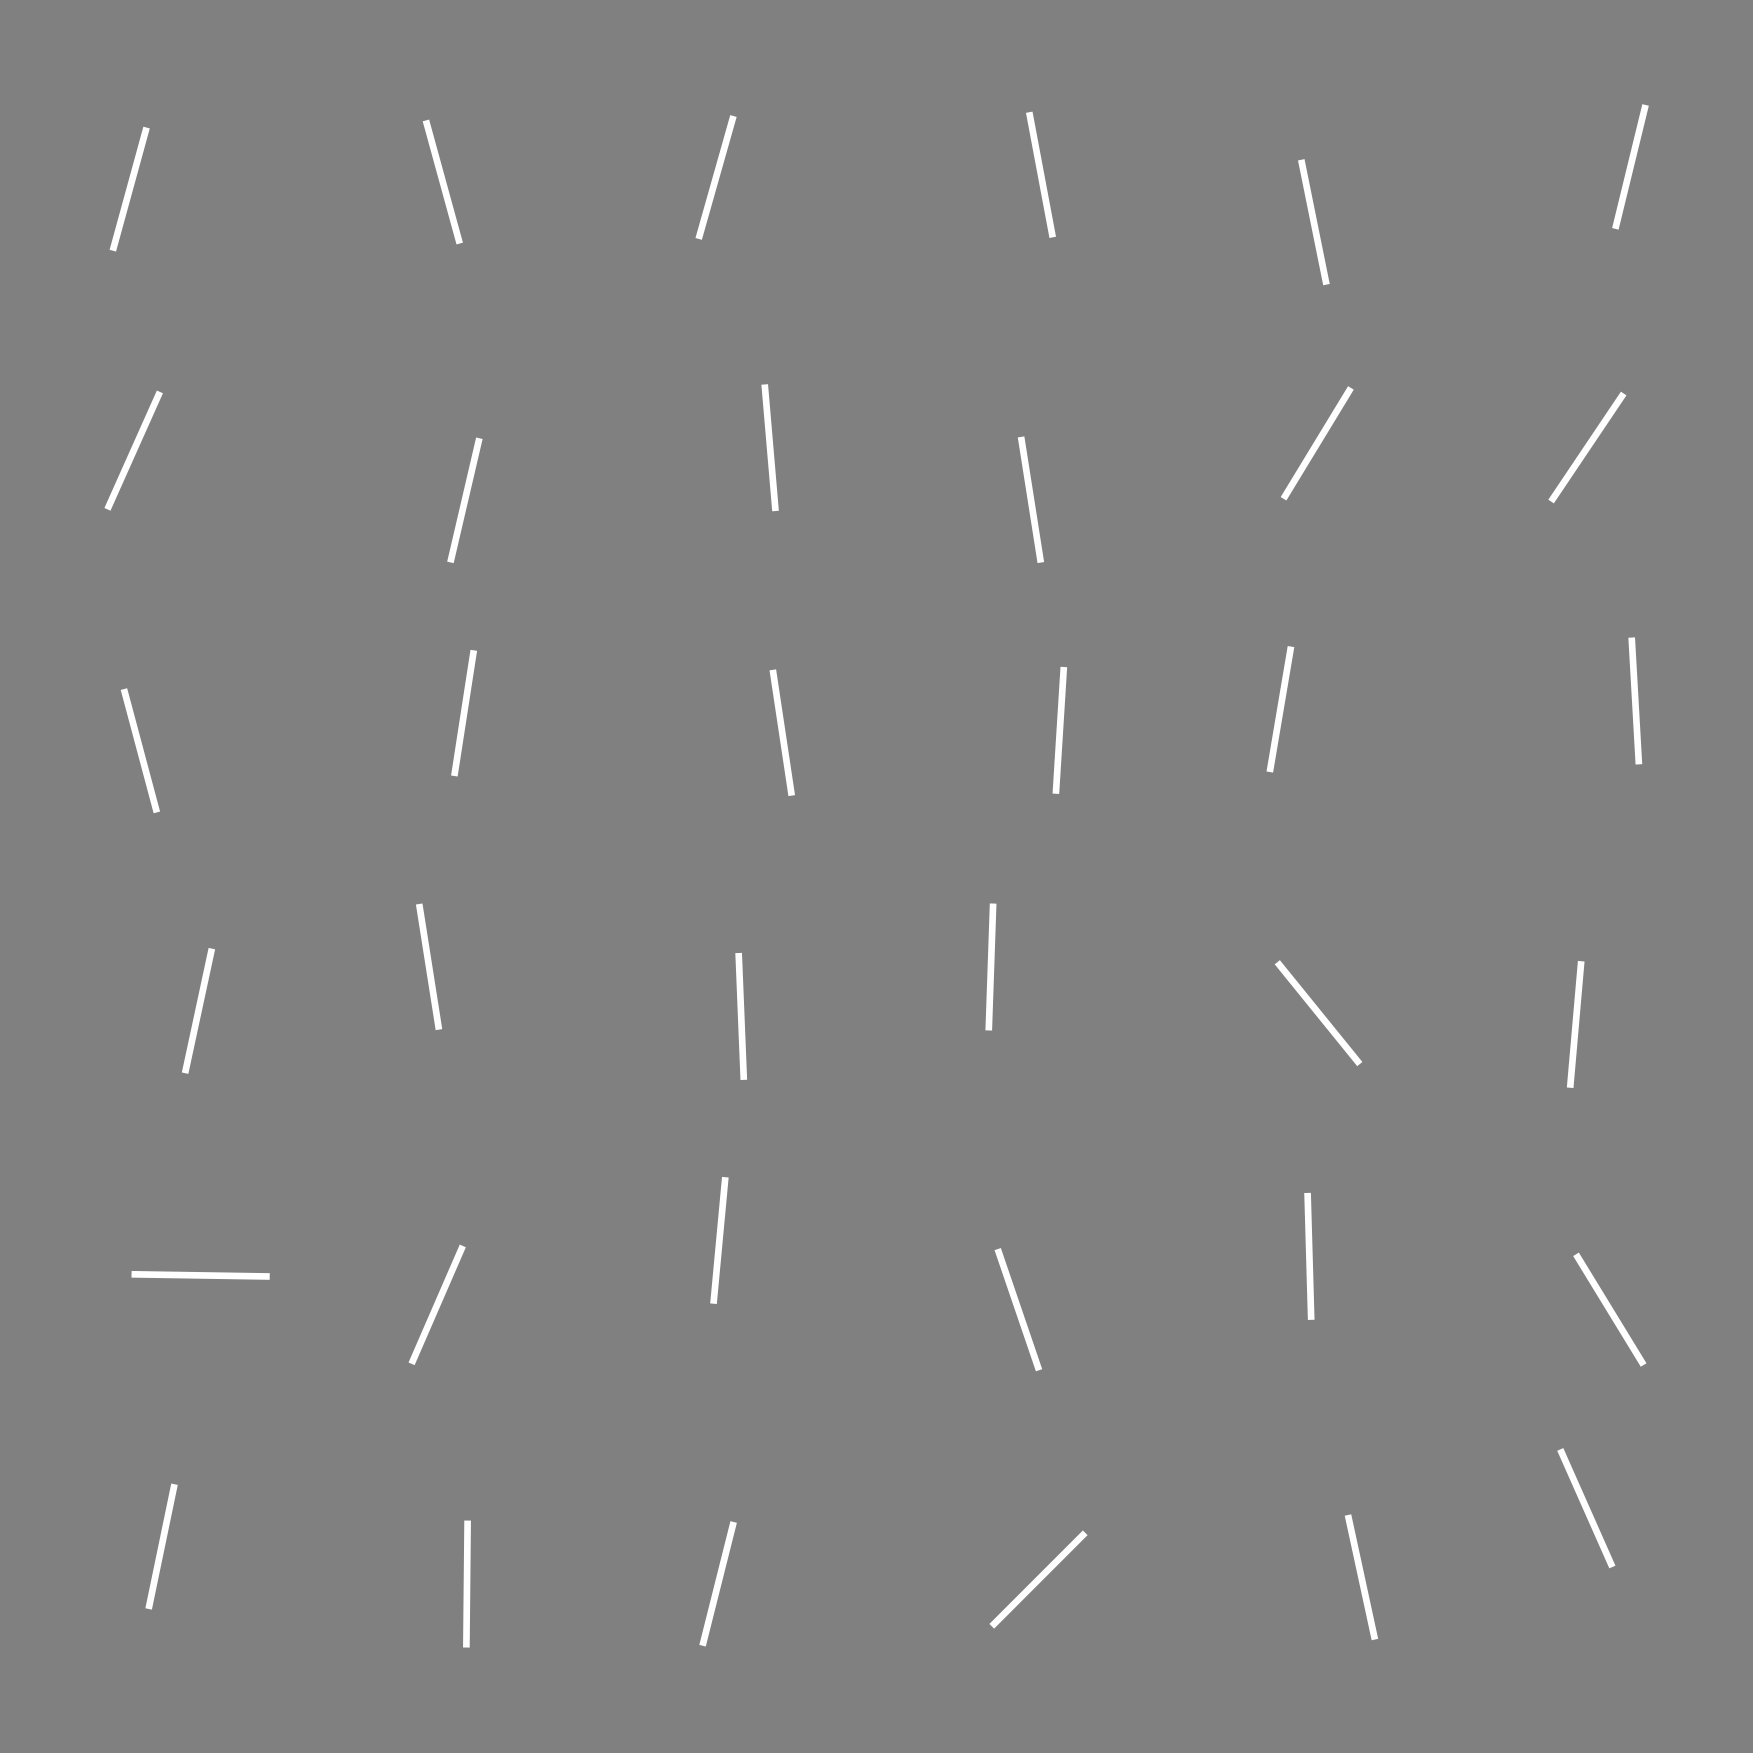

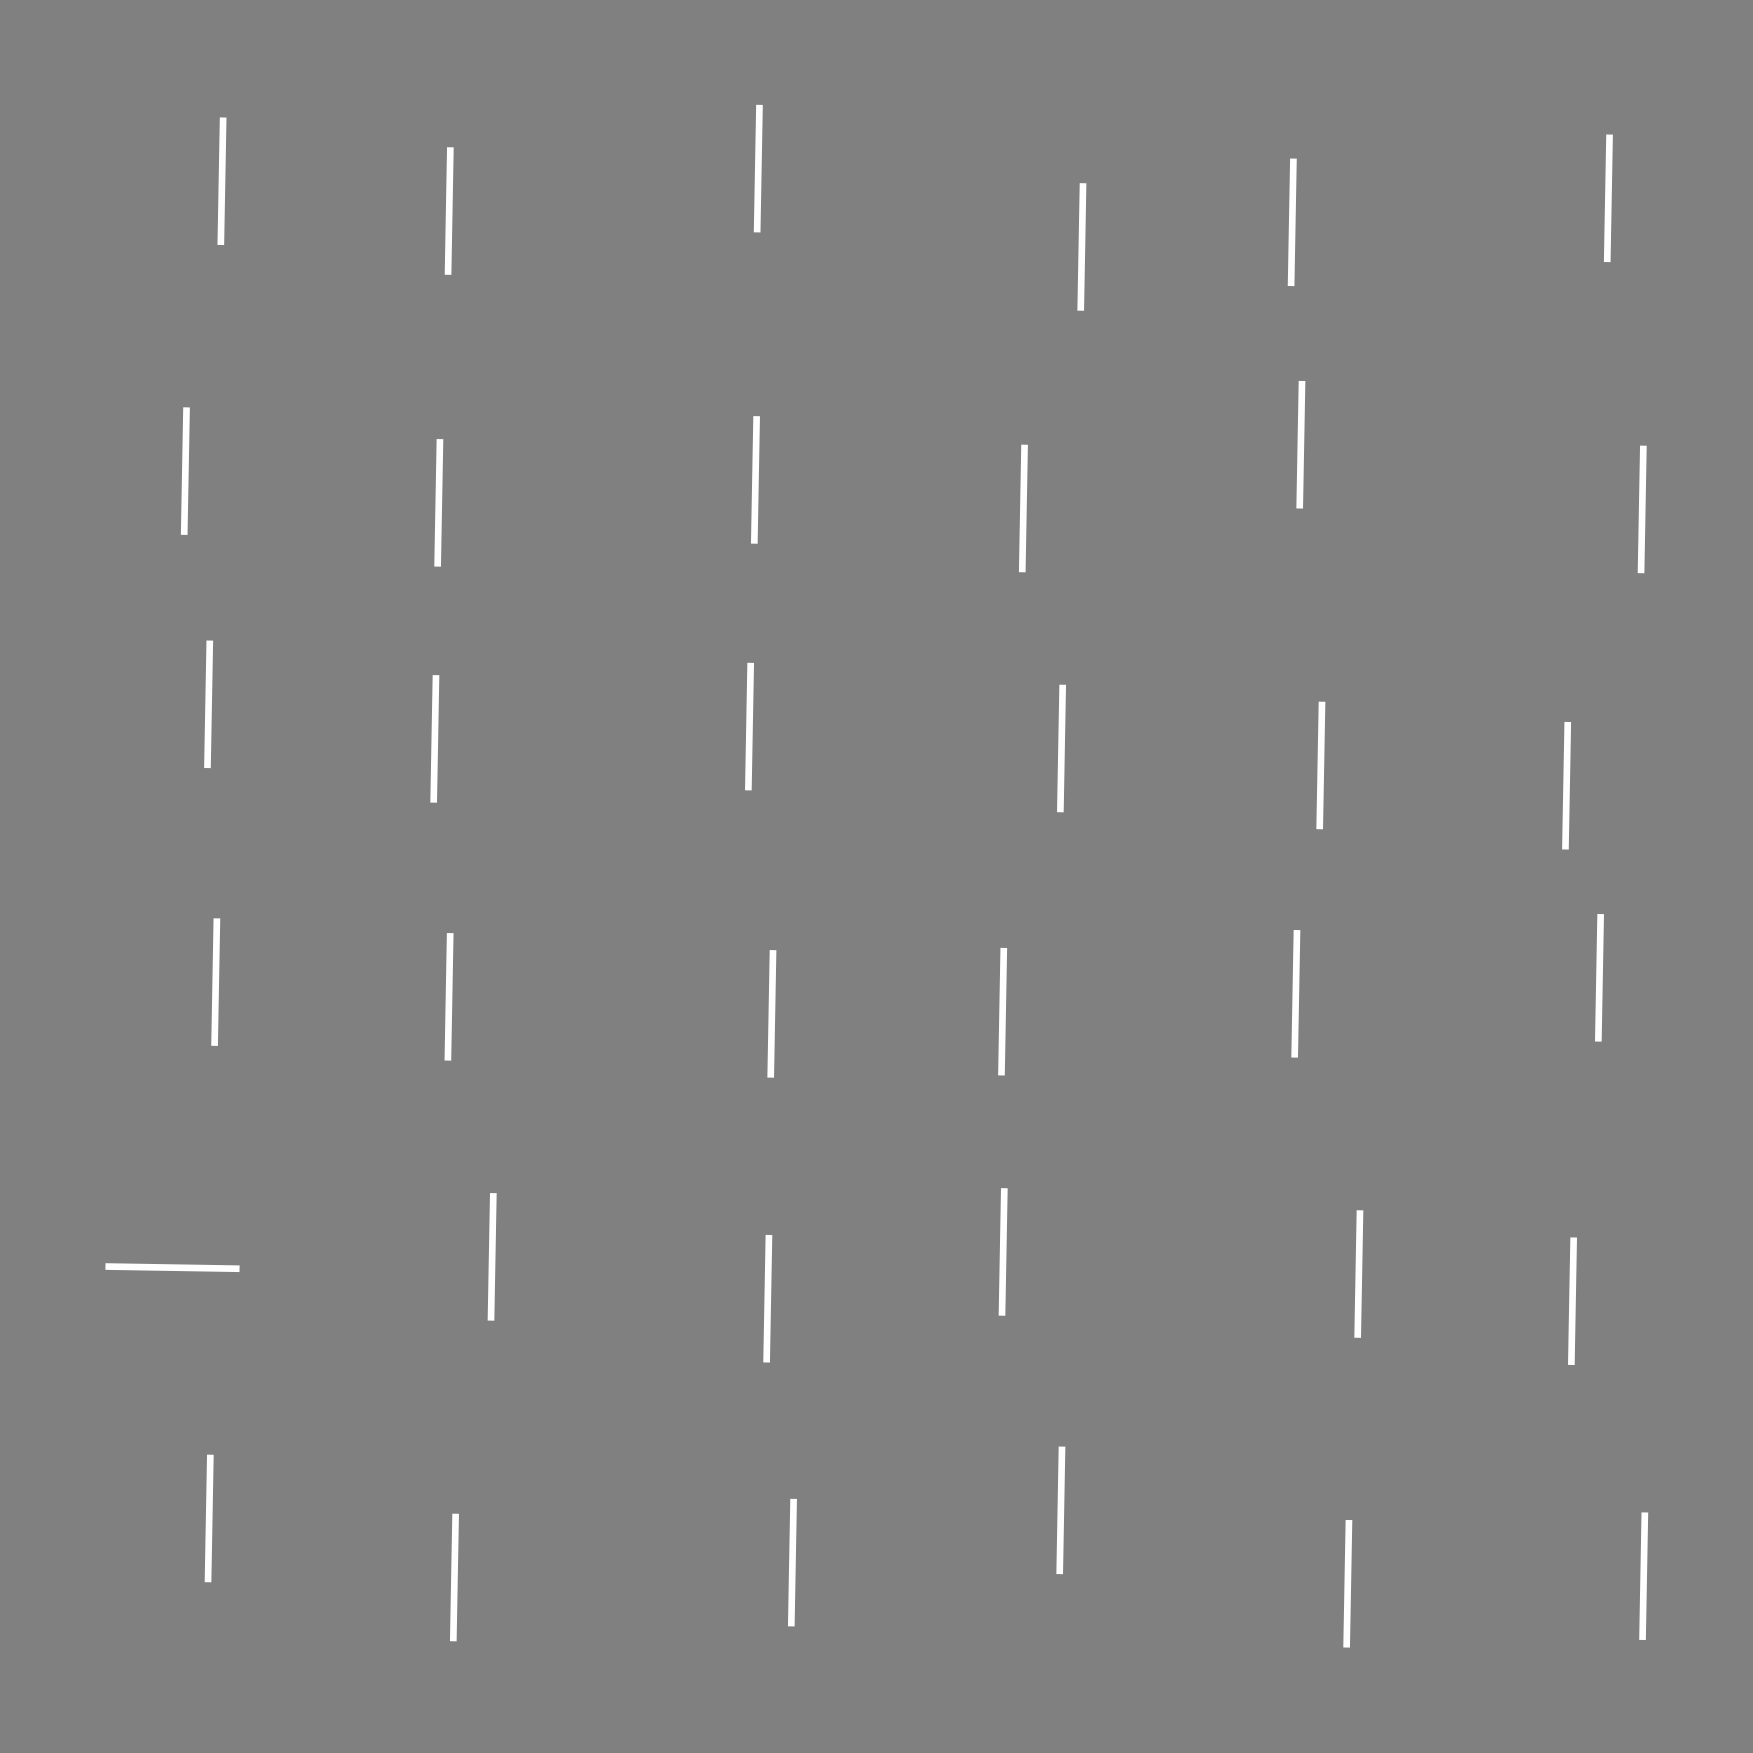

In [15]:
import numpy.random as random
targetOri = random.randint(-5,5)
dMean = targetOri+90
for i in range(2):
    targetPos = random.randint(0,35)
    plot_ex_distr(dMean, 'norm', 10, targetPos, targetOri, 'ex_norm_card10_%i.png' %i)
    plot_ex_distr(dMean, 'norm', 15, targetPos, targetOri, 'ex_norm_card15_%i.png' %i)
    plot_ex_distr(dMean, 'norm', 0, targetPos, targetOri, 'ex_norm_card0_%i.png' %i)

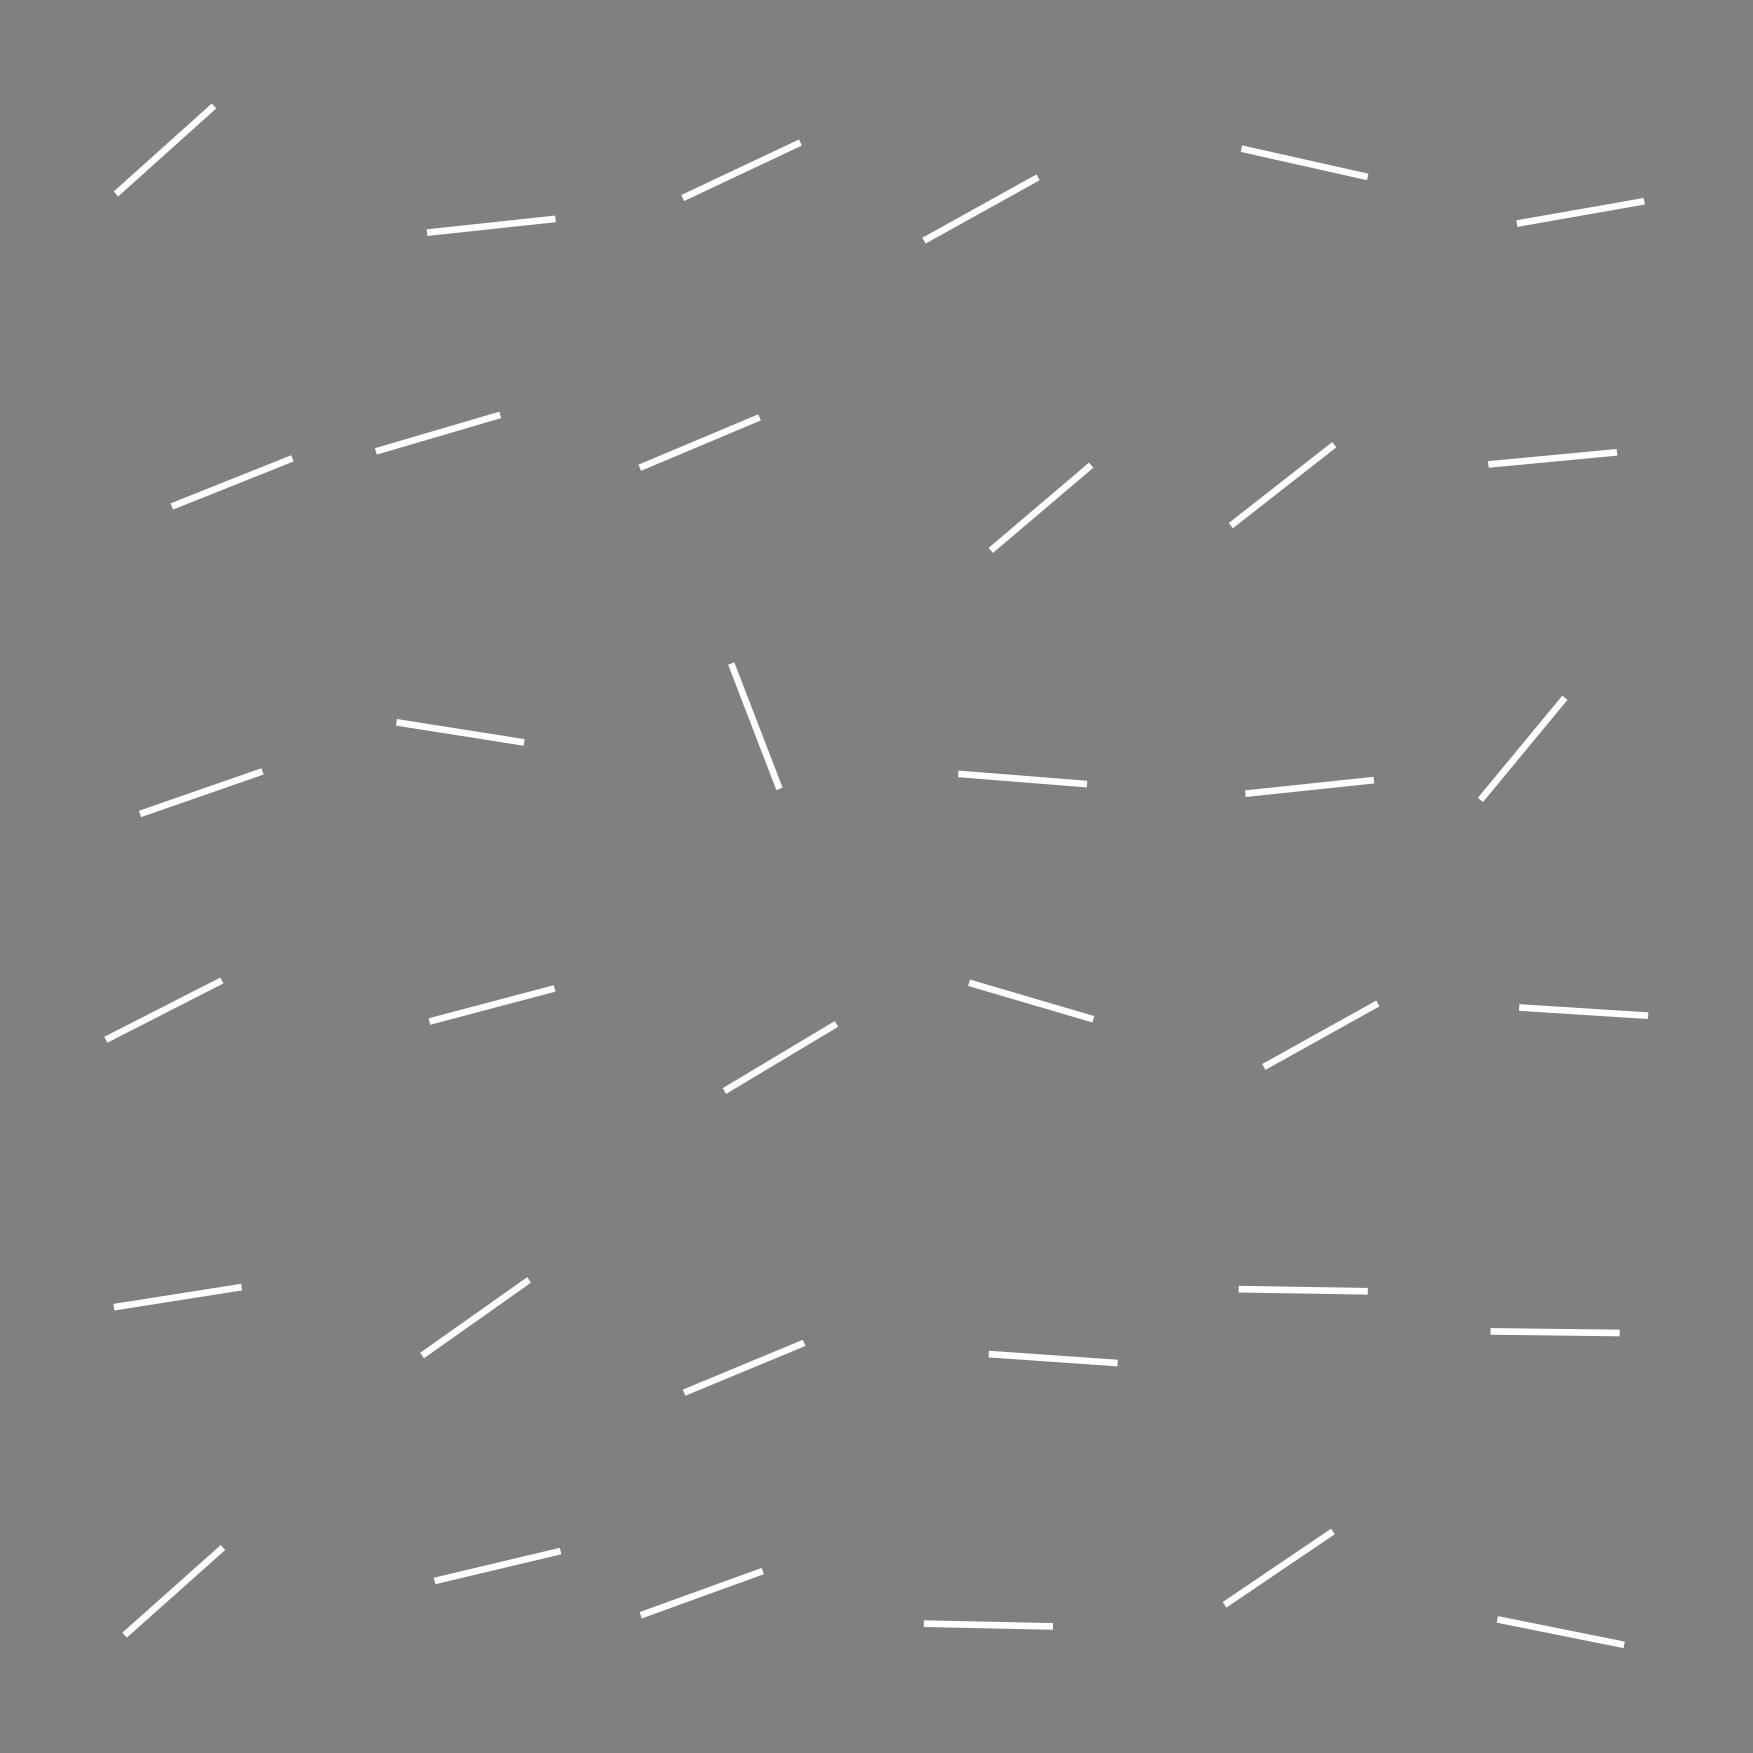

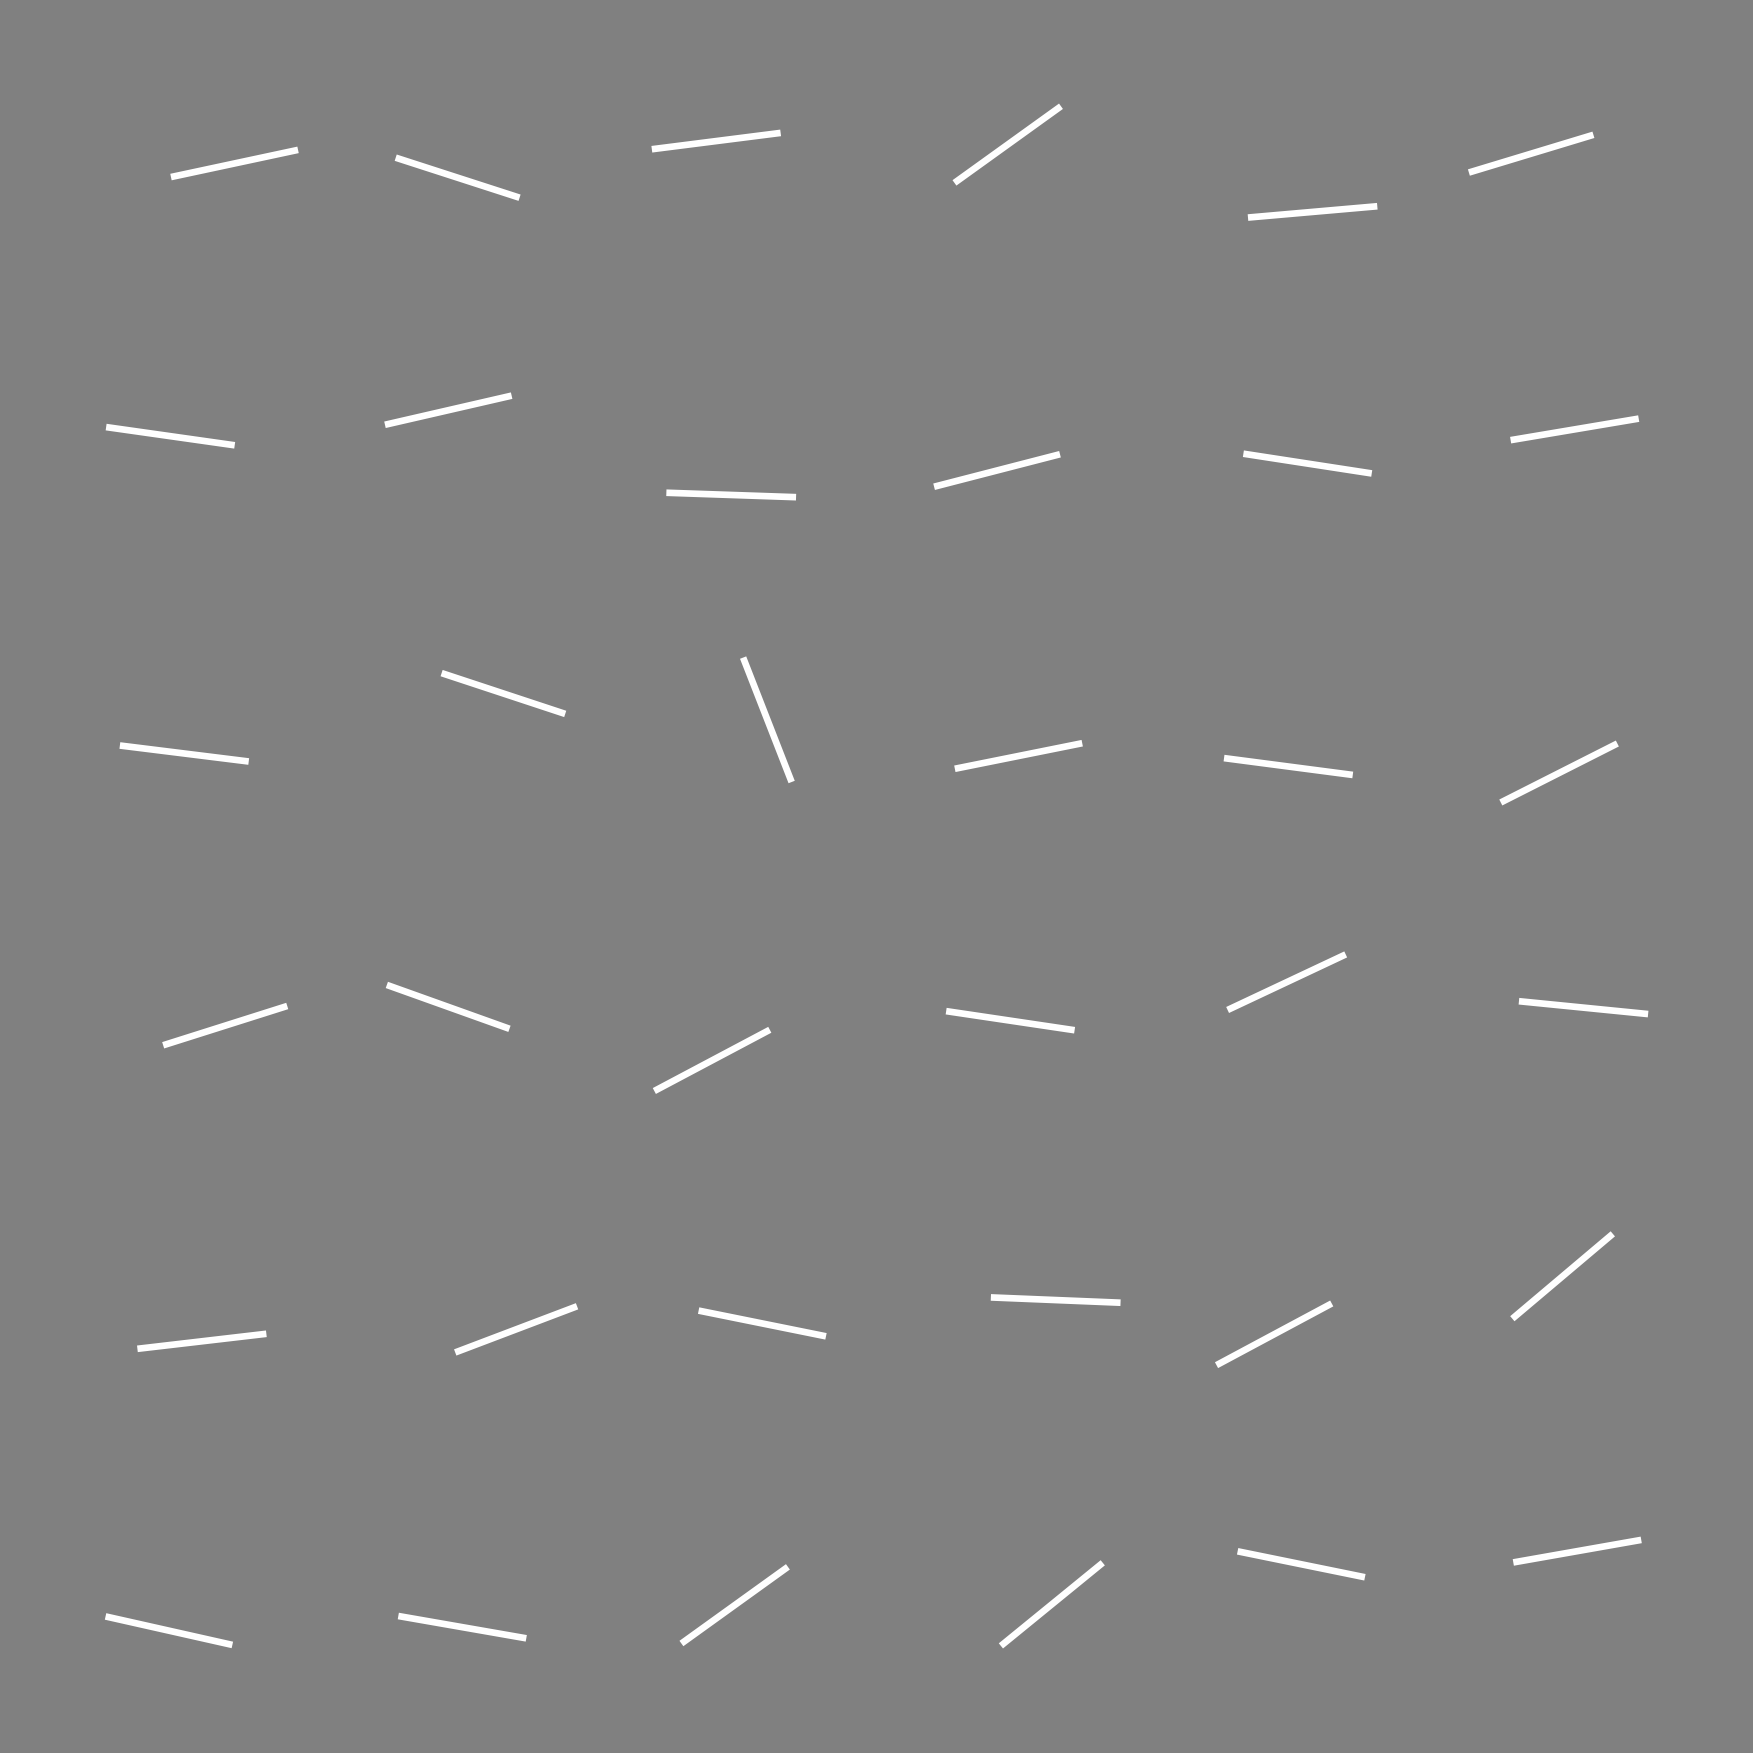

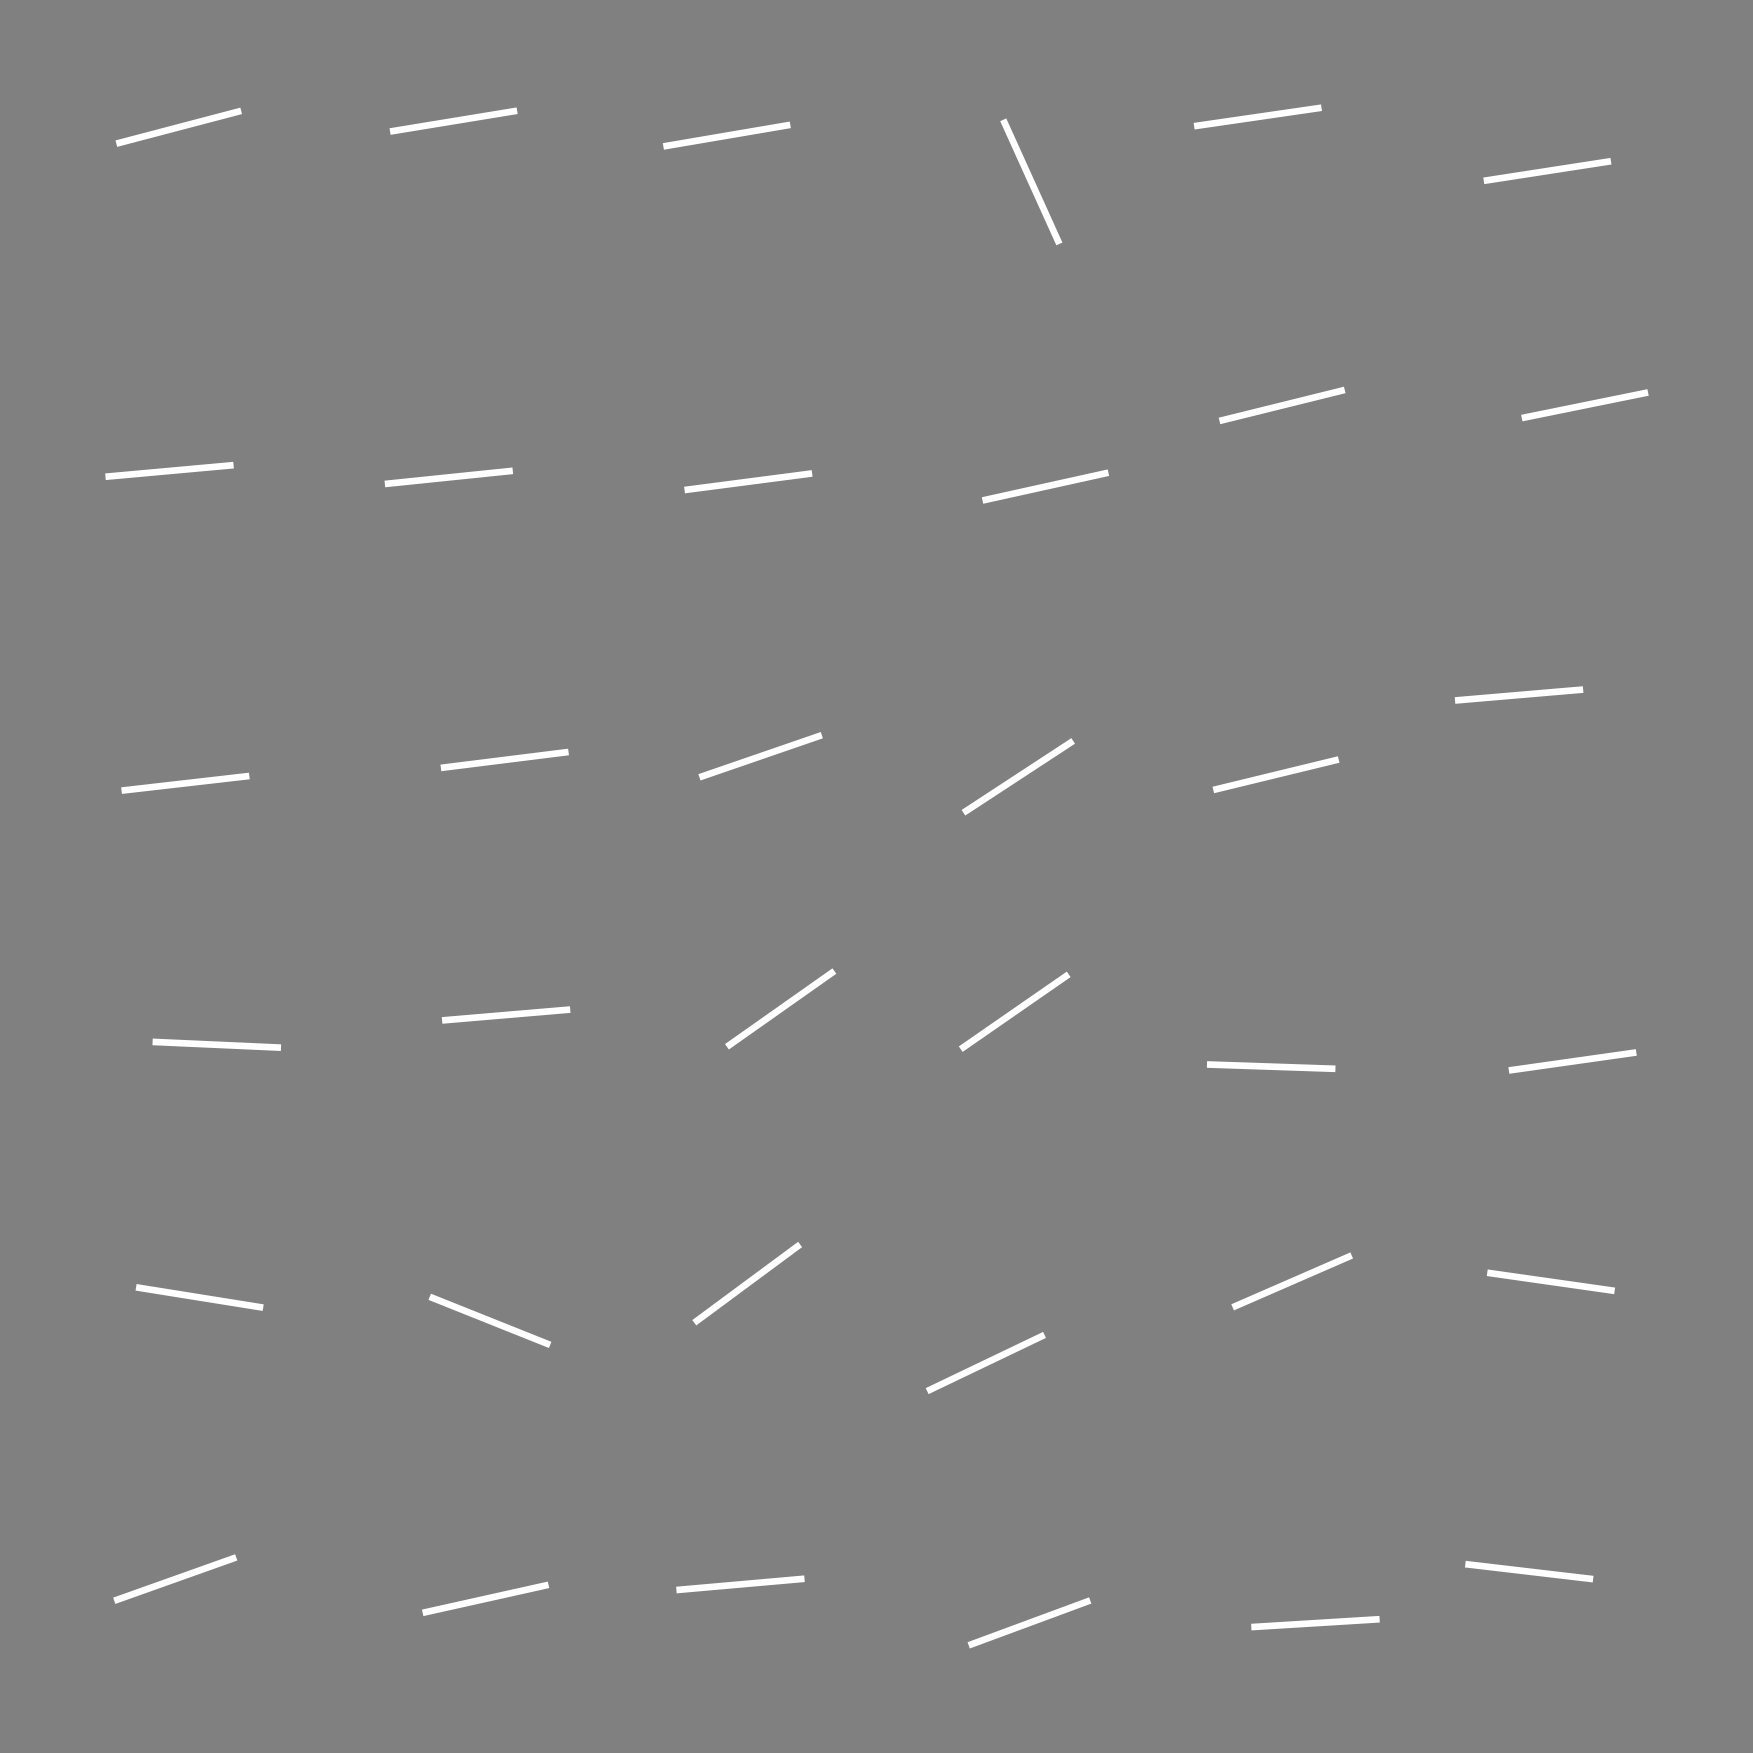

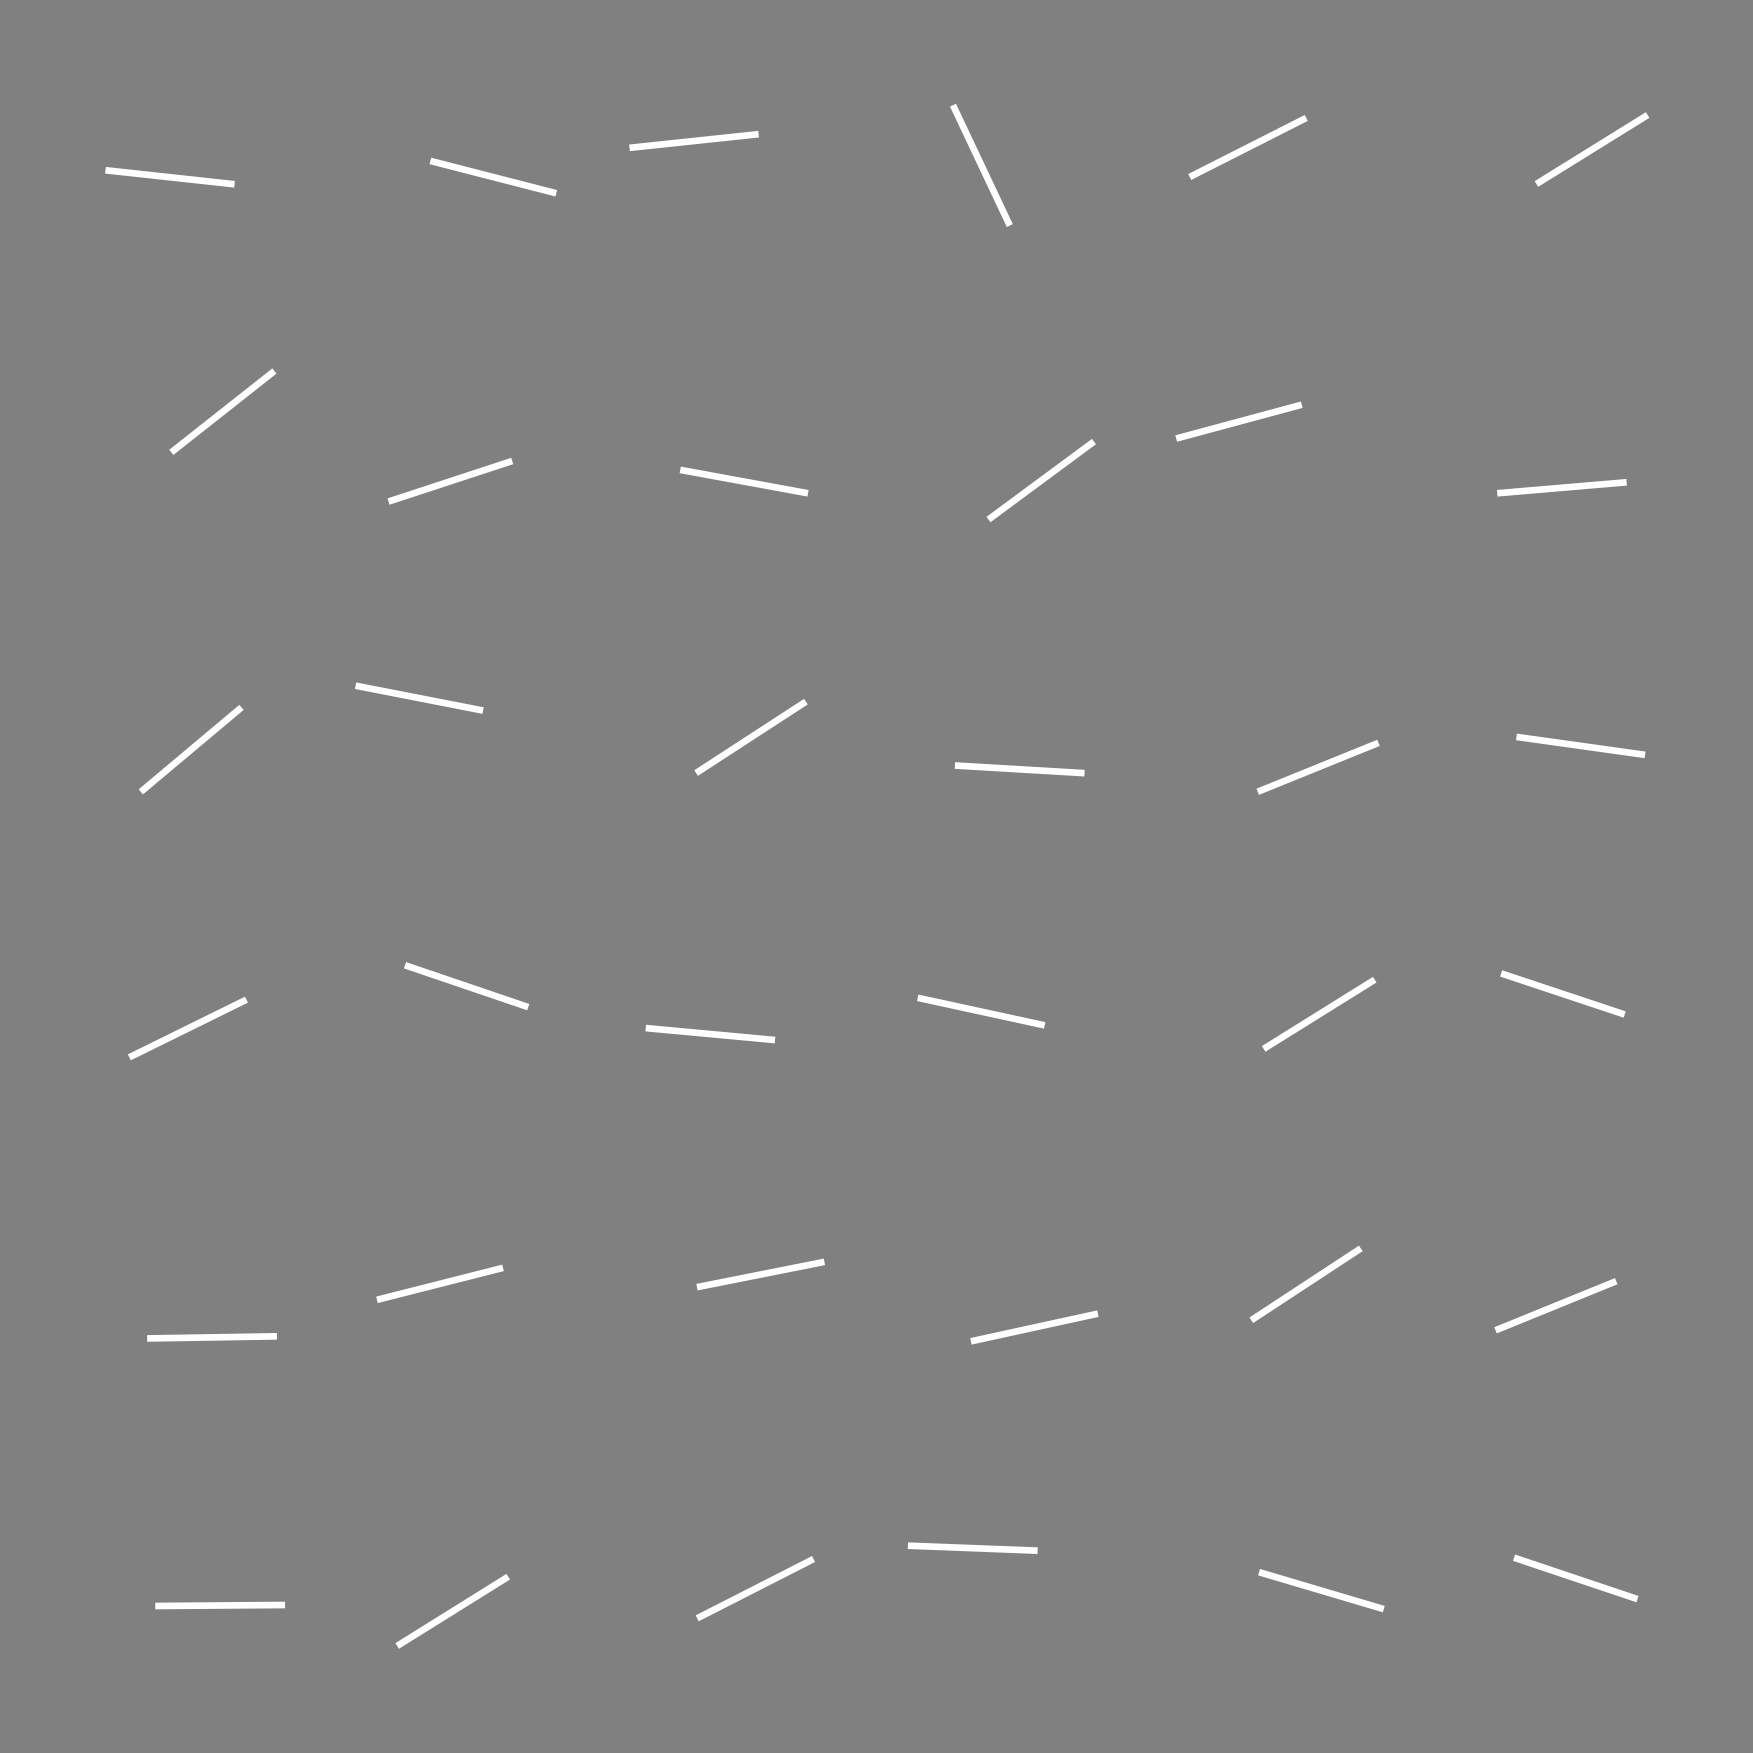

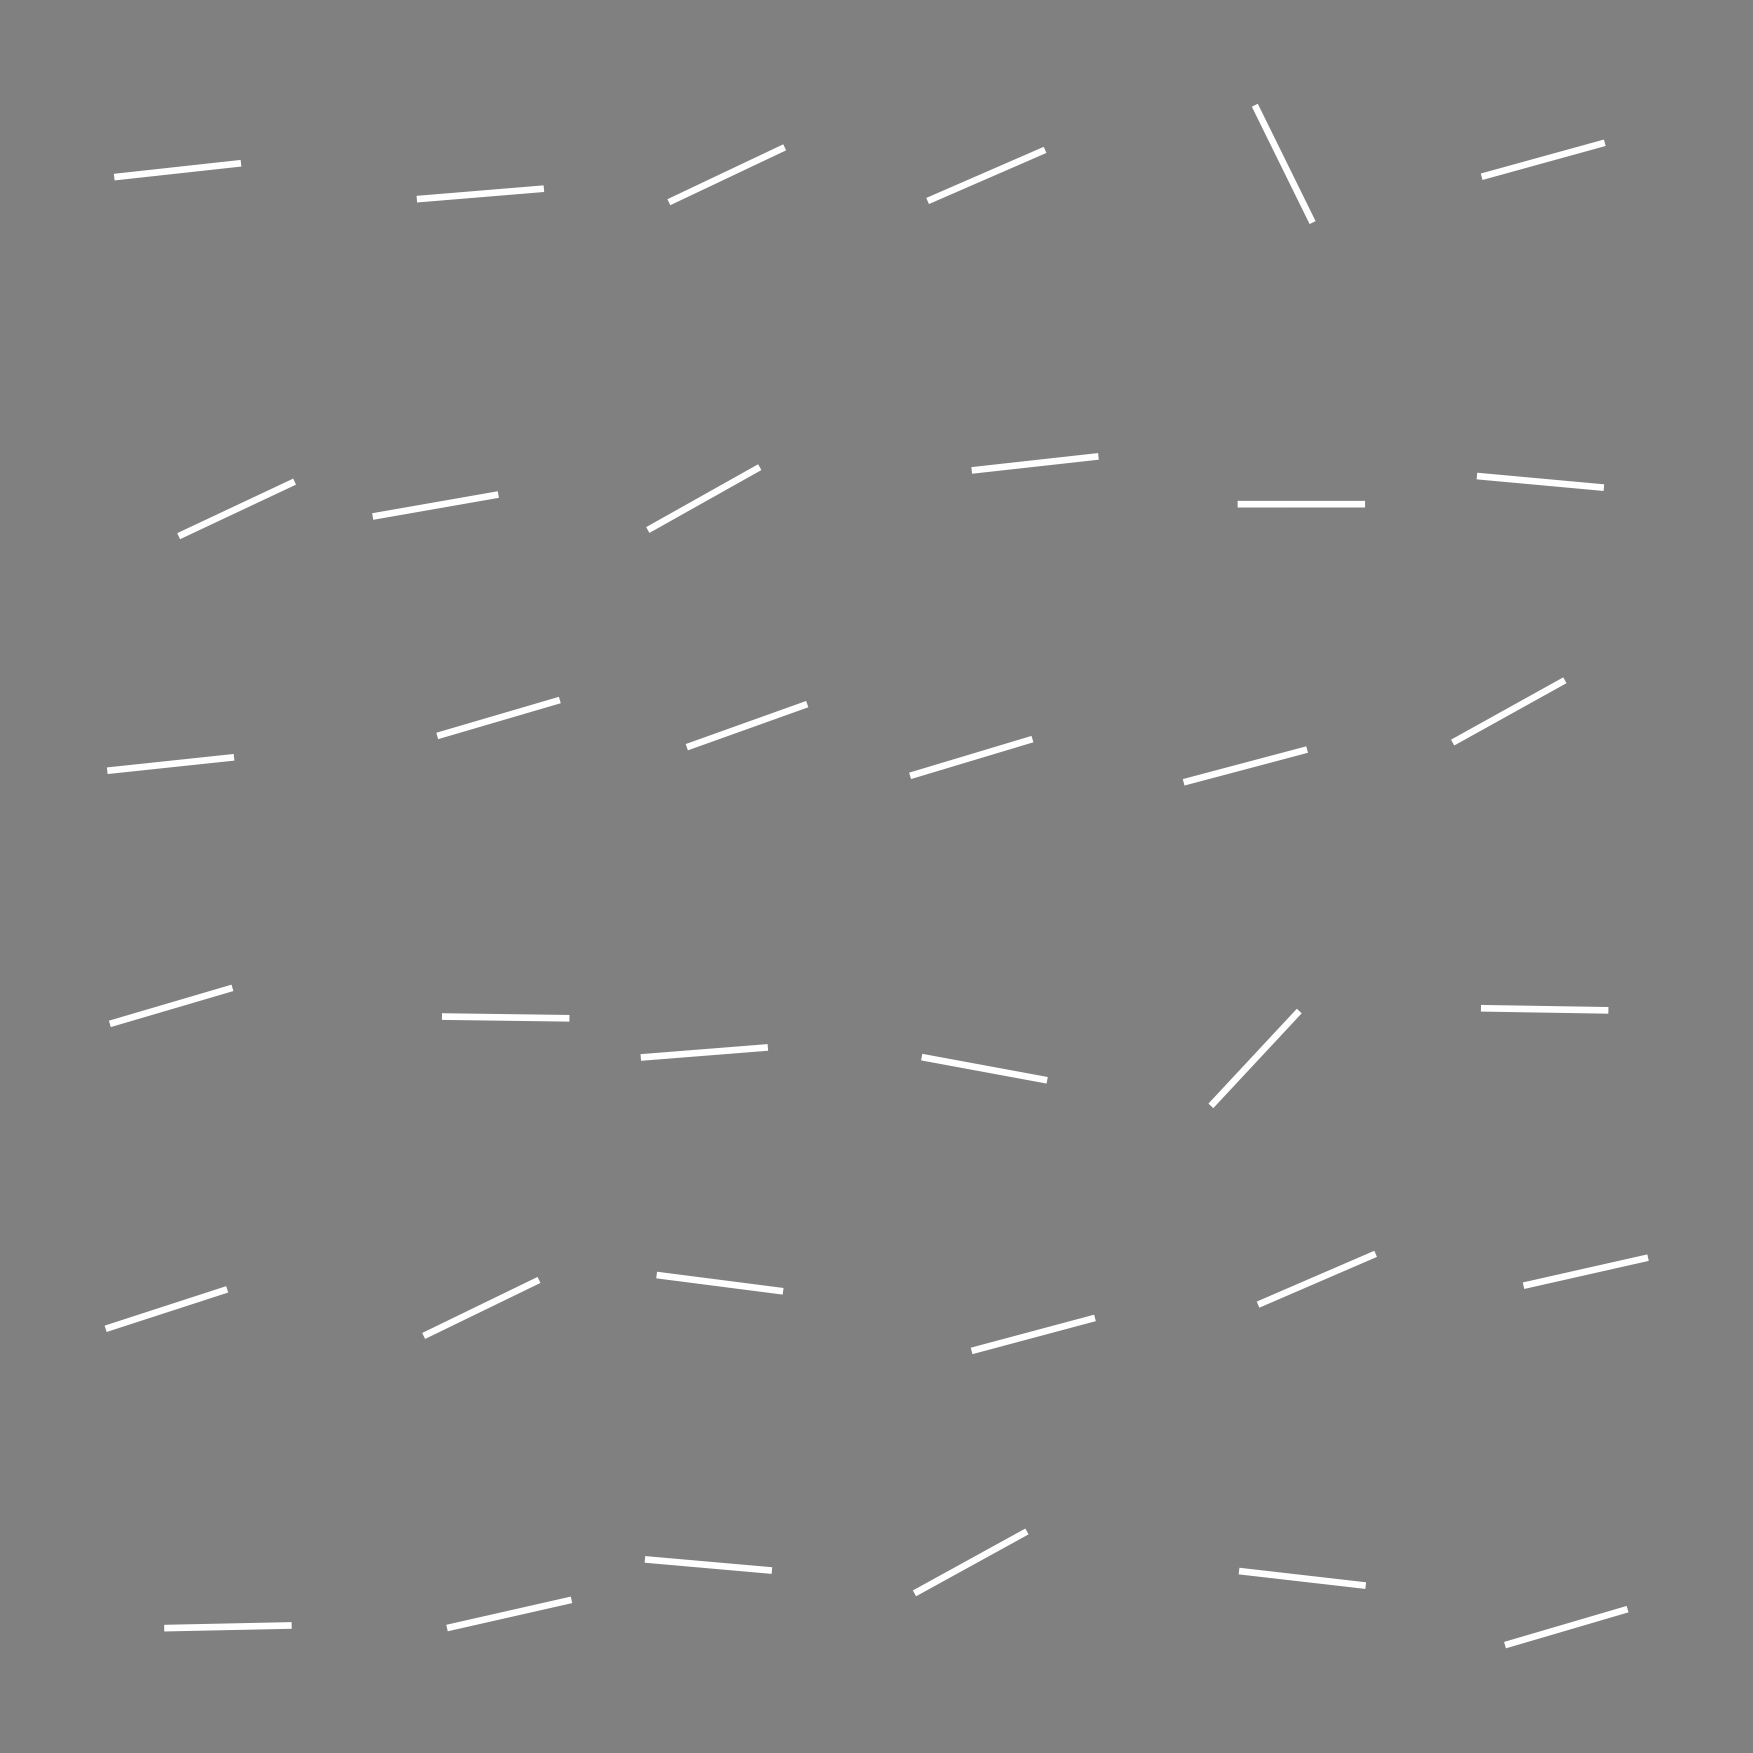

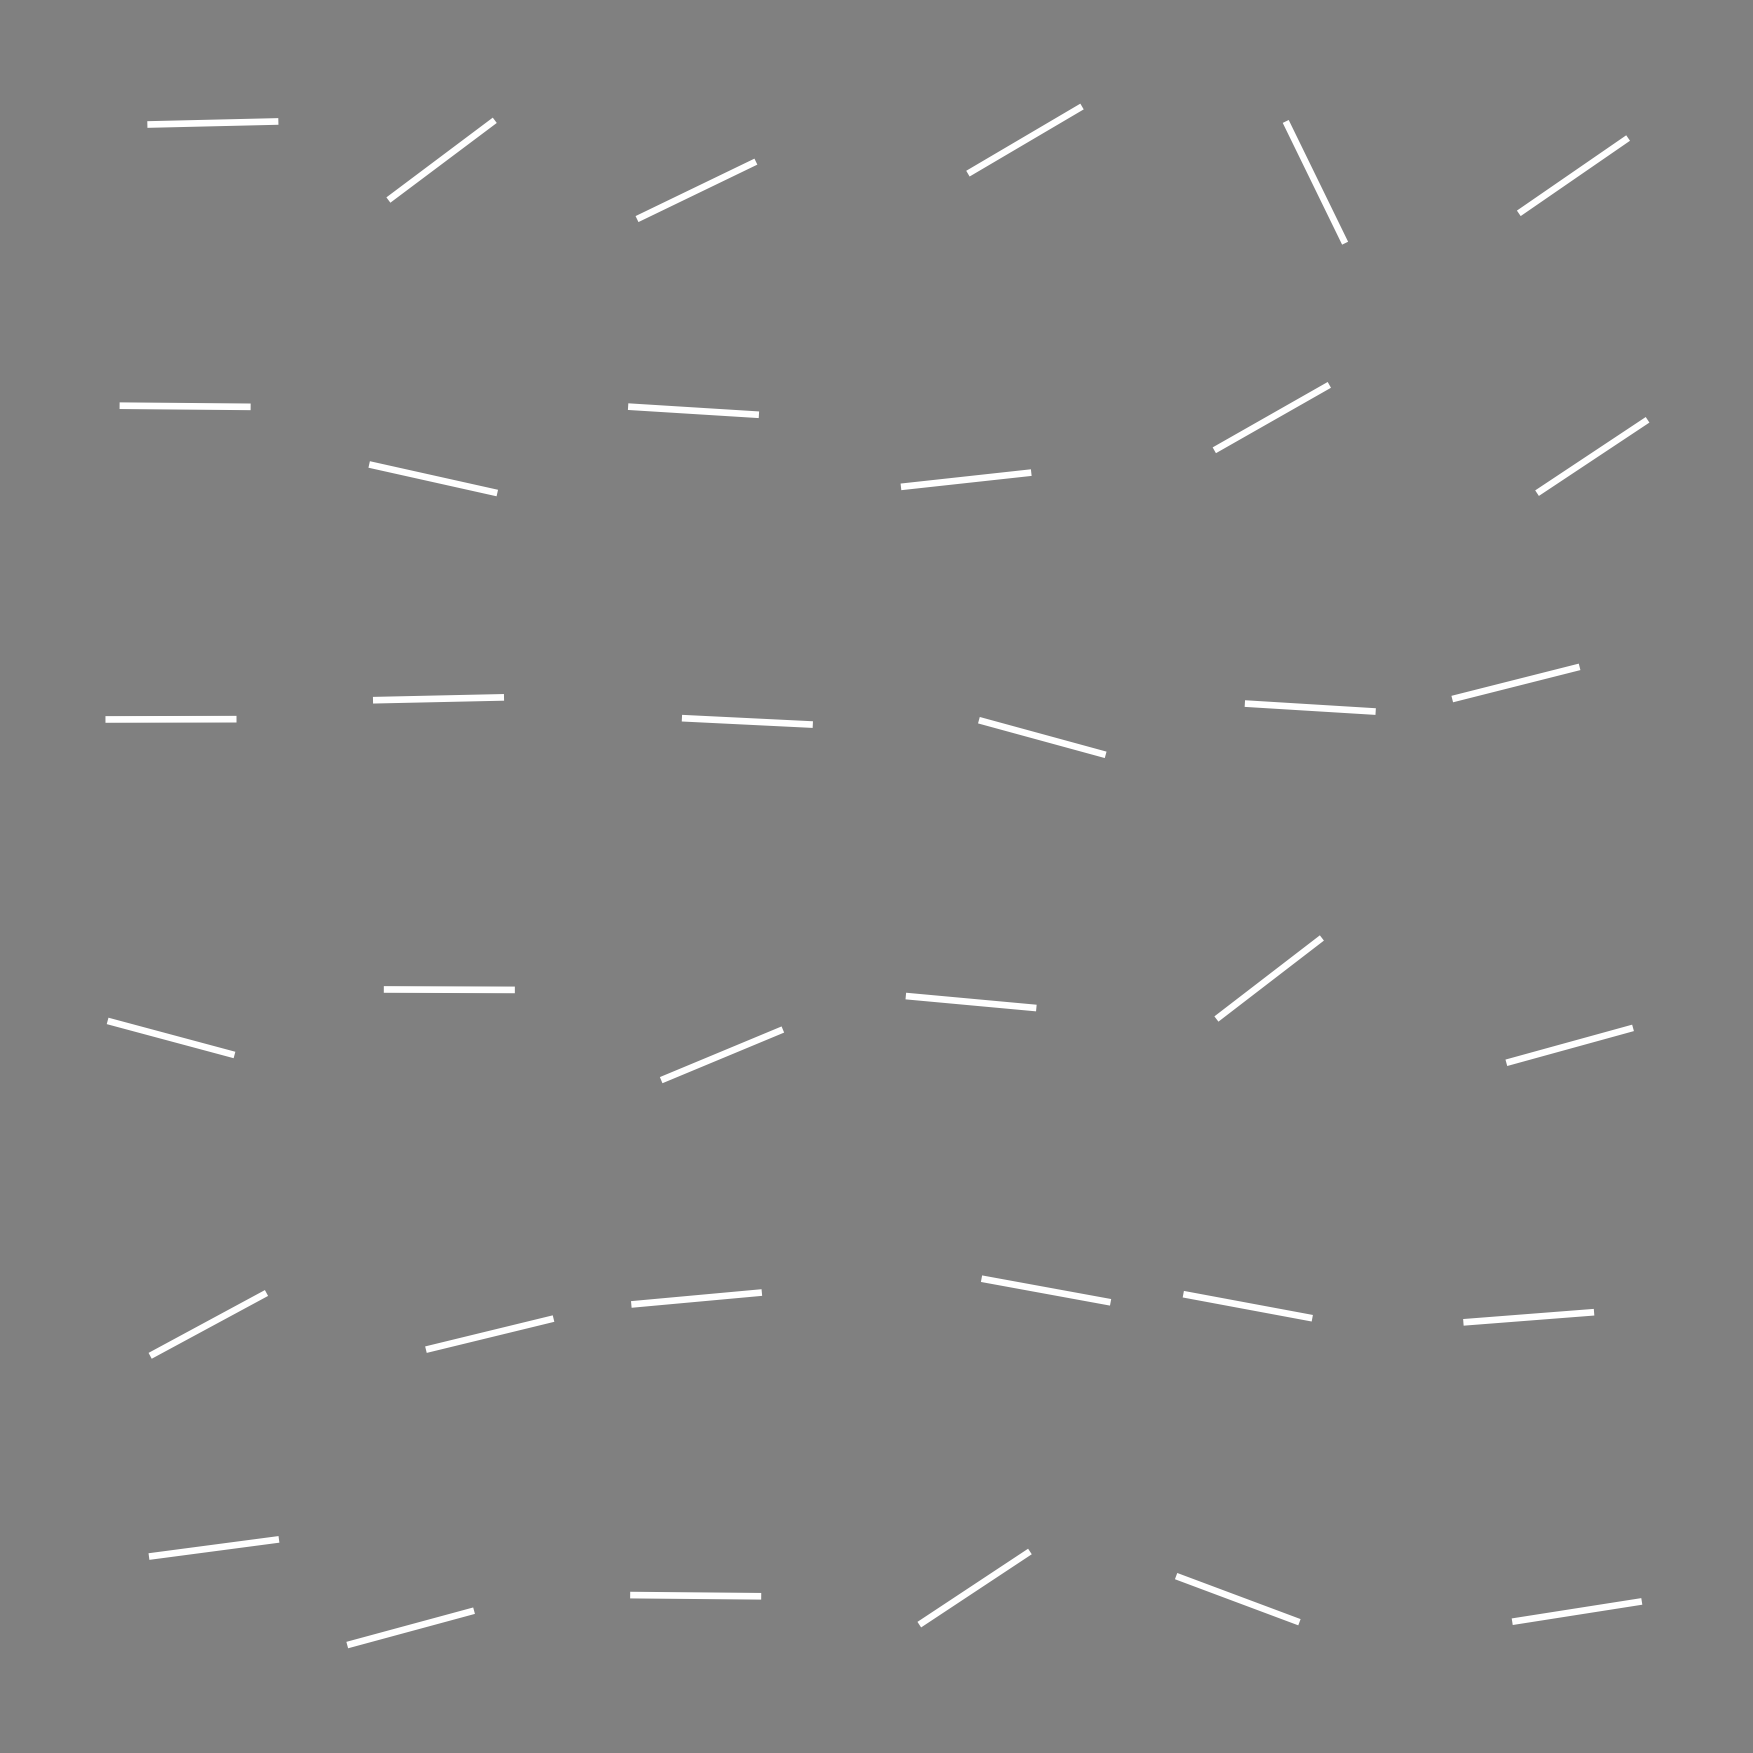

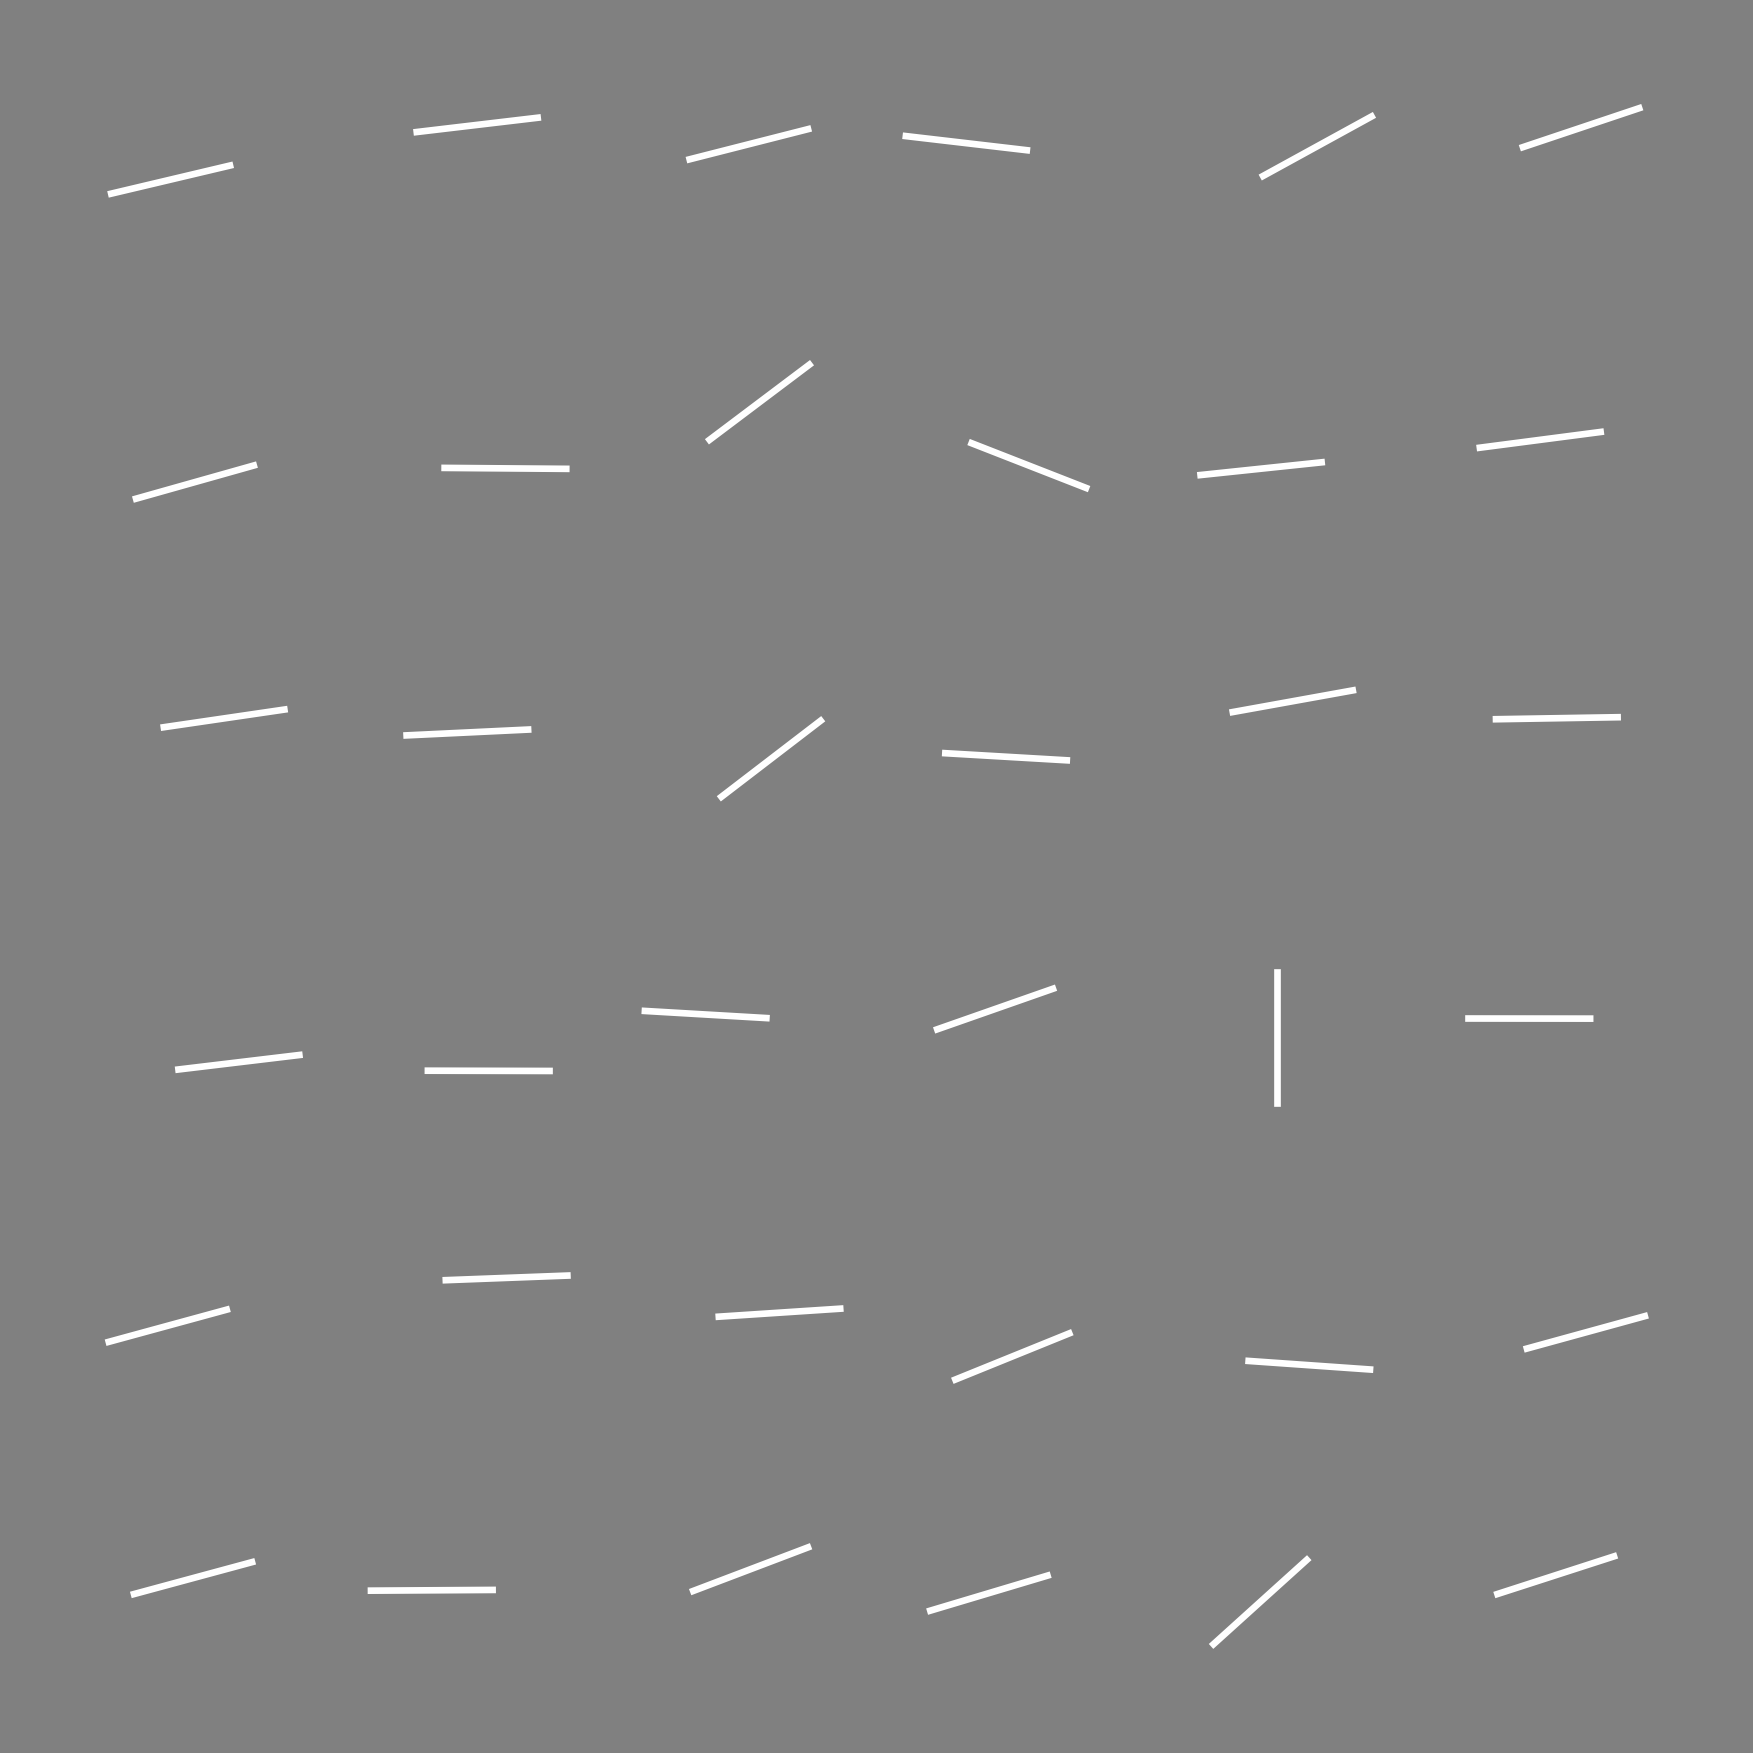

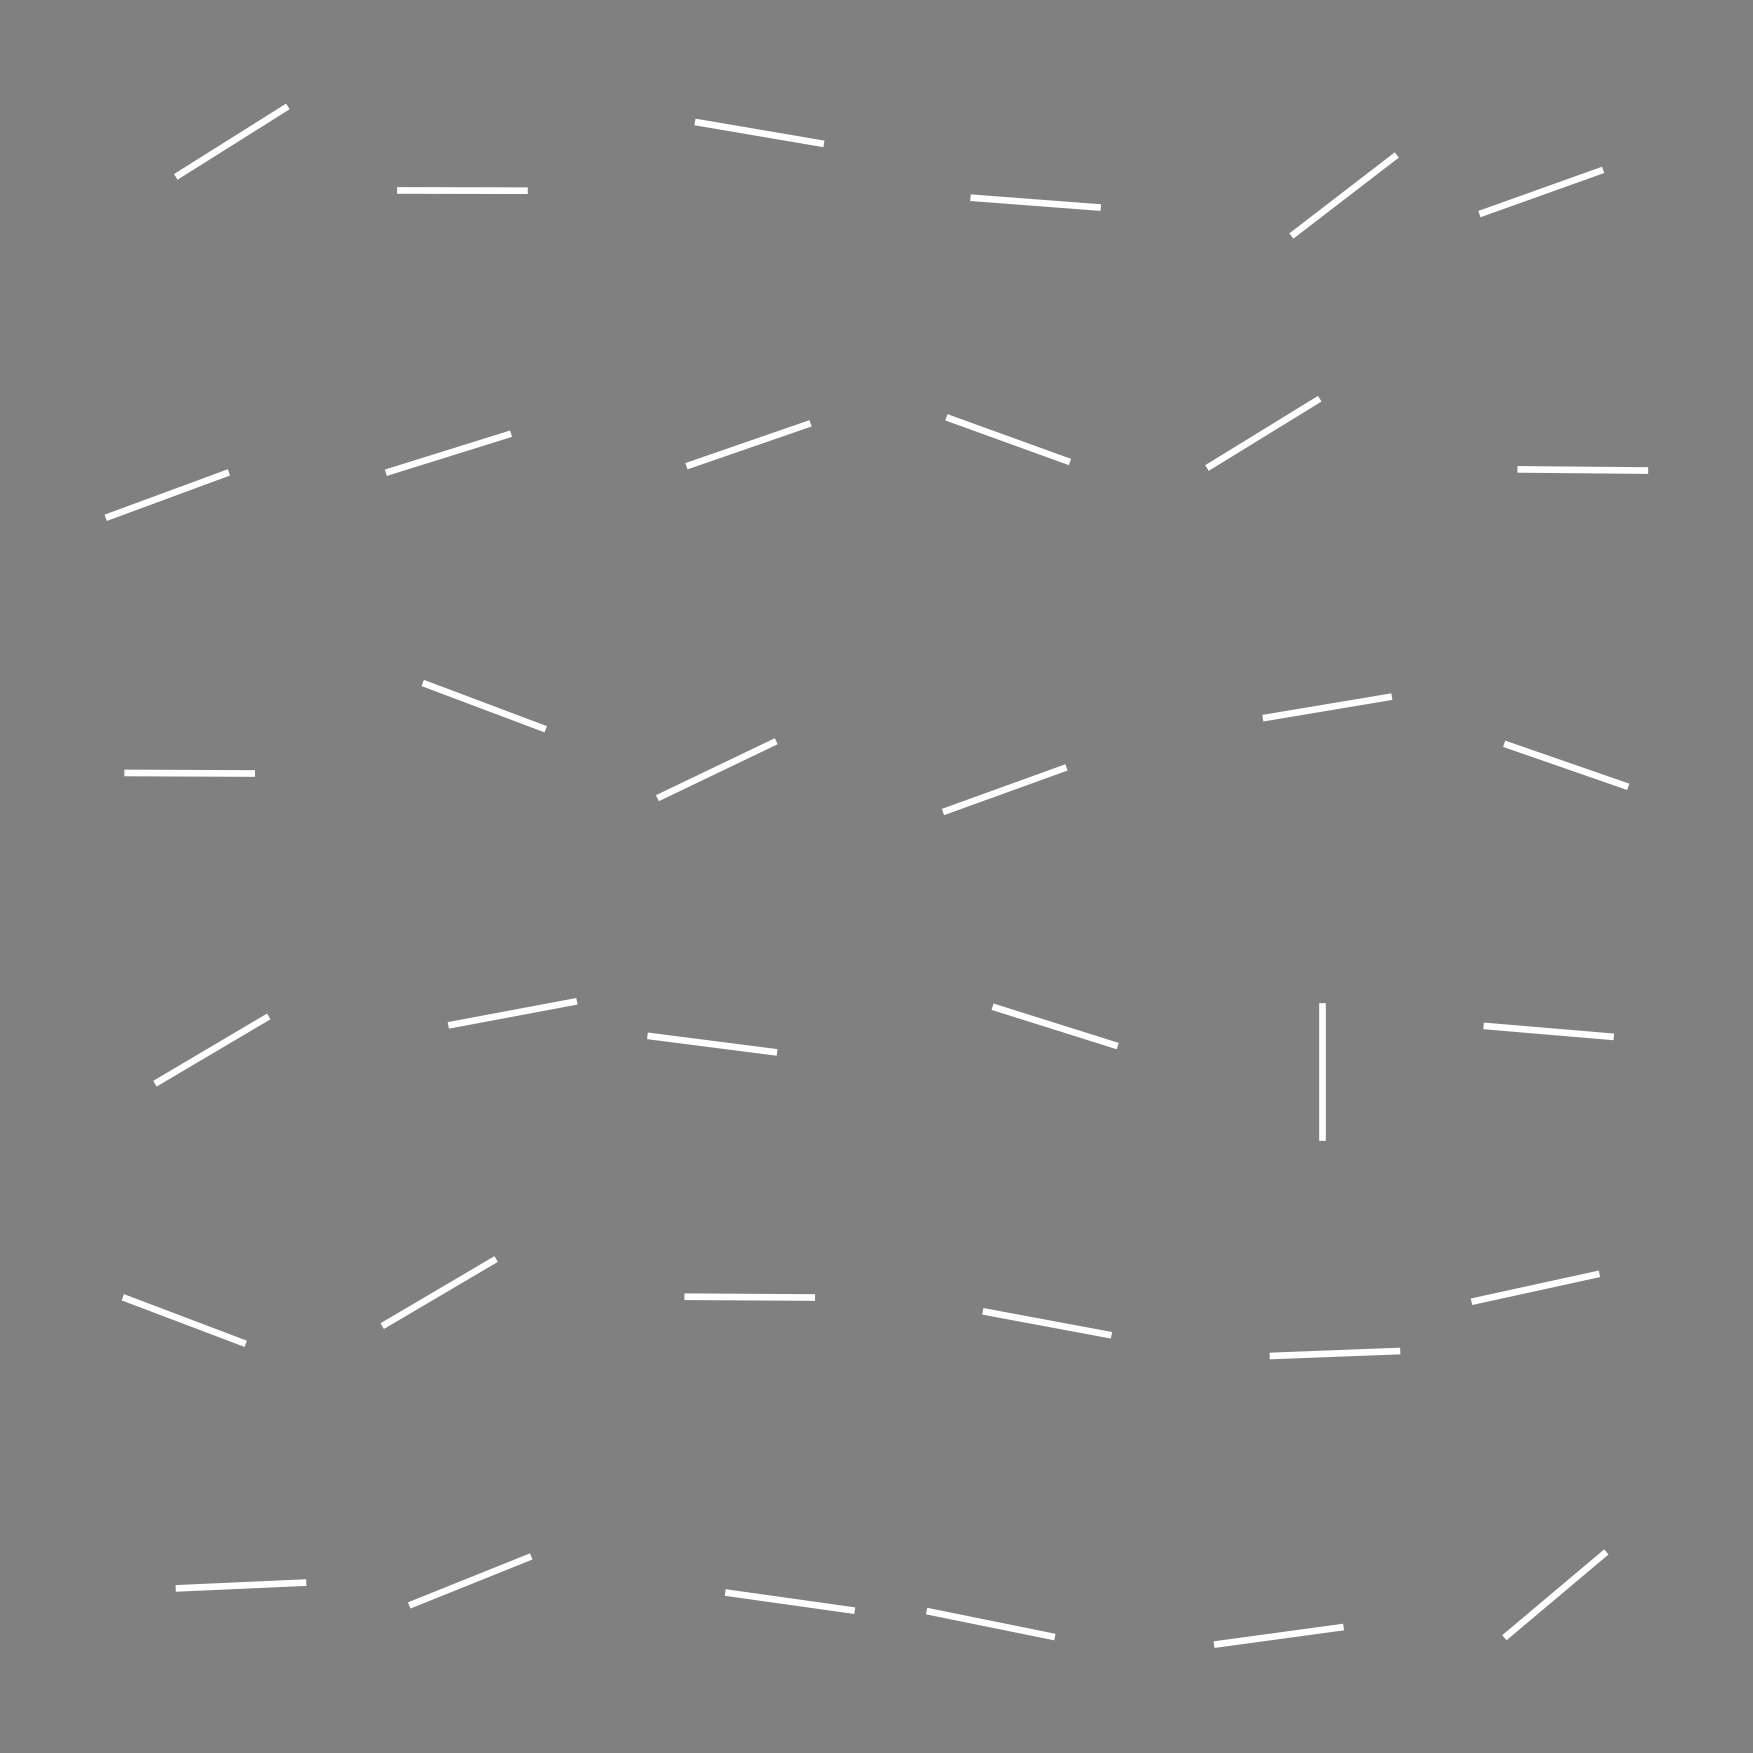

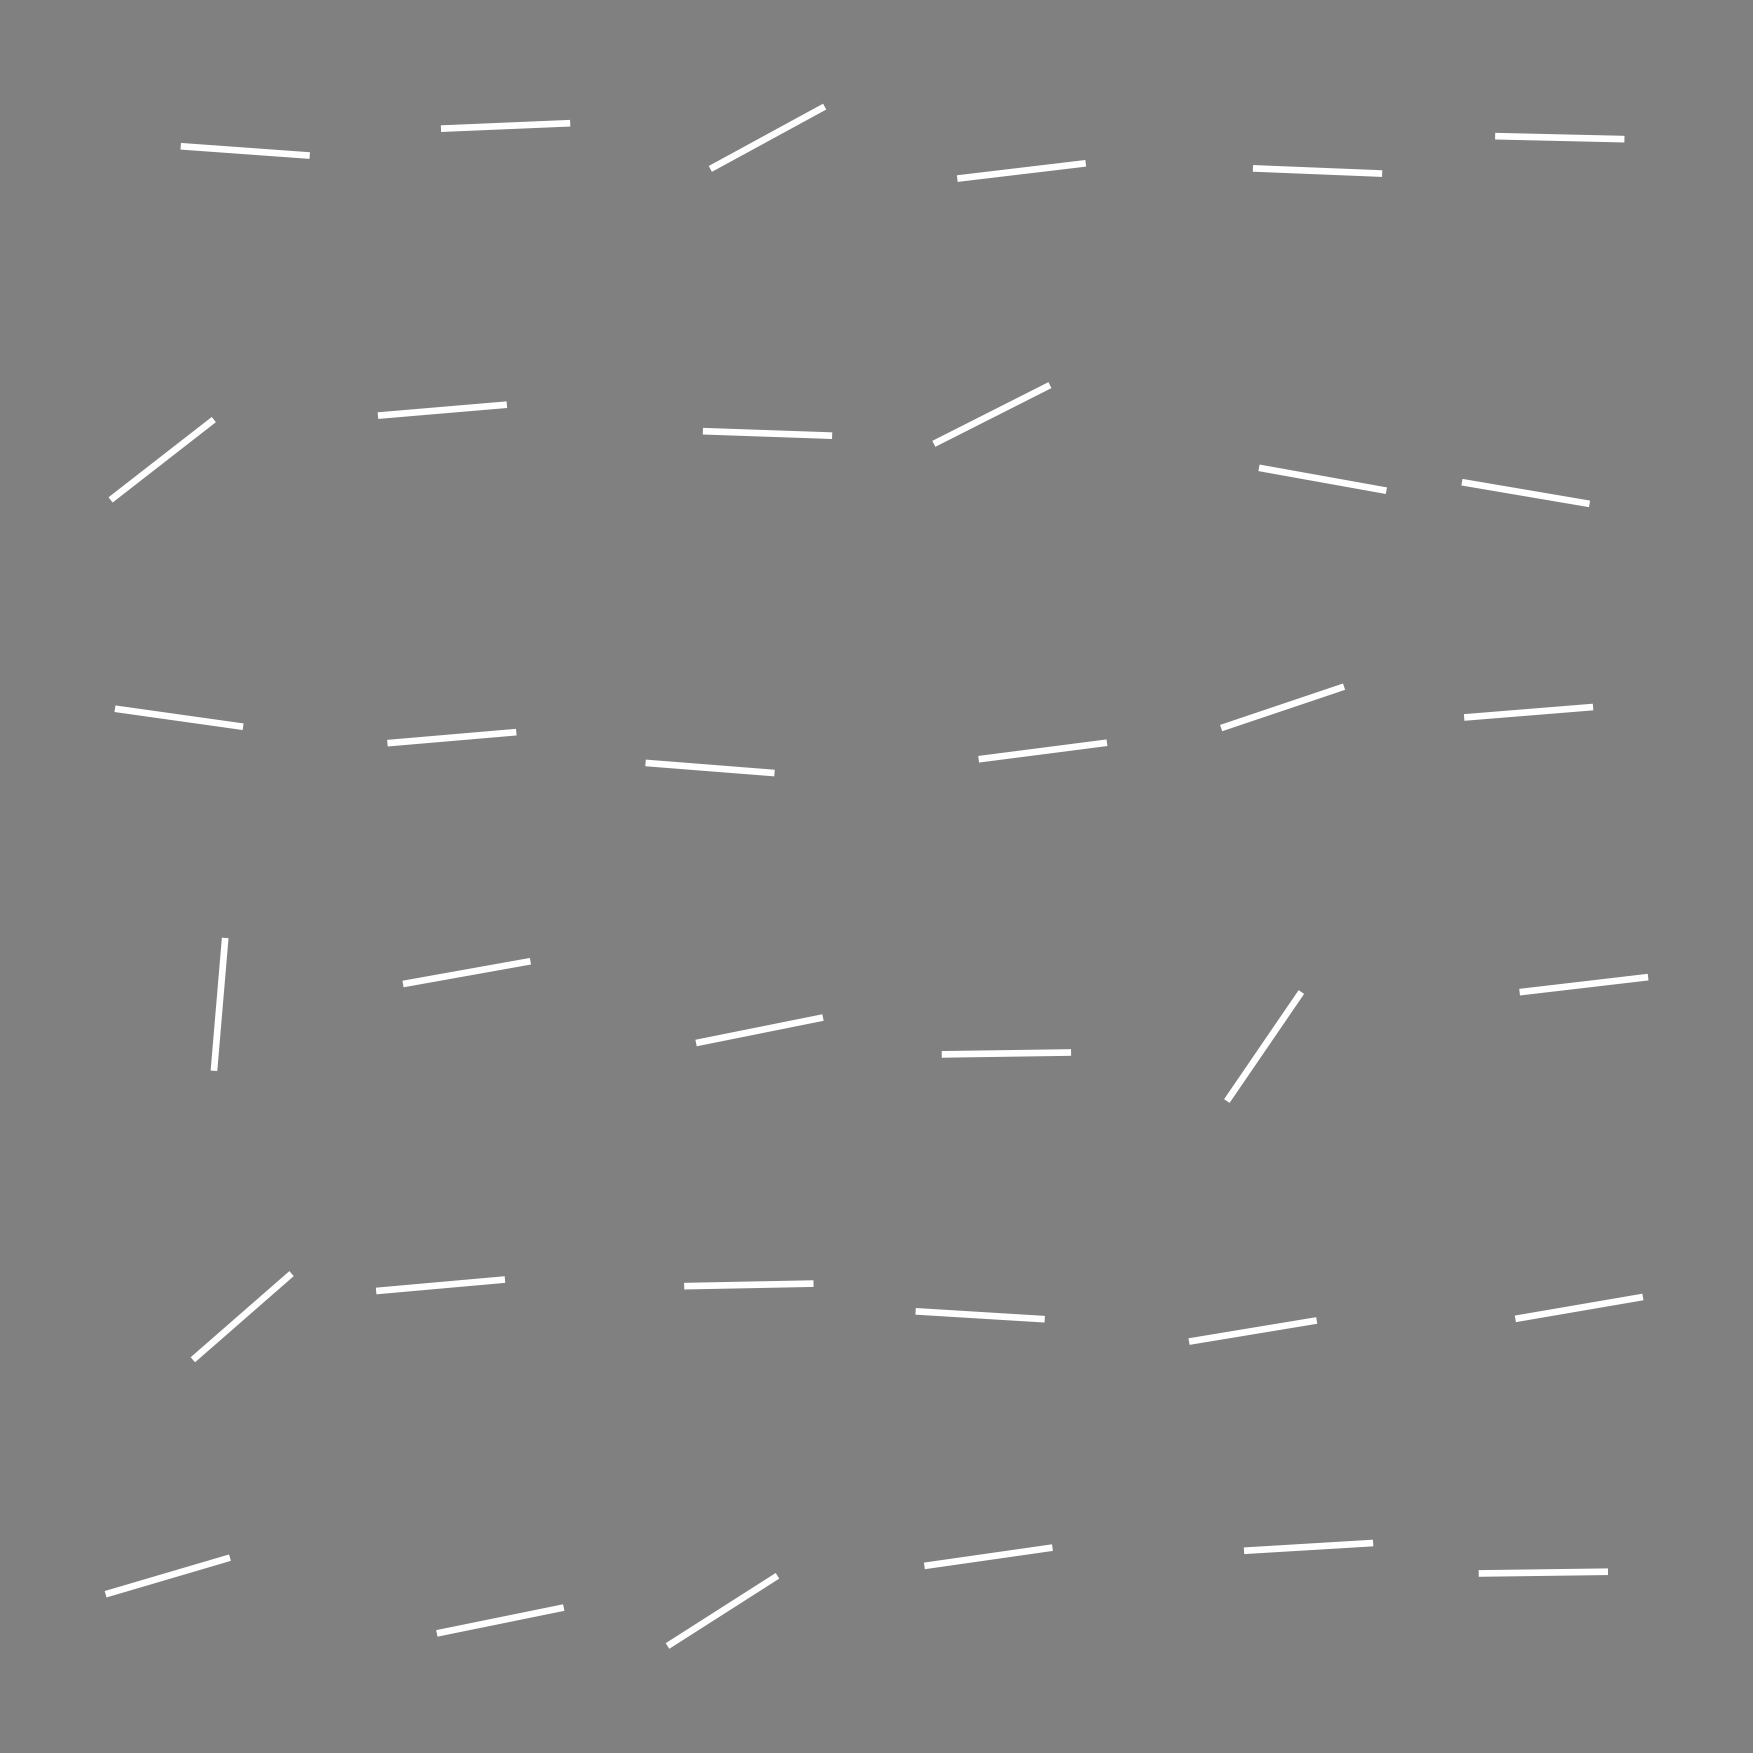

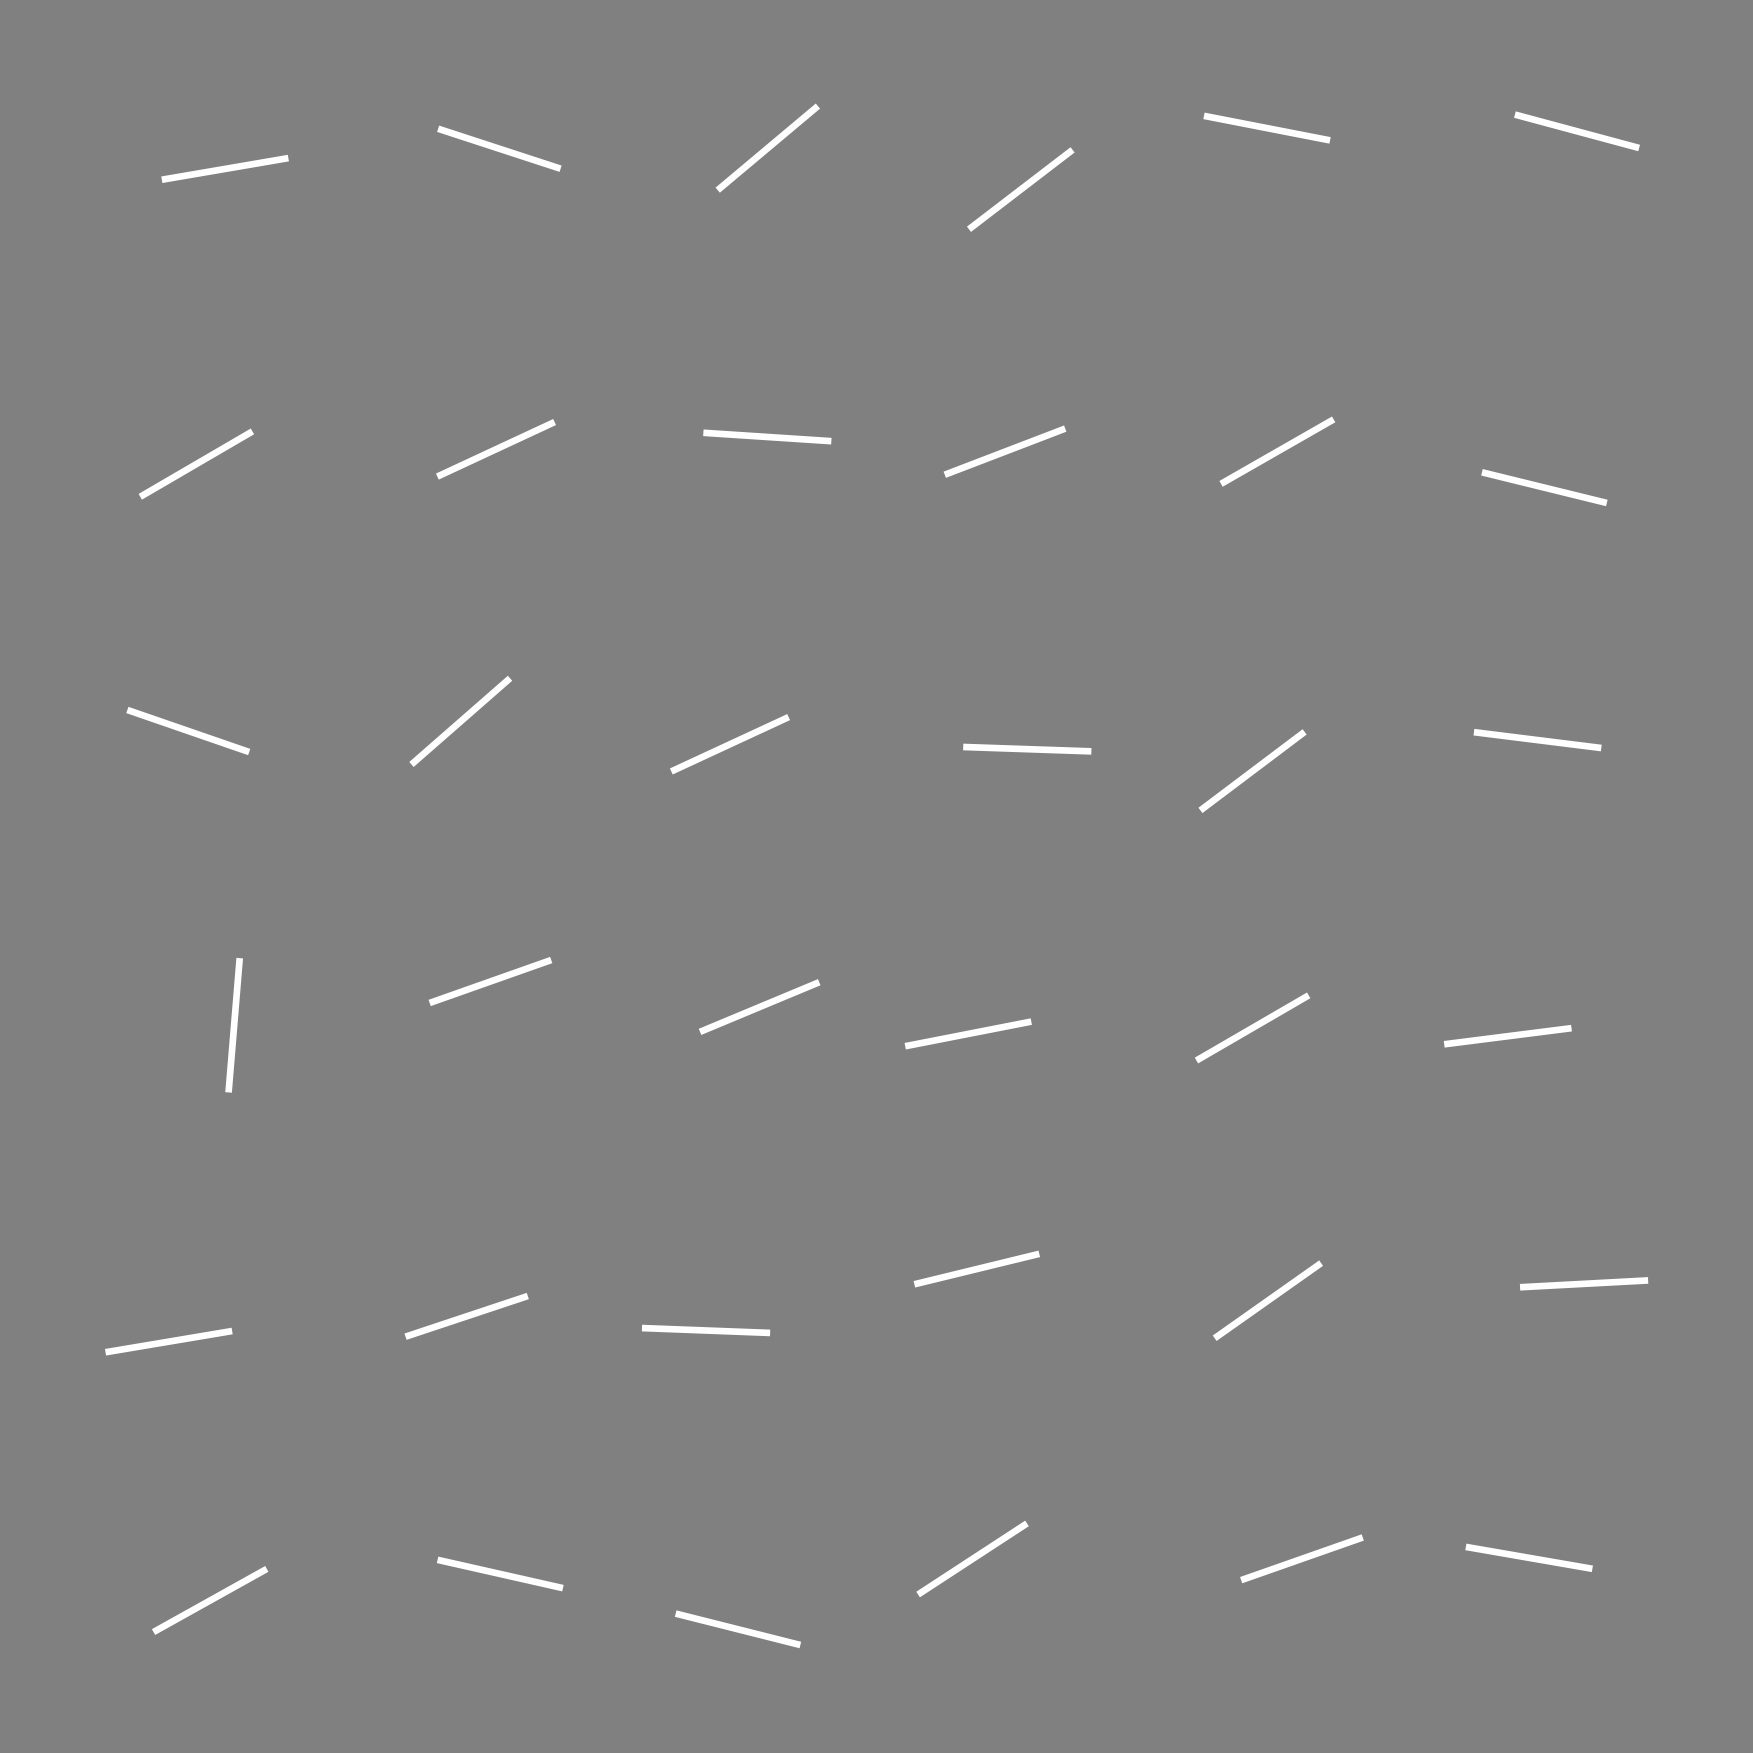

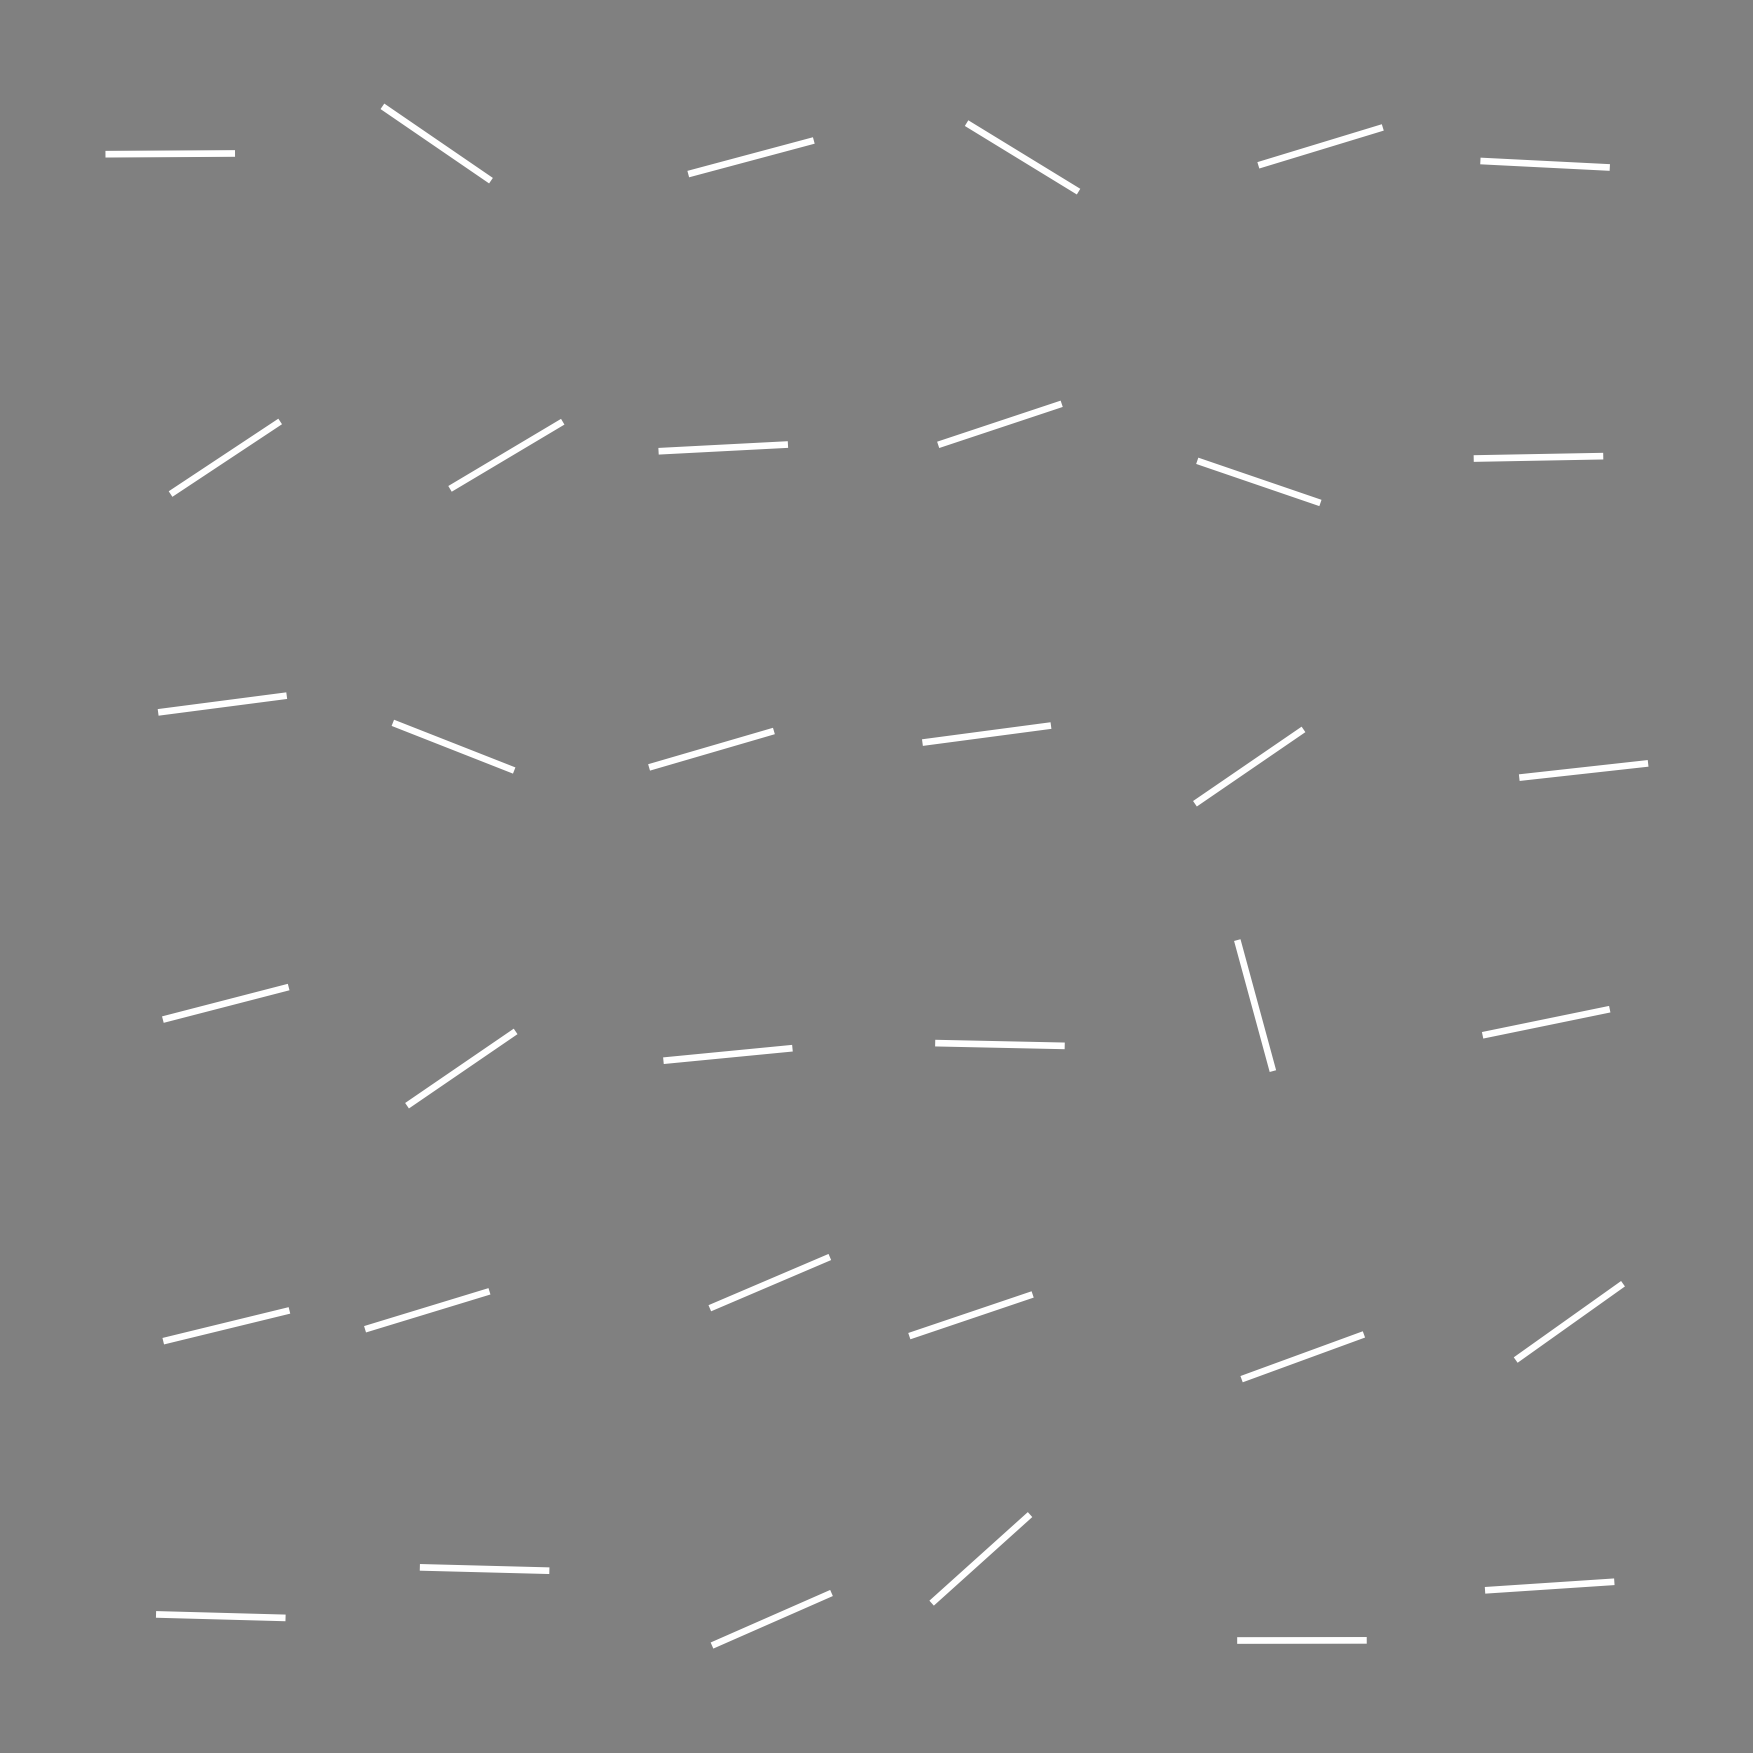

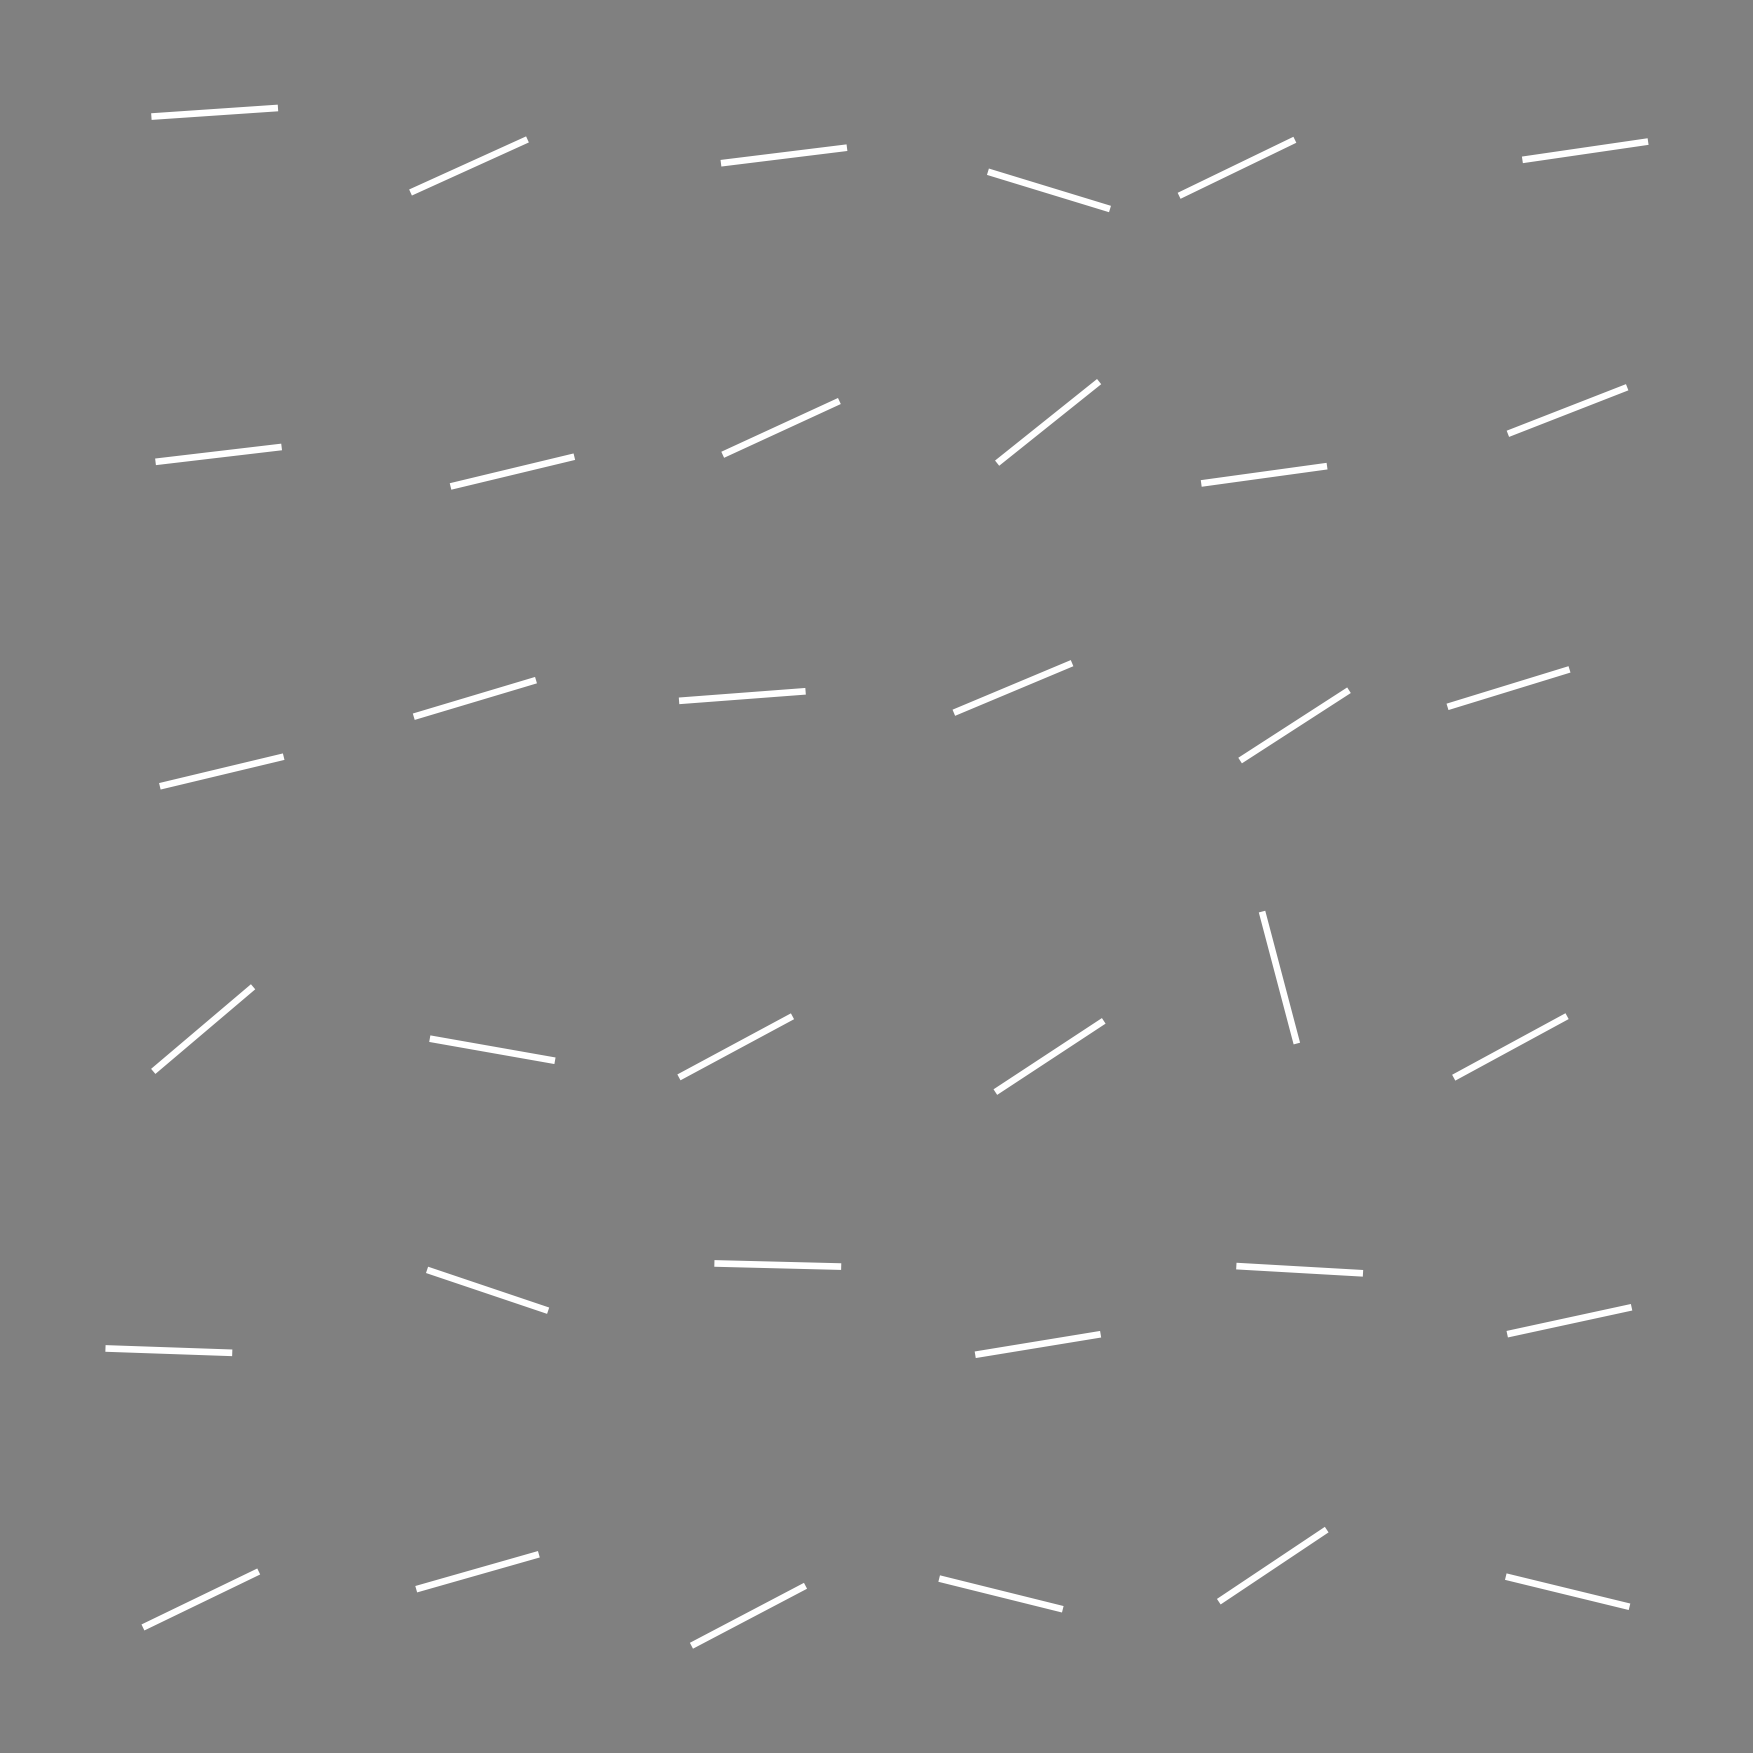

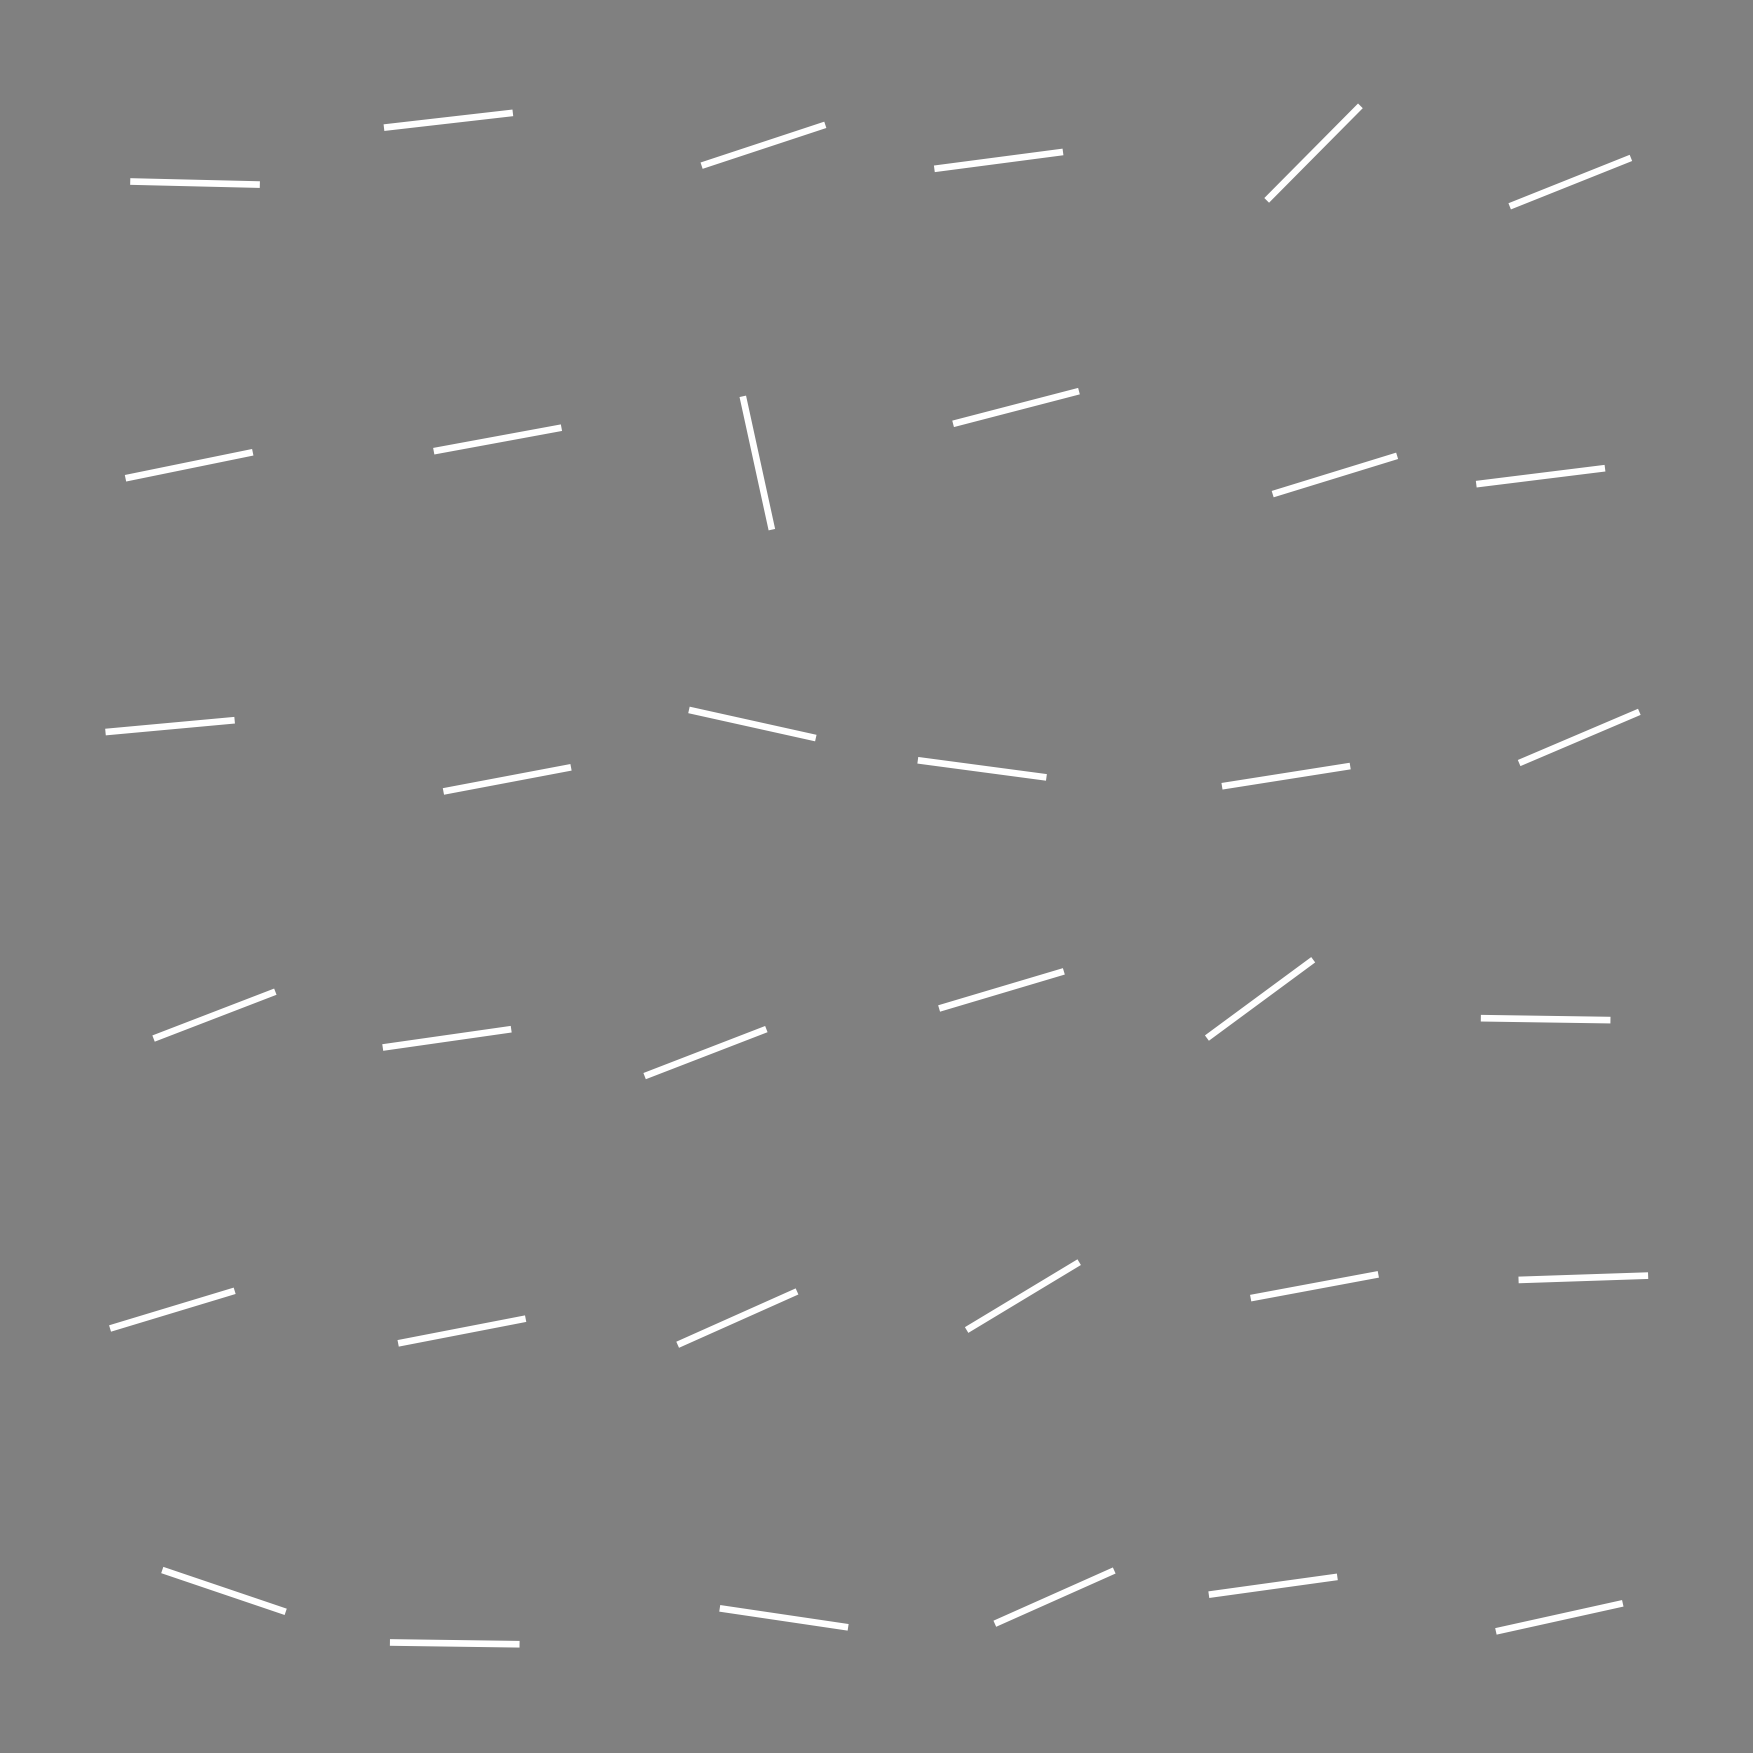

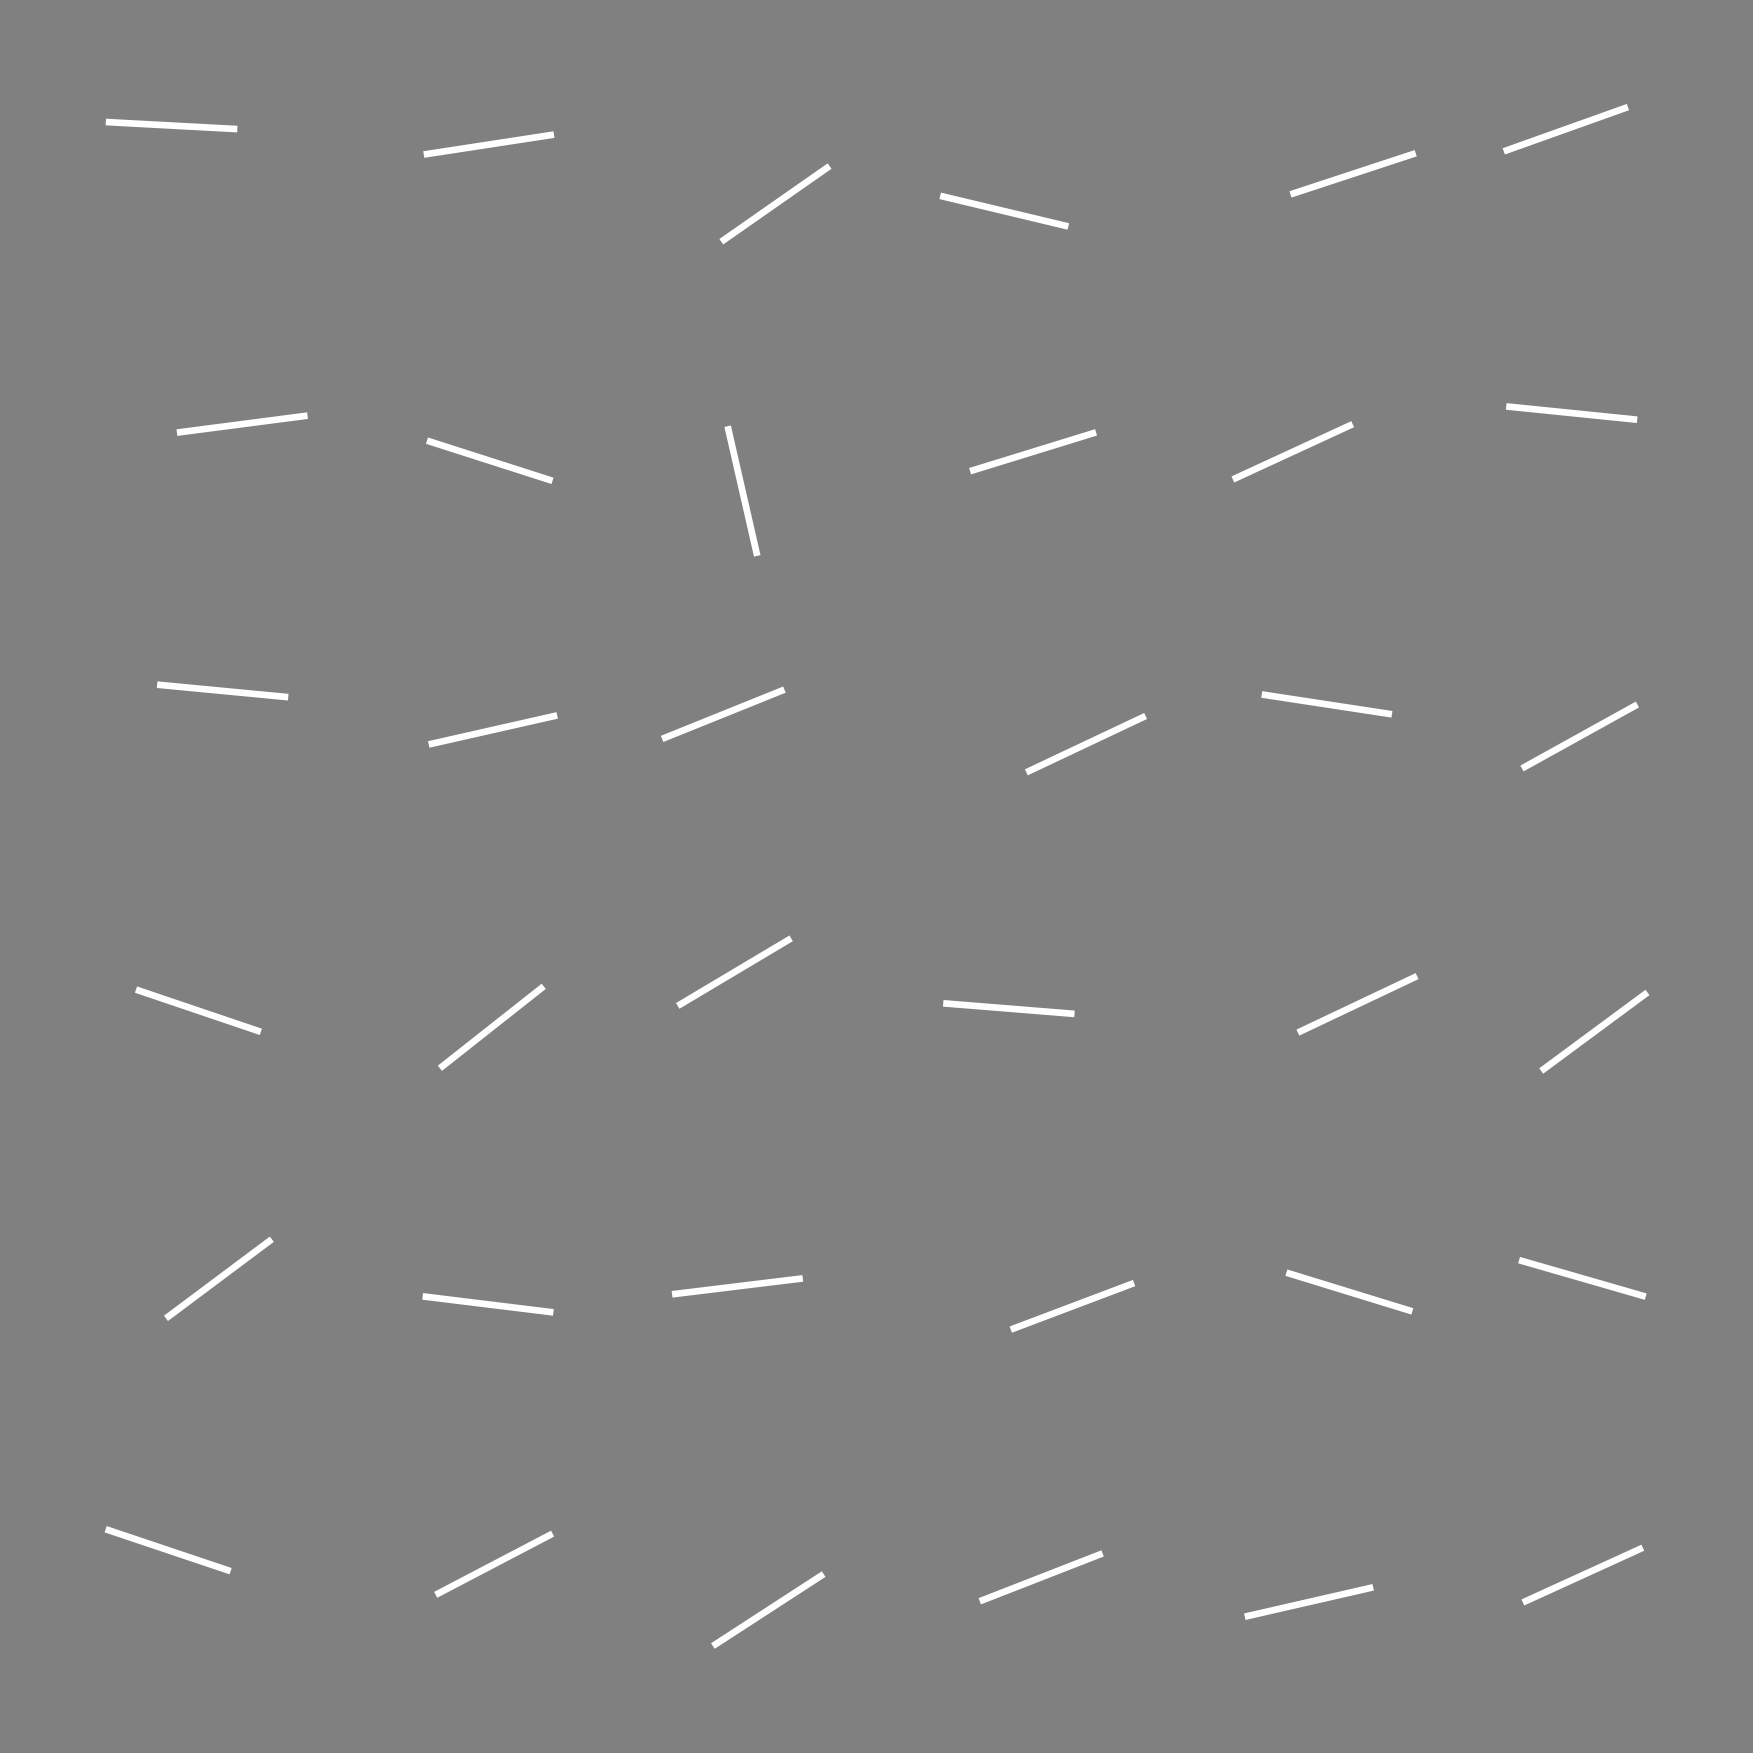

In [16]:
dMean = 10
for i in range(7):
    targetPos = random.randint(0,35)
    targetOri = dMean + random.randint(60,120)
    plot_ex_distr(dMean, 'norm', 15, targetPos, targetOri, 'ex_norm15_dmean_%i_%i.png' % (dMean,i))
    plot_ex_distr(dMean, 'uni', 15, targetPos, targetOri, 'ex_uni15_dmean_%i_%i.png' % (dMean,i))    

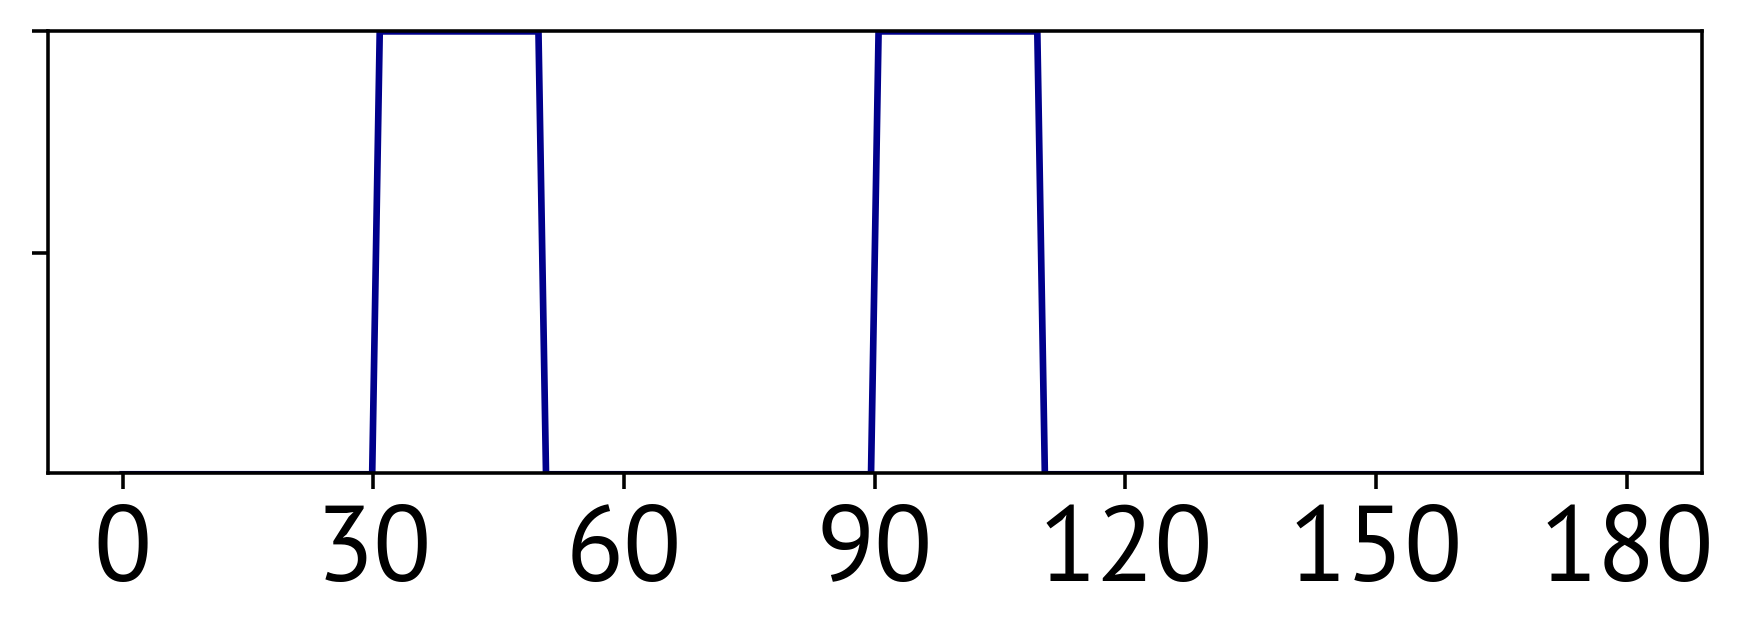

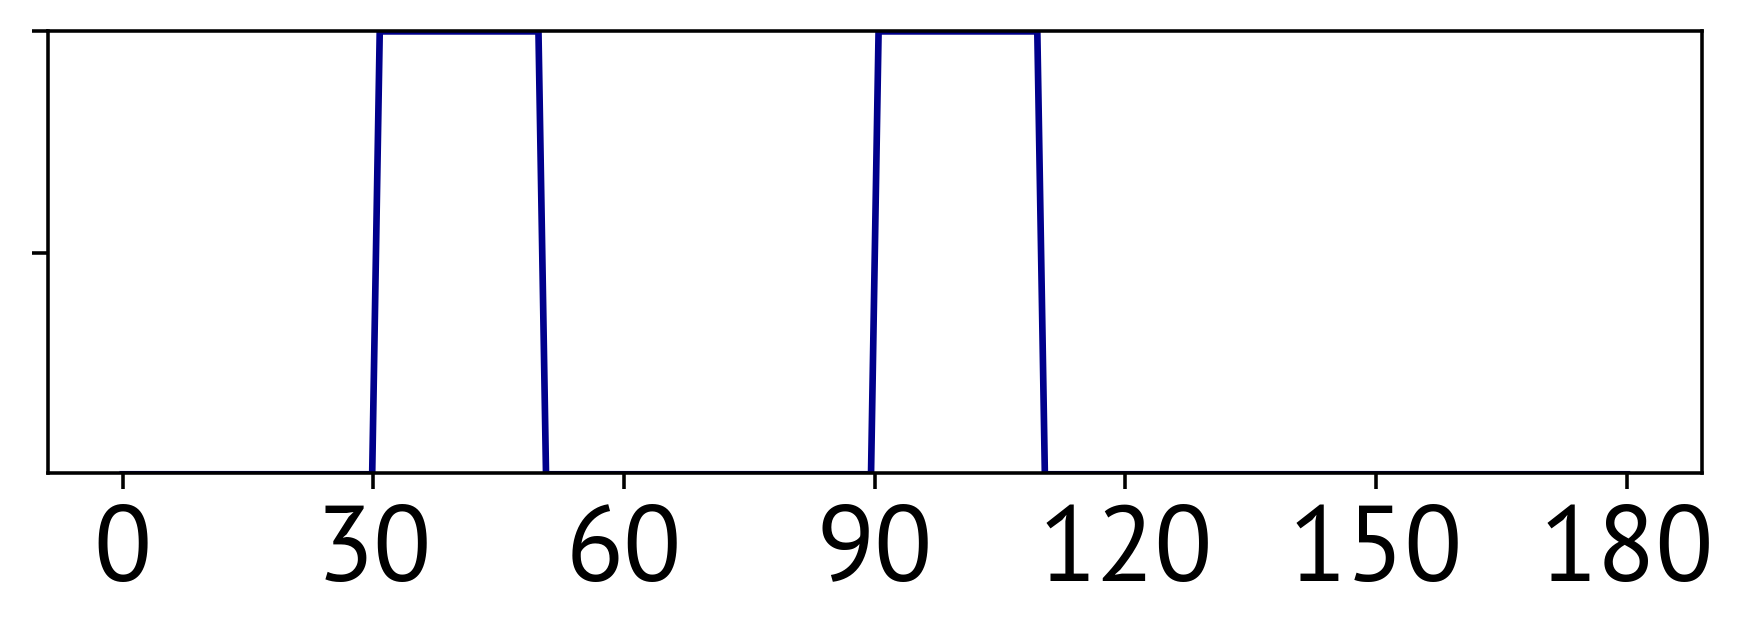

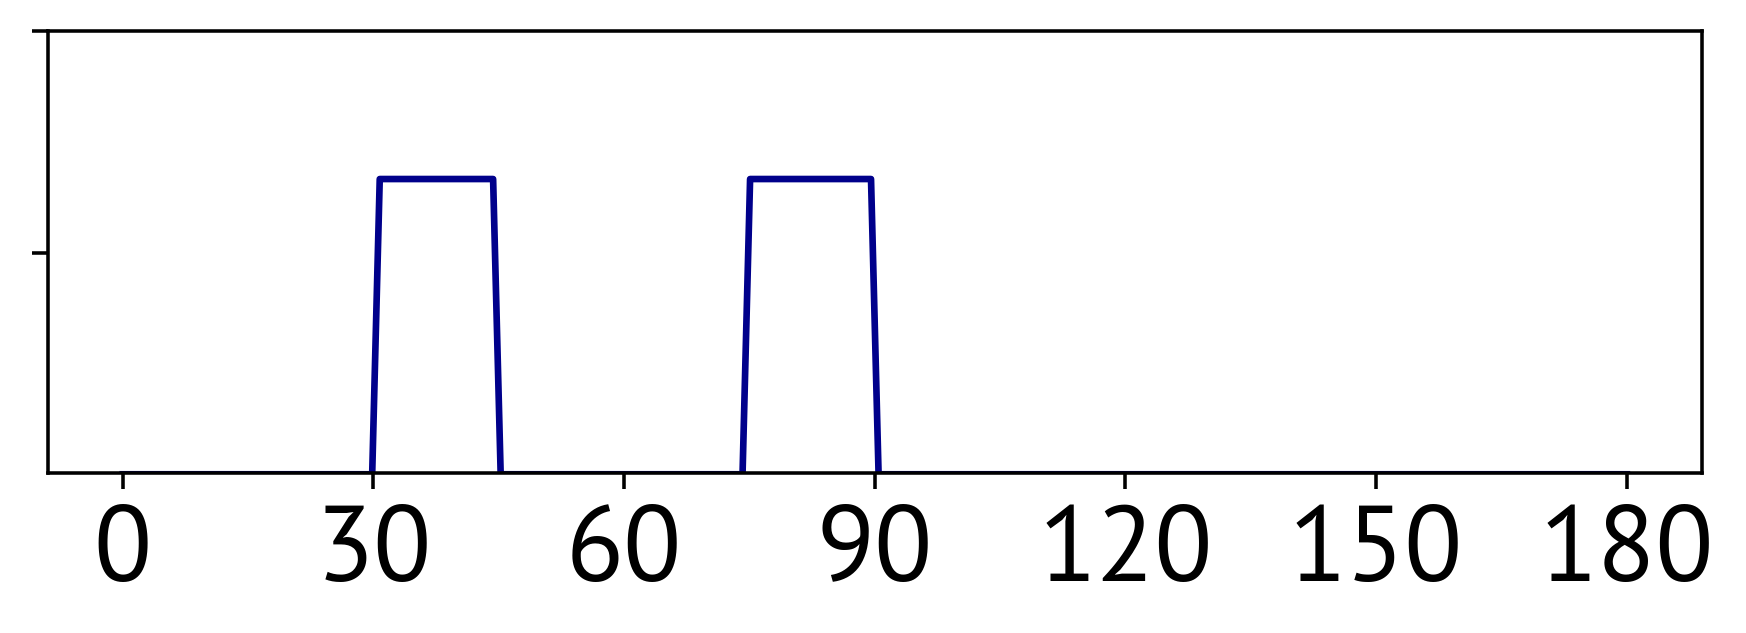

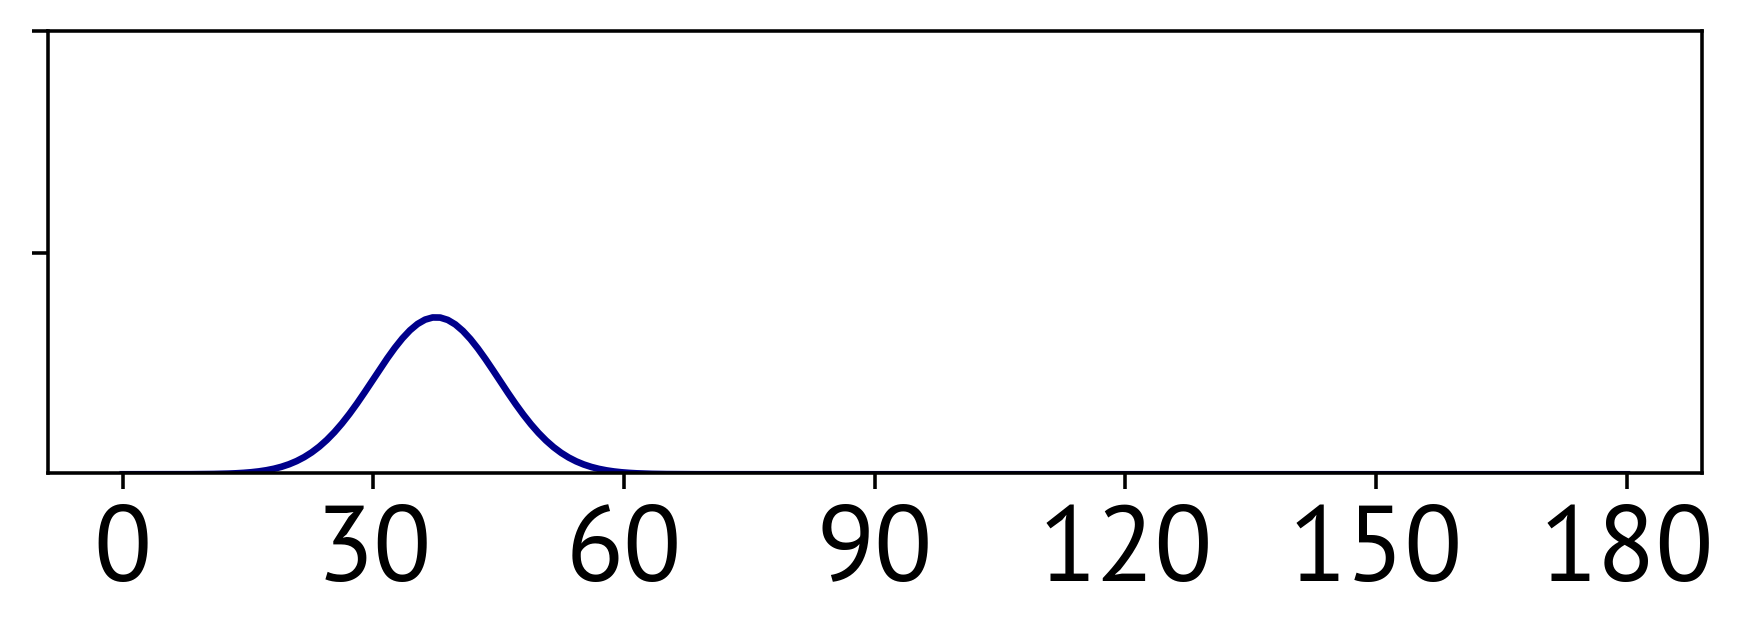

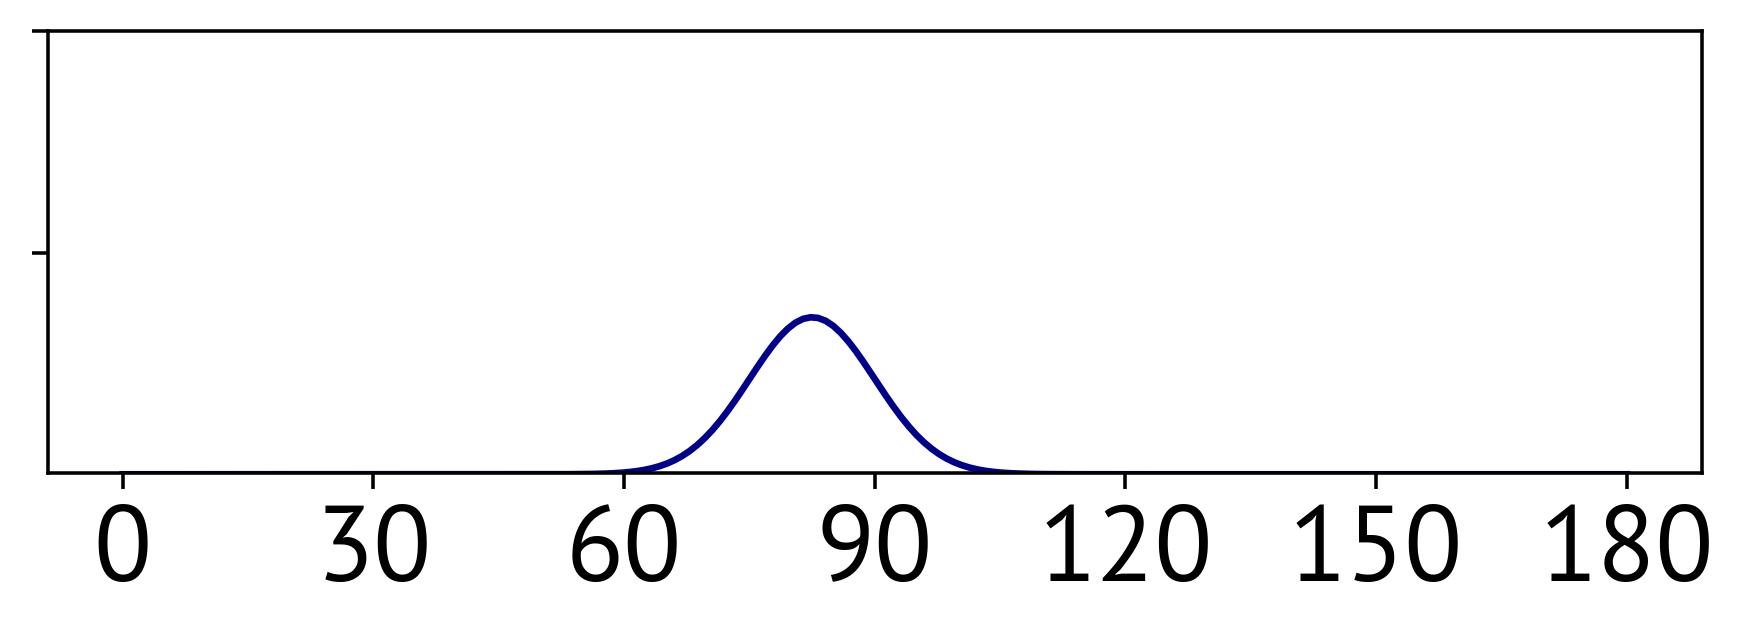

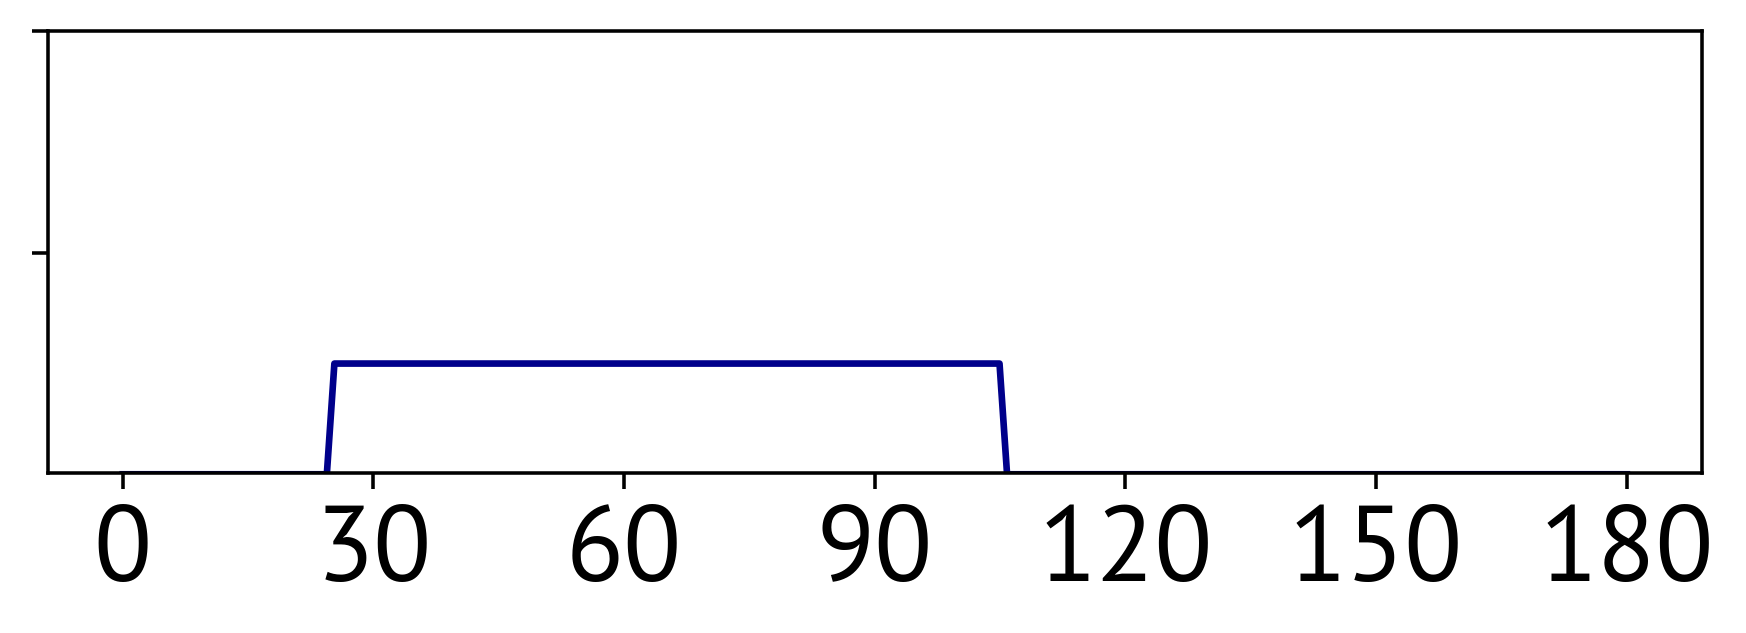

In [19]:
matplotlib.rcParams.update({'font.size': 24, 'font.family': 'PT Sans'})

for i in np.linspace(40, 90, 5):
    dMean=i
    #plot_distr(dMean, 'norm', 15,None, 'pdf_ls_%s.pdf' %i)

plot_distr(70, 'bimod', 20, None, 'pdf_ls_bimod_20.pdf',mod=1/2 )
plot_distr(70, 'bimod', 20, None, 'pdf_ls_bimod_20.png',mod=1/2 )

plot_distr(60, 'bimod', 15,None, 'pdf_ls_bimod.pdf' )
plot_distr(60-15*1.5, 'norm', 7.5,None, 'pdf_ls_norm1.pdf', mod=3)
plot_distr(60+15*1.5, 'norm', 7.5,None, 'pdf_ls_norm2.pdf', mod=3)

plot_distr(65, 'uni', 20,None, 'pdf_ls_uni.pdf' )


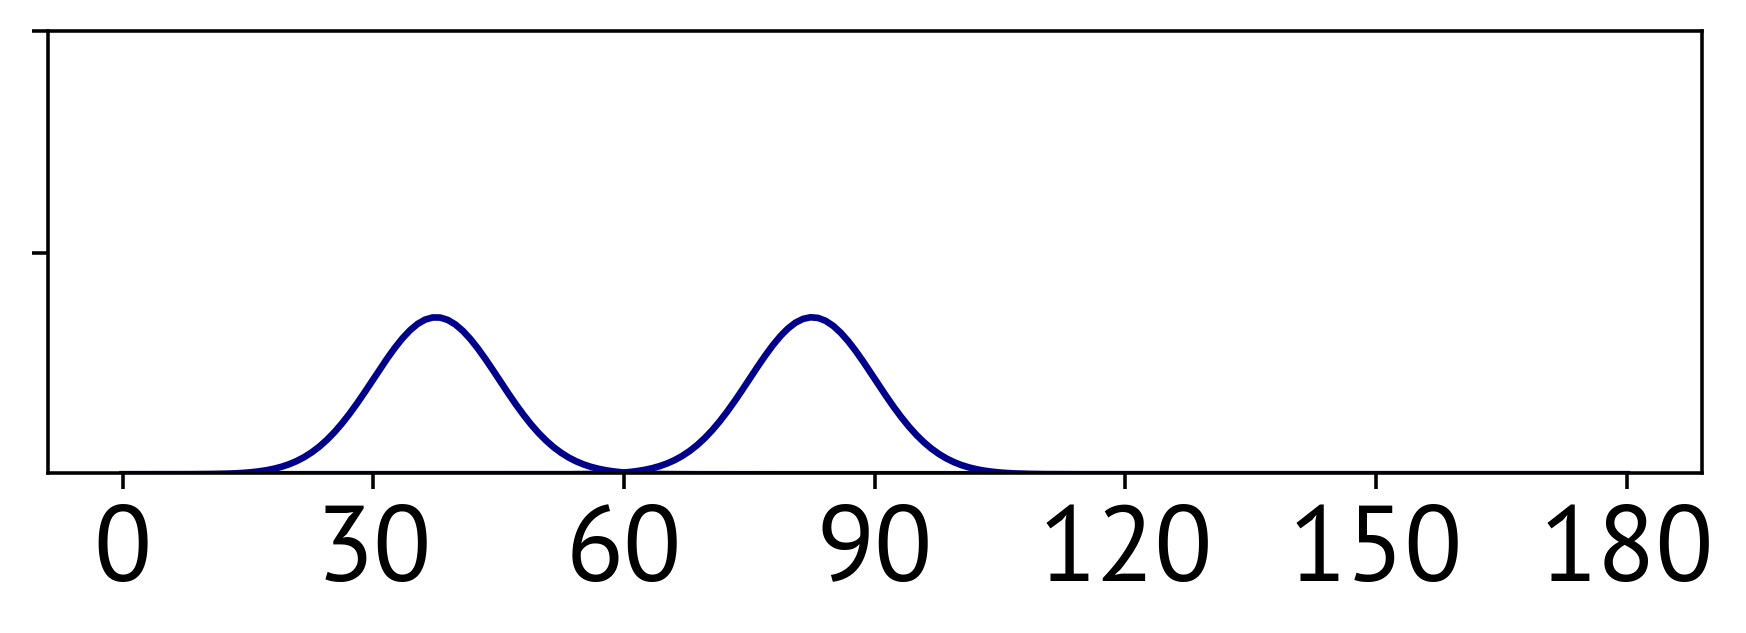

In [20]:
x = np.linspace(0,180,200)
fig = plt.figure(figsize=(6, 2.5), dpi=320)
ax = fig.add_subplot(111)
dtype = 'norm'
dsd = 7.5
for i in [60+15*1.5, 60-15*1.5]:
    dMean=i
    if dtype=='norm':
        ax.plot(x,stats.norm.pdf(x,dMean,dsd)/3,color='darkblue')
    elif dtype=='truncnorm':
        ax.plot(x,truncnorm.pdf(x,loc=dMean,scale=dsd, a=-2, b=2))
    elif dtype=='uni':
        ax.plot(x,uniform.pdf(x,loc=dMean-2*dsd,scale=4*dsd),color='darkblue')
    elif dtype=='bimod':
        #print(vmybimod_dens(x, dMean, dsd))
        ax.plot(x,vmybimod_dens(x,dMean, dsd),color='darkblue')
        #ax.plot(x,uniform.pdf(x,loc=dMean+dsd,scale=dsd)/2,color='darkblue')
    elif dtype=='tri_left':
        ax.plot(x,triang.pdf(x,loc=dMean-30.0, scale=60, c=55/60),color='darkblue')
    elif dtype=='tri_right':
        ax.plot(x,triang.pdf(x,loc=dMean-30.0, scale=60, c=5/60),color='darkblue')

frame = plt.gca()
ax.set_ylim([0.0001,0.05])

frame.axes.get_yaxis().set_ticklabels([])
plt.xticks(np.arange(min(x), max(x)+1, 30.0))
plt.tight_layout()
plt.savefig('example_112.pdf', bbox_inches='tight', pad_inches = 0, facecolor=fig.get_facecolor(), transparent=False, edgecolor='white')



In [21]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import matplotlib as mpl
from math import sqrt
from itertools import product
from scipy.stats import uniform, triang, truncnorm 
mpl.rcParams.update({'font.size': 28, 'font.family': 'PT Sans'})
import matplotlib.mlab as mlab

for i in ['truncnorm','uni','bimod','tri_left','tri_right']:
    targetPos = random.randint(0,35)
    #plot_ex_distr(dMean, i, 15, targetPos, targetOri, 'ex_%s.pdf' %i)
    #plot_distr(dMean, i, 15,targetOri, 'ex_pdf_%s.pdf' %i)

fig = plt.figure(figsize=(8.5/4*3*4, 8.5), dpi=320, facecolor='1')
gs = mpl.gridspec.GridSpec(2, 4, height_ratios=[3, 1]) 
for i in [['uni', 15, 0,'A'],['truncnorm',15, 1,'B'],['bimod',15,2,'C'],['tri_left',15,3,'D']]:
    dmean = 75
    
    #dmean=np.random.uniform(14,35)
    print(dmean)
    target = dmean+np.random.uniform(60,100)
    if target>=180:
        target = target - 180
    elif target<=0:
        target = target + 180
    ax = plt.subplot(gs[0,i[2]], axisbg=[0.5]*3)
    #ax.set_axis_bgcolor([0, 0,0])
    plot_ex_distr(dmean, i[0], i[1], np.random.randint(0,35), target,'ex_diam_%s_%i.pdf' % (i[0], i[1]), ax)
    
    ax.text(x=-9.2, y=8.5, s=i[3])
    ax = plt.subplot(gs[1,i[2]])
    plot_distr(dmean,i[0], i[1], target, 'ex_lines_pdf_%s_%i.pdf'  % (i[0], i[1]), 1, ax)
plt.savefig('lines_three_distr.pdf', bbox_inches='tight', pad_inches = 0, facecolor='white', transparent=False, edgecolor='white')
plt.savefig('lines_three_distr.png', bbox_inches='tight', pad_inches = 0, facecolor='white', transparent=False, edgecolor='white')



75


AttributeError: 'AxesSubplot' object has no property 'axisbg'

<Figure size 8160x2720 with 0 Axes>